In [1]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.24/06

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis
reload(vis)

# Figure save path prefix
savefig.fig_prefix = "plots/vertex2_"    # It's good to keep figures in a separate folder. Can also be set to None.
savefig.SAVE = True         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.

In [6]:
filename_pre = f"{DATA_DIR}/filereader_muon_M4000_P40000_N10000_side/20230611/191631/"
# filename_pre = f"{DATA_DIR}/filereader_muon_M4000_P40000_N10000/20230611/171003/"
filenames = [f"{filename_pre}/stat_vertex_original.root",
             f"{filename_pre}/stat_seedmod.root",
             # f"{filename_pre}/stat0.root"]
             f"{filename_pre}/stat_vertexmod.root"]
filelables=["boost10_original",
            "boost10_fix",
           "boost10_mod"]

# filenames = [f"{DATA_DIR}//XtoMuMu_P10GeV_manual/20230526/170751/stat_vertex_original.root",f"{DATA_DIR}//XtoMuMu_P10GeV_manual/20230526/170751/stat_vertexmod.root"]

Number of events 10000
['NumHits', 'Hit_energy', 'Hit_time', 'Hit_detId', 'Hit_particlePdgId', 'Hit_G4TrackId', 'Hit_G4ParentTrackId', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_particleEnergy', 'Hit_particlePx', 'Hit_particlePy', 'Hit_particlePz', 'Digi_numHits', 'Digi_time', 'Digi_x', 'Digi_y', 'Digi_z', 'Digi_energy', 'Digi_px', 'Digi_py', 'Digi_pz', 'Digi_particle_energy', 'Digi_pdg_id', 'Digi_track_id', 'Digi_seed', 'GenParticle_index', 'GenParticle_G4index', 'GenParticle_pdgid', 'GenParticle_time', 'GenParticle_x', 'GenParticle_y', 'GenParticle_z', 'GenParticle_energy', 'GenParticle_px', 'GenParticle_py', 'GenParticle_pz', 'GenParticle_mass', 'G4KLong_code', 'EXTRA_12', 'EXTRA_13', 'EXTRA_14', 'EXTRA_15', 'Vertex_k_m_t', 'Vertex_k_m_x', 'Vertex_k_m_y', 'Vertex_k_m_z', 'Vertex_k_m_cov_t_x', 'Vertex_k_m_cov_t_y', 'Vertex_k_m_cov_t_z', 'Vertex_k_m_cov_x_y', 'Vertex_k_m_cov_x_z', 'Vertex_k_m_cov_y_z', 'Vertex_k_m_ErrorT', 'Vertex_k_m_ErrorX', 'Vertex_k_m_ErrorY', 'Vertex_k_m_ErrorZ', 'vertex_k_

100%|██████████| 10000/10000 [00:15<00:00, 653.79it/s]


dict_keys(['Entry', 'ndigi', 'Digi_track_id', 'mask_recon_success_track', 'mask_recon_success_vertex', 'mask_reconstructible_vertex', 'tracks_truth', 'tracks_truth_n', 'tracks_truth_nlayer', 'tracks_truth_pdgids', 'tracks_recon', 'tracks_recon_n', 'tracks_recon_error', 'tracks_ndigi', 'tracks_ndigi_false', 'tracks_purity', 'tracks_pdgids', 'tracks_chi2', 'vertices_recon', 'vertices_recon_n', 'vertices_recon_error', 'vertices_recon_cov', 'vertices_chi2'])


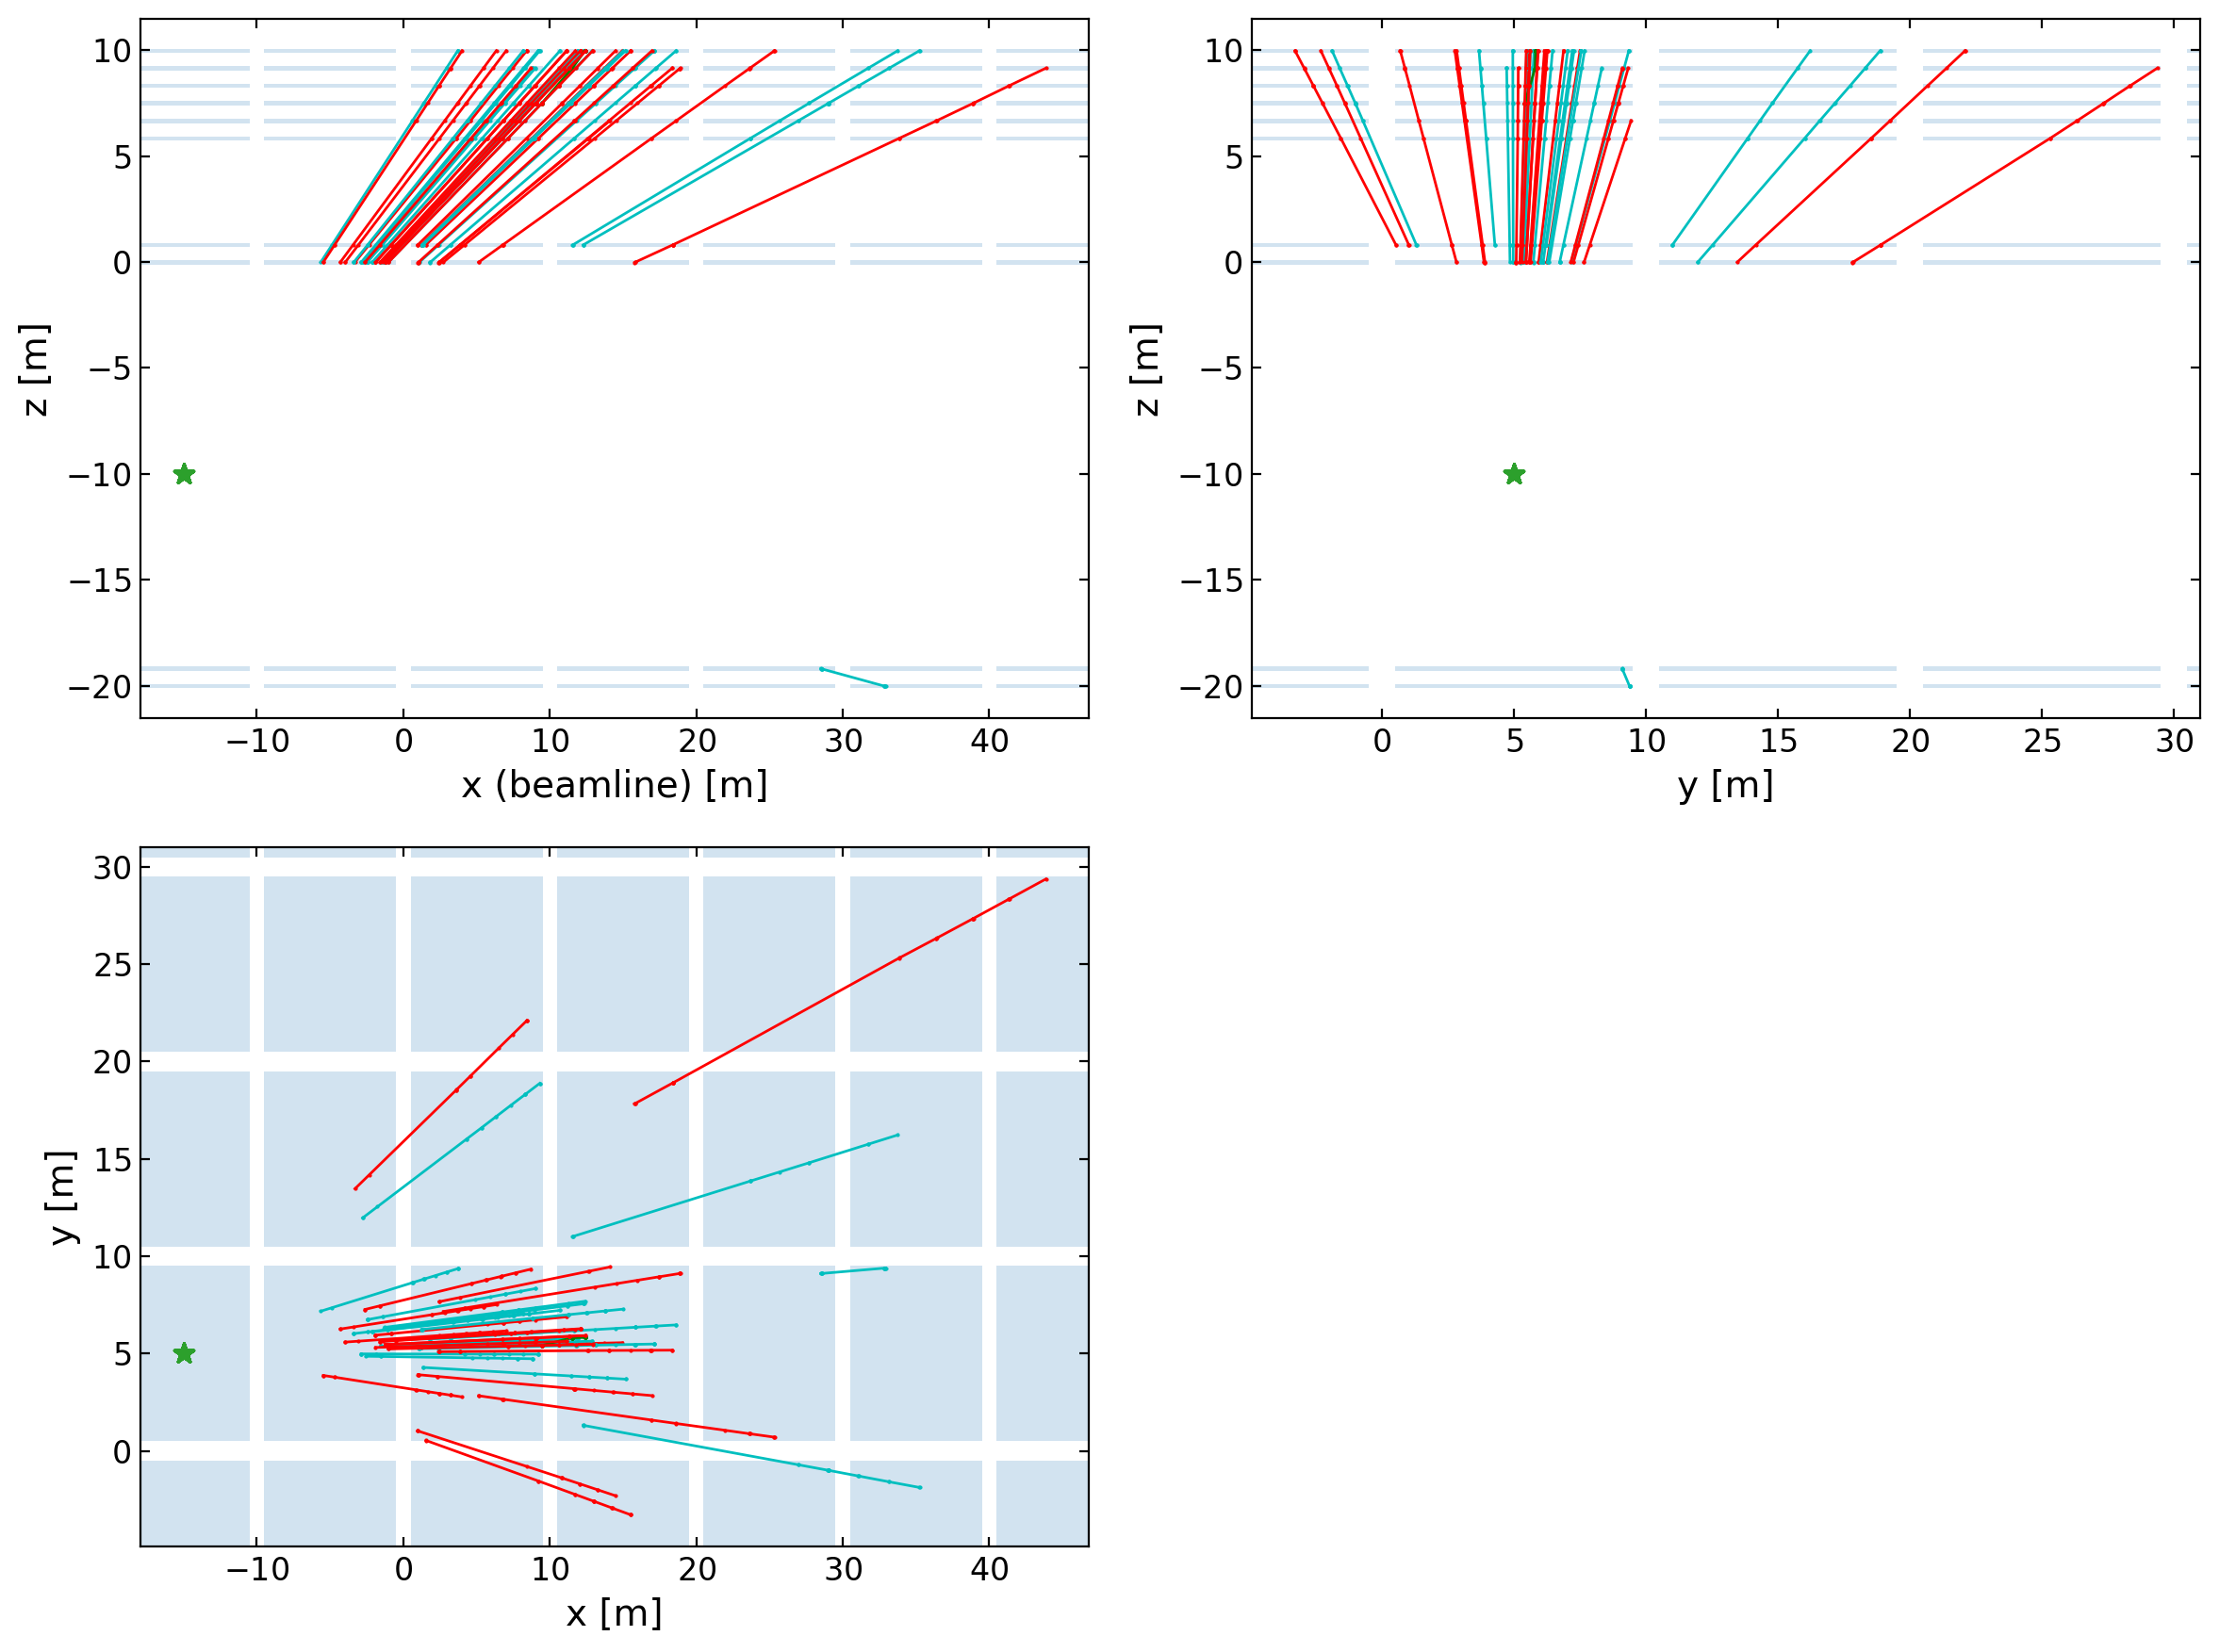

In [11]:
ifile=2

filename_recon = filenames[ifile]


# filename_recon = os.path.dirname(filename)+"/stat_seedmod.root"
tfile = root.TFile.Open(filename_recon)
tree_name = tfile.GetListOfKeys()[0].GetName()
Tree = tfile.Get(tree_name)
ev = event.Event(filename_recon, 0, tree_name=tree_name)

nevents = int(Tree.GetEntries())
n_original = nevents 
branch_list = [Tree.GetListOfBranches()[i].GetName() for i in range(len(Tree.GetListOfBranches()))]
print("Number of events",nevents)
print(branch_list)

# Draw 20 events
ev = event.Event(filename_recon, 0, tree_name=tree_name)
fig,axs=plt.subplots(2,2,figsize=(12,9))
for i in range(20):
    ev.EventNumber=i
    # Plot truth
    fig = vis.plot_truth(ev,fig=fig, disp_det_view=False, disp_vertex=False, disp_first_hit=False,make_legend=False);
fig = vis.plot_truth(ev,fig=fig, disp_det_view=True, disp_vertex=False, disp_first_hit=False,make_legend=False);
savefig(f"{filelables[ifile]}_display")


# Load data
data = get_km_alltracks(filename_recon, nevents=10000)
print(data.keys())

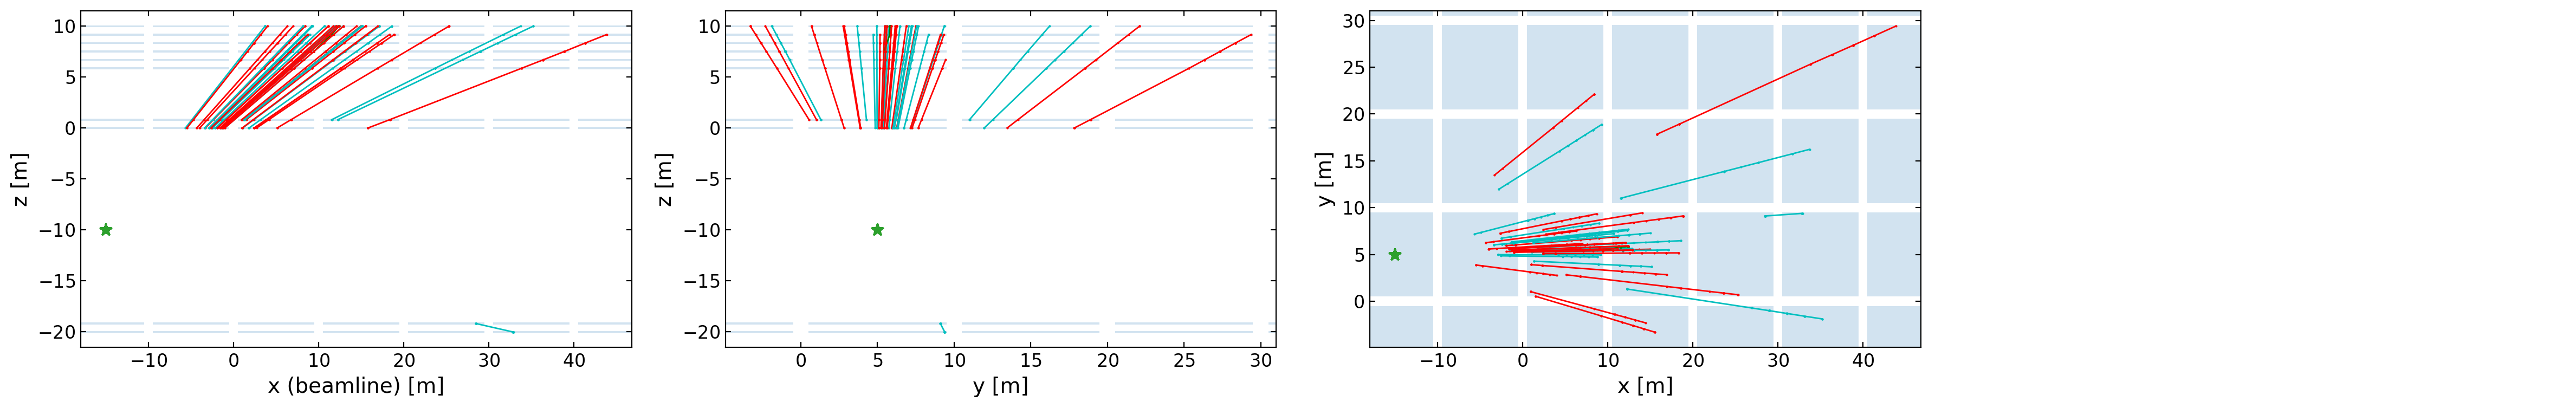

In [20]:
ev = event.Event(filename_recon, 0, tree_name=tree_name)
fig,axs=plt.subplots(1,4,figsize=(24,4))
for i in range(20):
    ev.EventNumber=i
    # Plot truth
    fig = vis.plot_truth(ev,fig=fig, disp_det_view=False, disp_vertex=False, disp_first_hit=False,make_legend=False);
fig = vis.plot_truth(ev,fig=fig, disp_det_view=True, disp_vertex=False, disp_first_hit=False,make_legend=False);
savefig(f"{filelables[ifile]}_display")

In [12]:
# -------
# Cuts
mask_vertex_recon = data["vertices_recon_n"]>=1
mask_track_recon = data["mask_recon_success_track"]
mask = mask_vertex_recon
# mask_reconstructible = np.array([(len(i)>1 and min(i)>=4) for i in data["tracks_truth_nlayer"]])
mask_reconstructible = np.array(data["mask_reconstructible_vertex"])
k_reconstructible = sum(mask_reconstructible)/n_original
print("Total events:",len(mask_reconstructible),". Total simulated:",n_original)
print("k_reconstructible: ",k_reconstructible)

# -----------
# Variables

Entry = np.array(util.appcut(data["Entry"], mask))
Entry_failed = np.array(util.appcut(data["Entry"], ~mask))
Vertices = util.appcut(data["vertices_recon"],mask)
Vertices = np.array([v[0] for v in Vertices])
Vertices_err = util.appcut(data["vertices_recon_error"],mask)
Vertices_err = np.array([v[0] for v in Vertices_err])
Vertices_cov = util.appcut(data["vertices_recon_cov"],mask)
Vertices_cov = np.array([v[0] for v in Vertices_cov])
Vertices_chi2 = np.array([v[0] for v in util.appcut(data["vertices_chi2"],mask)])
Vertices_tracklayers = util.appcut(data["tracks_truth_nlayer"], mask)
Vertices_tracklayers_failed = util.appcut(data["tracks_truth_nlayer"], ~mask)


# The following truth values should have the same length as total enetries
Vertices_truth_xyz=[]
Vertices_truth=[]
Vertices_truth_direction_unit=[]
Vertices_track1_truth = []
Vertices_track2_truth = []
Vertices_track1_truth_vunit=[]
Vertices_track2_truth_vunit=[]
Vertices_opening_angle=[]
Vertices_plane_angle=[]


for i in tqdm(range(nevents)):
    Tree.GetEntry(i)
    g4ids = util.c2list(Tree.Hit_G4ParentTrackId)
    HAS_TWO_TRACKs = (1 in g4ids) and (2 in g4ids)
    if HAS_TWO_TRACKs:
        vertex=[Tree.GenParticle_x[1]/10, Tree.GenParticle_y[1]/10, Tree.GenParticle_z[1]/10]
        # vertex=[Tree.GenParticle_x[0]/10, Tree.GenParticle_y[0]/10, Tree.GenParticle_z[0]/10]
        Vertices_truth_xyz.append(vertex)        
        Vertices_truth.append([vertex[1], -vertex[2]+85.47*100, vertex[0], 0])
        Vertices_truth_direction_unit.append(Vertices_truth[-1][:3]/np.linalg.norm(Vertices_truth[-1][:3]))
        Vertices_track1_truth.append(get_track_param_truth_p(Tree, 1))
        Vertices_track2_truth.append(get_track_param_truth_p(Tree, 2))
        Vertices_track1_truth_vunit.append(Vertices_track1_truth[-1][3:6]/np.linalg.norm(Vertices_track1_truth[-1][3:6]))
        Vertices_track2_truth_vunit.append(Vertices_track2_truth[-1][3:6]/np.linalg.norm(Vertices_track2_truth[-1][3:6]))
        Vertices_opening_angle.append(np.arccos(np.dot(Vertices_track1_truth_vunit[-1],Vertices_track2_truth_vunit[-1])))
        vertex_truth_direction_xy = np.array([Vertices_truth_direction_unit[-1][2],0,-Vertices_truth_direction_unit[-1][0]])
        vertex_truth_direction_xy = vertex_truth_direction_xy/np.linalg.norm(vertex_truth_direction_xy)
        vertex_plane_direction = np.cross(Vertices_track1_truth_vunit[-1],Vertices_track2_truth_vunit[-1])
        vertex_plane_direction = vertex_plane_direction/np.linalg.norm(vertex_plane_direction)
        Vertices_plane_angle.append(np.arccos(np.dot(vertex_truth_direction_xy,vertex_plane_direction)))
    else:
        Vertices_truth_xyz.append([-999,-999,-999])
        Vertices_truth.append([-999,-999,-999,-999])
        Vertices_truth_direction_unit.append([-999,-999,-999])
        Vertices_track1_truth.append([-999,-999,-999,-999,-999,-999,-999])
        Vertices_track2_truth.append([-999,-999,-999,-999,-999,-999,-999])
        Vertices_track1_truth_vunit.append([-999,-999,-999])
        Vertices_track2_truth_vunit.append([-999,-999,-999])
        Vertices_opening_angle.append(-999)
        Vertices_plane_angle.append(-999)

    
Vertices_truth=np.array(Vertices_truth)
Vertices_truth_xyz=np.array(Vertices_truth_xyz)
Vertices_truth_masked = Vertices_truth[mask]    
Vertices_truth=np.array(Vertices_truth)
Vertices_truth_direction_unit=np.array(Vertices_truth_direction_unit)
Vertices_track1_truth=np.array(Vertices_track1_truth)
Vertices_track2_truth=np.array(Vertices_track2_truth)
Vertices_track1_truth_vunit=np.array(Vertices_track1_truth_vunit)
Vertices_track2_truth_vunit=np.array(Vertices_track2_truth_vunit)
Vertices_opening_angle=np.array(Vertices_opening_angle)
Vertices_plane_angle=np.array(Vertices_plane_angle)  
    
Vertices_truth_eta = np.arctanh(Vertices_truth[:,2]/np.linalg.norm(Vertices_truth[:,:3],axis=1))
Vertices_truth_phi = np.arctan(Vertices_truth[:,0]/Vertices_truth[:,1])

# Residual: each entry is [dx, dy, dz, dt]
residual = (Vertices - Vertices_truth[mask])
Vertices_truth_direction_unit_masked = Vertices_truth_direction_unit[mask]

# Total position residual
residual_r = np.linalg.norm(residual[:,:3],axis=1)
residual_axial  = np.array([np.dot(residual[i][:3],Vertices_truth_direction_unit_masked[i]) for i in range(len(residual))])    
residual_radial = np.array([np.linalg.norm(np.cross(residual[i][:3],Vertices_truth_direction_unit_masked[i])) for i in range(len(residual))])

Total events: 10000 . Total simulated: 10000
k_reconstructible:  0.9124


 17%|█▋        | 1687/10000 [00:00<00:04, 1889.57it/s]/tmp/ipykernel_10911/975307843.py:58: RuntimeWarning: invalid value encountered in true_divide
  vertex_plane_direction = vertex_plane_direction/np.linalg.norm(vertex_plane_direction)
 66%|██████▌   | 6602/10000 [00:03<00:01, 2281.44it/s]/tmp/ipykernel_10911/975307843.py:54: RuntimeWarning: invalid value encountered in arccos
  Vertices_opening_angle.append(np.arccos(np.dot(Vertices_track1_truth_vunit[-1],Vertices_track2_truth_vunit[-1])))
100%|██████████| 10000/10000 [00:05<00:00, 1889.39it/s]


In [13]:
track_purity_1d = util.Utils.flatten1d(data["tracks_purity"])
track_purity_1d = track_purity_1d[track_purity_1d>0]              
track_purity_1d_avg = np.array([np.mean(i) for i in data["tracks_purity"]])
tracks_purity = util.appcut(data["tracks_purity"], mask )
tracks_purity = np.array([np.mean(i) for i in tracks_purity])
tracks_purity_nonvertex = util.appcut(data["tracks_purity"], (~mask)&mask_reconstructible)
tracks_purity_nonvertex = np.array([np.mean(i) for i in tracks_purity_nonvertex])


print("K_reconstructible,",sum(mask_reconstructible)/len(mask_reconstructible))
print("  -reconstructed,",sum(mask)/len(mask))
print("Percentage of single track purity=1:",sum(track_purity_1d==1)/len(track_purity_1d))          
print("Percentage of event-averaged track purity=1:", sum(track_purity_1d_avg==1)/len(data["tracks_purity"]))

K_reconstructible, 0.9124
  -reconstructed, 0.9001
Percentage of single track purity=1: 0.9161181612342688
Percentage of event-averaged track purity=1: 0.7711


In [ ]:
# Tree.GetEntry(1)
# for hit_index in range(Tree.Hit_x.size()):
#     print(Tree.Hit_G4TrackId.at(hit_index),Tree.Hit_particlePdgId.at(hit_index),Tree.Hit_x.at(hit_index), Tree.Hit_y.at(hit_index), Tree.Hit_z.at(hit_index),Tree.Hit_particlePx.at(hit_index), Tree.Hit_particlePy.at(hit_index), Tree.Hit_particlePz.at(hit_index), Tree.Hit_time.at(hit_index))

Efficiency: 0.87


Text(0.5, 0, 'Residual, r [cm]')

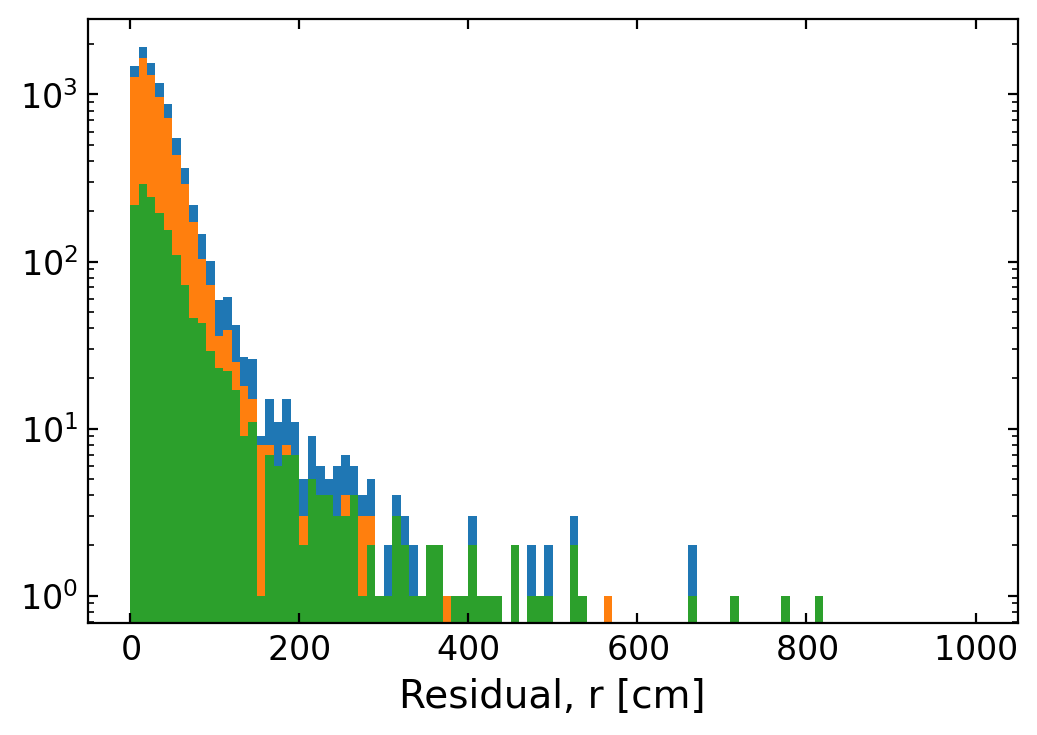

In [13]:
mask_residual = residual_r<200
hist(residual_r,log=1,range=(0,1e3));
hist(residual_r[tracks_purity==1],log=1,range=(0,1e3));
hist(residual_r[tracks_purity<1],log=1,range=(0,1e3));

efficiency = sum(mask_residual)/nevents
print("Efficiency:", f"{efficiency:.2f}")
xlabel("Residual, r [cm]")

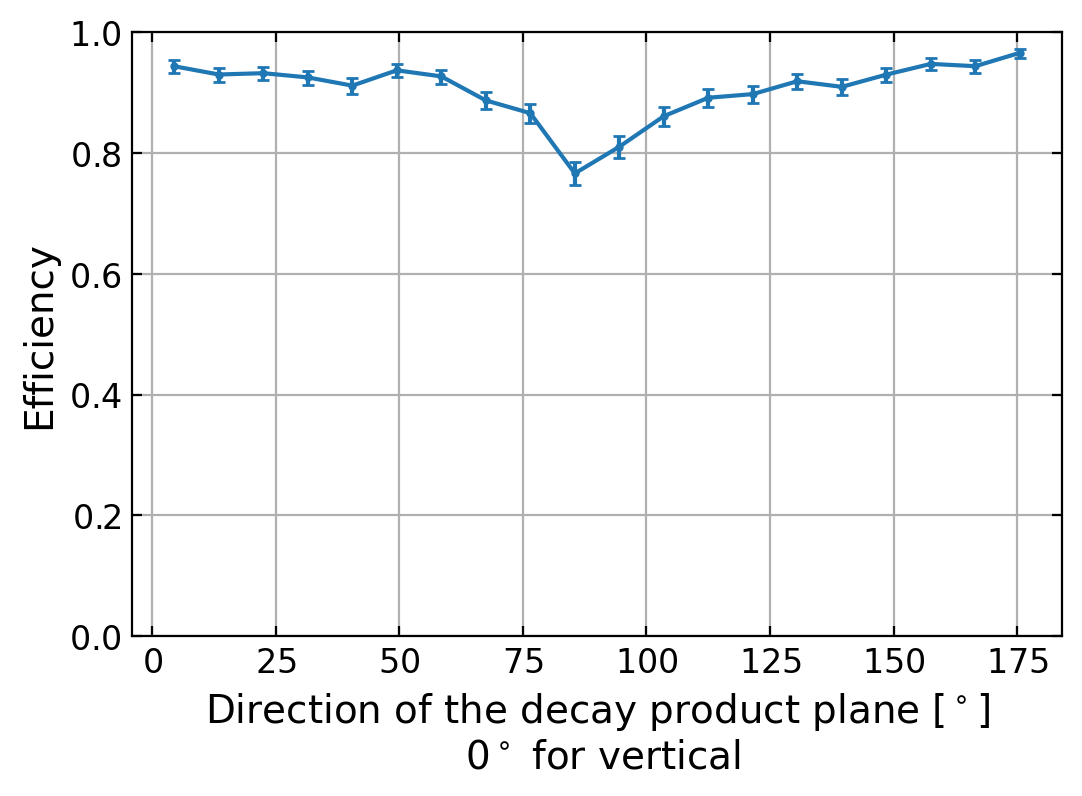

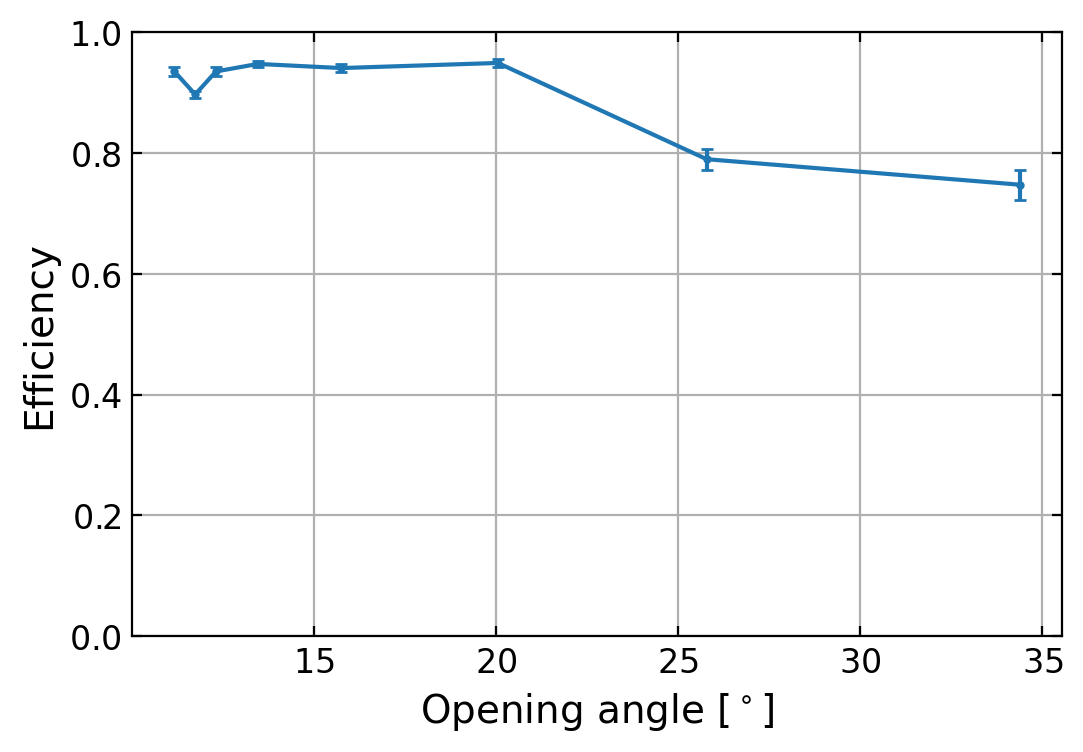

In [16]:
plane_angle_cuts_ranges = np.linspace(0,np.pi,21)
plane_angle_cuts_centers = util.Utils.center(plane_angle_cuts_ranges)
plane_angle_eff=[]
for i in range(len(plane_angle_cuts_centers)):
    mask_angle = (Vertices_plane_angle>plane_angle_cuts_ranges[i]) & (Vertices_plane_angle<plane_angle_cuts_ranges[i+1])
    
    n_pass = np.sum(mask_angle[mask][mask_residual])
    n_total = np.sum(mask_angle)
    eff_output = rt.BayesDivide([n_pass],[n_total])
    plane_angle_eff.append([eff_output[0][0], eff_output[1][0], eff_output[2][0]])
    
    
plane_angle_eff=np.array(plane_angle_eff)
errorbar(plane_angle_cuts_centers*180/np.pi,plane_angle_eff[:,0],yerr=[plane_angle_eff[:,1],plane_angle_eff[:,2]],fmt="o-",capsize=2,markersize=2);
ylim(0,1)   
xlabel(r"Direction of the decay product plane [$^\circ$]"+"\n $0^\circ$ for vertical")
ylabel("Efficiency")
grid()
savefig(f"{filelables[ifile]}_eff_plane_angle")
show()


open_angle_cuts_ranges = np.array([0.19,0.2,0.21,0.22,0.25,0.3,0.4, 0.5,0.7])
open_angle_cuts_centers = util.Utils.center(open_angle_cuts_ranges)
open_angle_eff=[]
for i in range(len(open_angle_cuts_centers)):
    mask_angle = (Vertices_opening_angle>open_angle_cuts_ranges[i]) & (Vertices_opening_angle<open_angle_cuts_ranges[i+1])
    
    n_pass = np.sum(mask_angle[mask][mask_residual])
    n_total = np.sum(mask_angle)
    eff_output = rt.BayesDivide([n_pass],[n_total])
    open_angle_eff.append([eff_output[0][0], eff_output[1][0], eff_output[2][0]])
    
    
open_angle_eff=np.array(open_angle_eff)
errorbar(open_angle_cuts_centers*180/np.pi,open_angle_eff[:,0],yerr=[open_angle_eff[:,1],open_angle_eff[:,2]],fmt="o-",capsize=2,markersize=2);
ylim(0,1)   
xlabel("Opening angle [$^\circ$]")
ylabel("Efficiency")
grid()
savefig(f"{filelables[ifile]}_eff_opening_angle")
show()

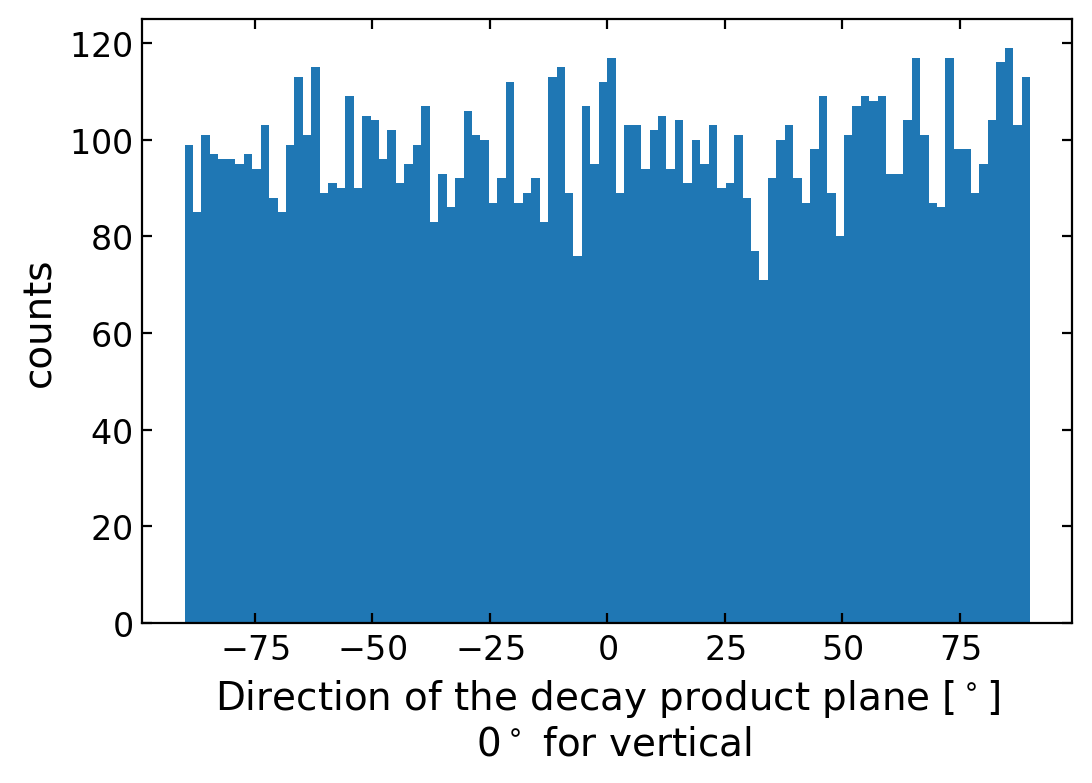

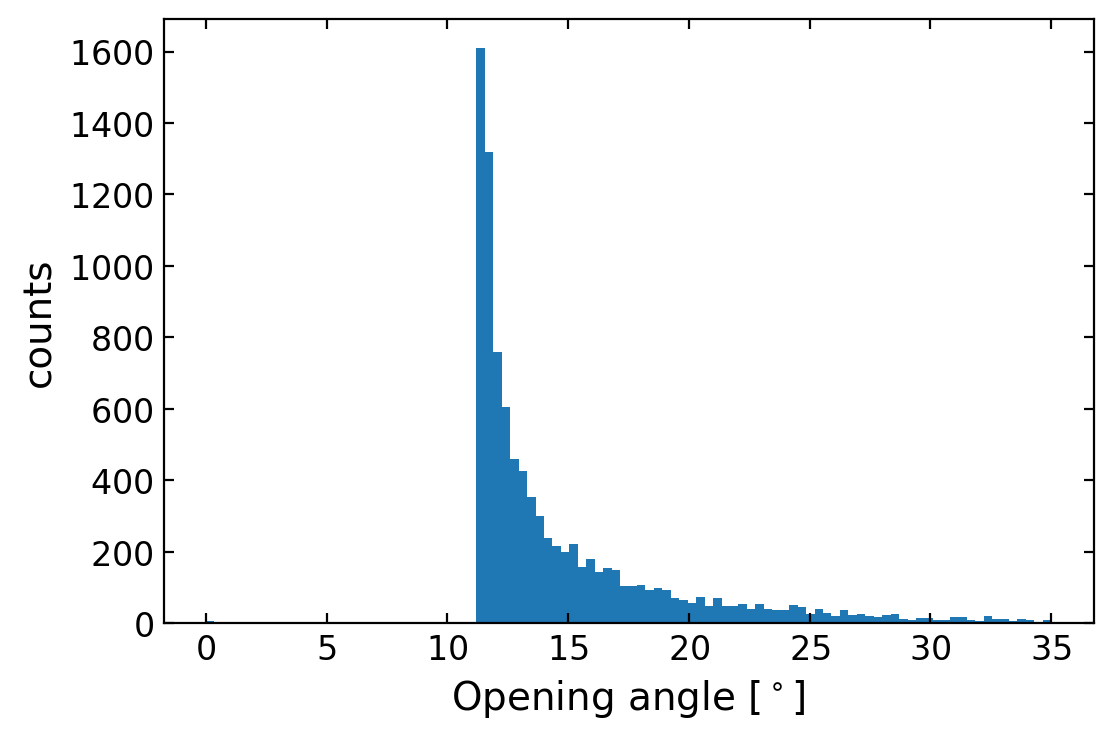

In [11]:
hist(Vertices_plane_angle*180/np.pi-90, range=(-90,90));
xlabel(r"Direction of the decay product plane [$^\circ$]"+"\n $0^\circ$ for vertical")
ylabel("counts")
show()
hist(Vertices_opening_angle*180/np.pi, range=(0,35));
xlabel("Opening angle [$^\circ$]")
ylabel("counts")
show()


### Check the seed cut threshold in processing

100%|██████████| 8269/8269 [00:05<00:00, 1597.88it/s]


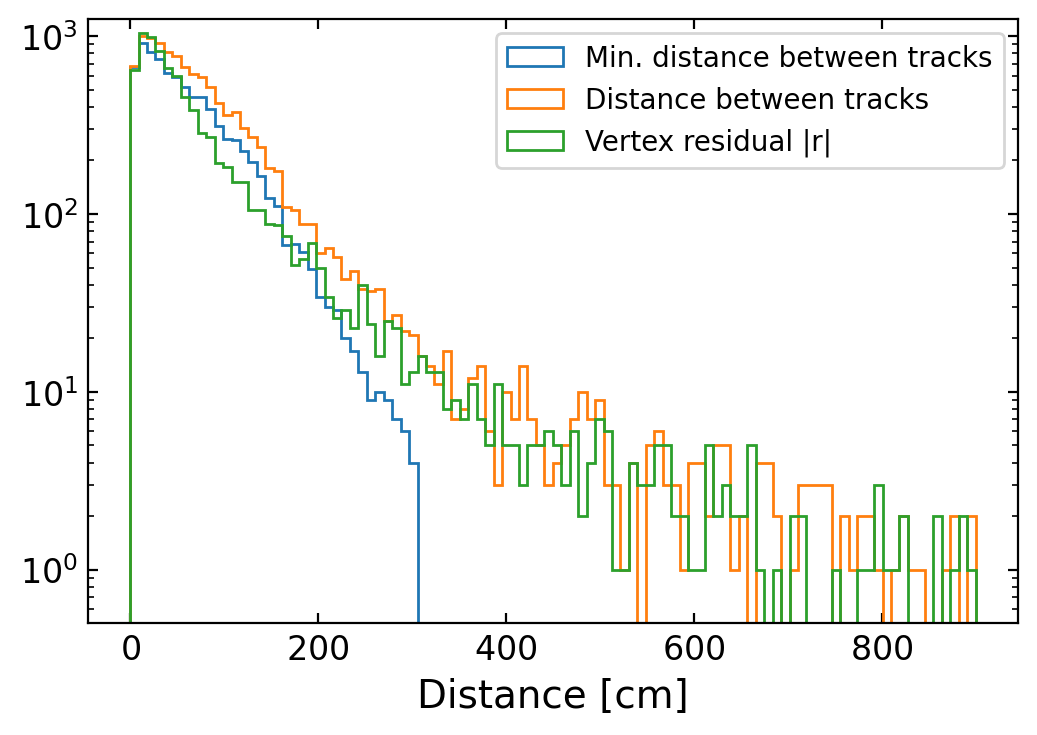

Events with seed 8269 
 All events 8269


In [21]:
# Use the analytical calcualation of the midpoint of two lines

dist_direct  = [] # The distance between two lines. Taking the minimum distance in each event
dist_direct_all  = [] # The distance between two lines. all line pairs
residual_direct  = [] # Distance from the midpoint to the vertex truth
for i in tqdm(Entry):
    Tree.GetEntry(i)
    if Tree.Track_k_m_x0.size()>=2:
        tracks = []
        for track_ind in range(Tree.Track_k_m_x0.size()):
            track_1 =np.array([Tree.Track_k_m_x0.at(track_ind), Tree.Track_k_m_y0.at(track_ind), Tree.Track_k_m_z0.at(track_ind),Tree.Track_k_m_velX.at(track_ind), Tree.Track_k_m_velY.at(track_ind), Tree.Track_k_m_velZ.at(track_ind), Tree.Track_k_m_t0.at(track_ind)])
            tracks.append(track_1)
            
        dists=[]
        residuals=[]
        for i in range(len(tracks)):
            for j in range(i+1, len(tracks)):
                position,t,dist = closest_approach_midpoint(tracks[i],tracks[j])
                residual_i = position-Vertices_truth[i][:3]
                residuals.append(np.linalg.norm(residual_i))
                dists.append(dist)
        dist_direct.append(min(dists))
        dist_direct_all.extend(dists)
        residual_direct.append(min(residuals))
dist_direct=np.array(dist_direct)
dist_direct_all=np.array(dist_direct_all)
residual_direct=np.array(residual_direct)


n,ibins,p=hist(dist_direct,range=(0,900),histtype="step",label="Min. distance between tracks");
n,ibins,p=hist(dist_direct_all,range=(0,900),histtype="step",label="Distance between tracks");
n,ibins,p=hist(residual_direct,range=(0,900),histtype="step",label="Vertex residual |r|");
# bincenters=0.5*(ibins[1:]+ibins[:-1])
# yerr=np.sqrt(n);yerr[yerr==0]=1
# popt,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus")
# print(popt[2],'[cm]')
# plot(bincenters, util.Utils.Gauss(bincenters,*popt),color="C0")
yscale("log")
xlabel("Distance [cm]")
legend(fontsize=10,loc="upper right")
ylim(bottom=0.5,top=max([max(n)])*1.2)
show()

print("Events with seed", sum(dist_direct<500),"\n All events",len(dist_direct))
        

35.42271510586975 [cm]
5.754704305445691 [cm]


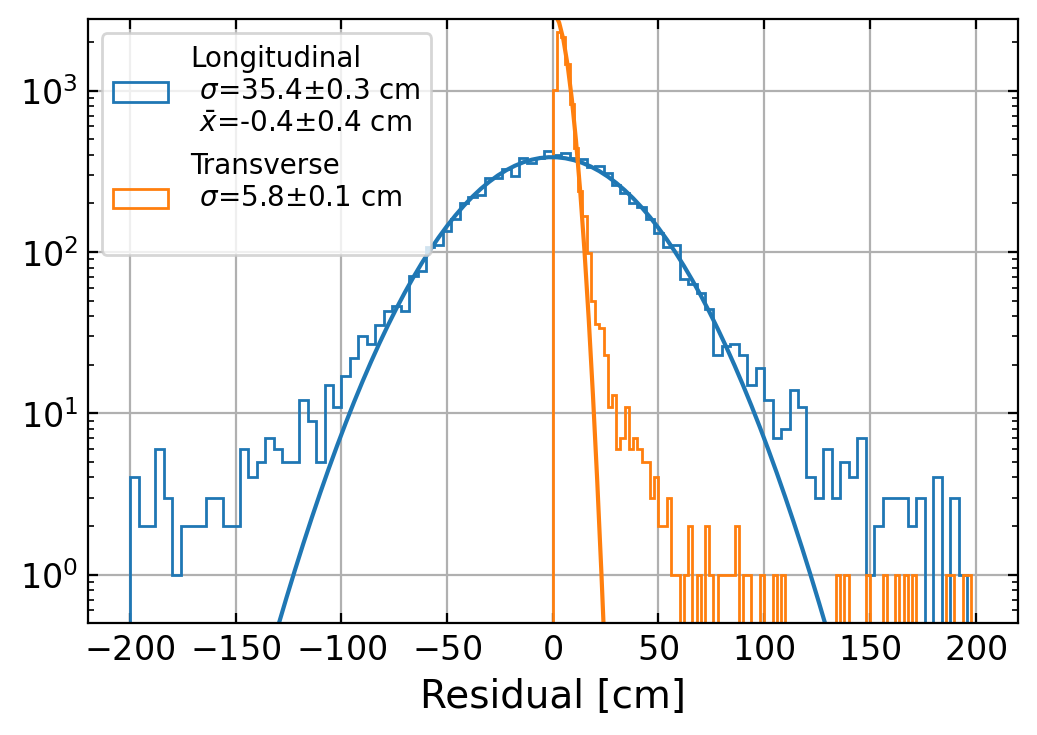

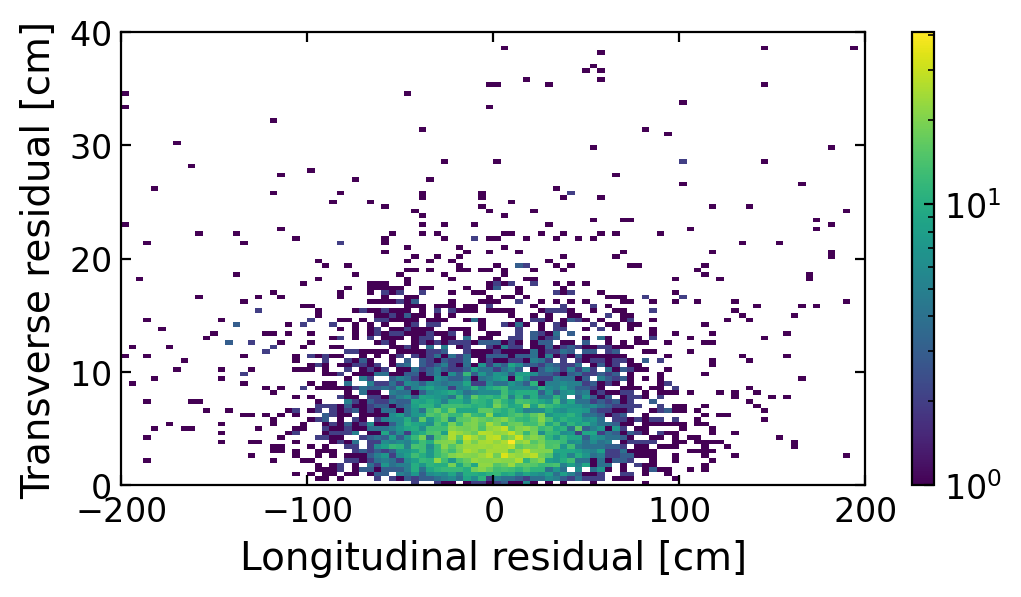

1.3249730130606931


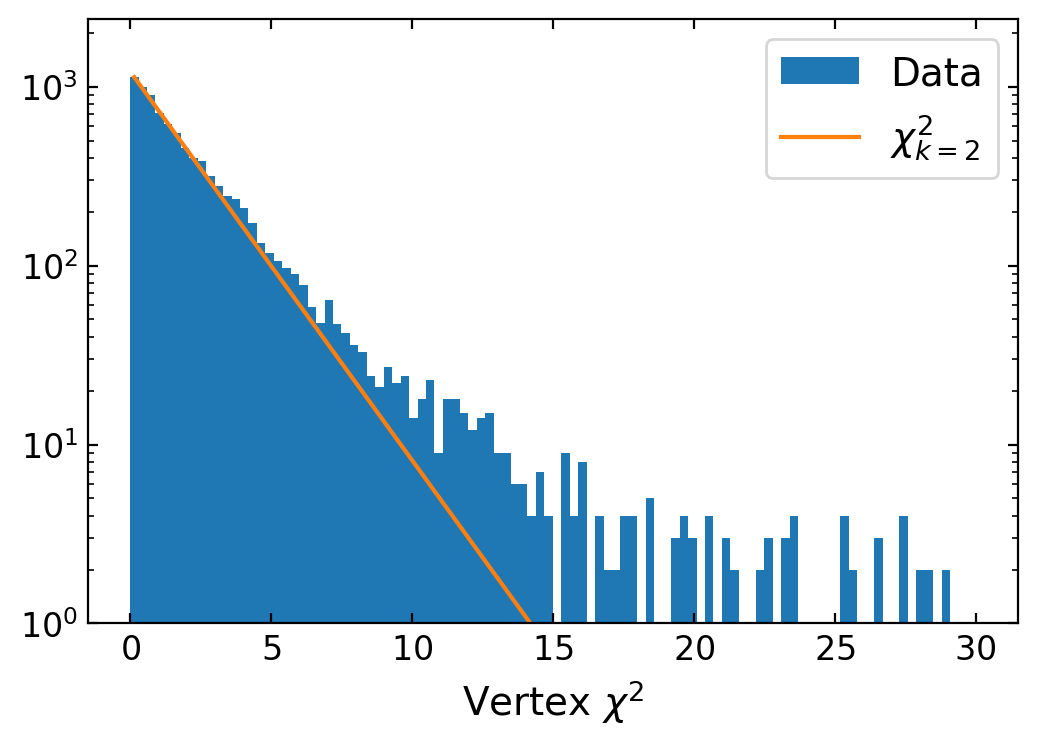

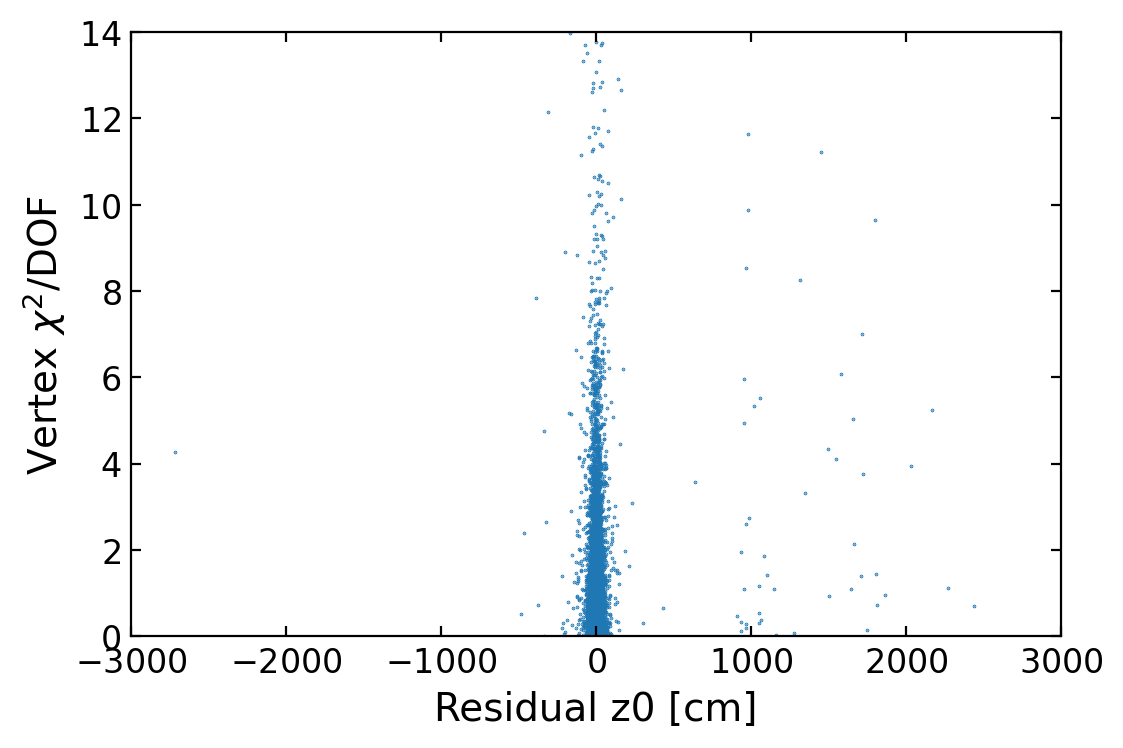

In [15]:
# Figure 1, longi vs axial
n,ibins,p=hist(residual_axial,range=(-200,200),histtype="step",label="Longitudinal");
n2,ibins2,p=hist(residual_radial,range=(0,200),histtype="step",label="Transverse");

bincenters=0.5*(ibins[1:]+ibins[:-1])
bincenters2=0.5*(ibins2[1:]+ibins2[:-1])
yerr=np.sqrt(n);yerr[yerr==0]=1
yerr2=np.sqrt(n2);yerr2[yerr2==0]=1

popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(-100,100))
perr1 = np.sqrt(np.diag(pcov))
print(popt1[2],'[cm]')
plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0")
popt2,pcov = rt.fit_tg(bincenters2,n2,yerr=yerr2,function="gaus",set_constant=[[1,0]],initial_values=[max(n2),0,3],fit_range=(5,15),option="BQS")
perr2 = np.sqrt(np.diag(pcov))
print(popt2[2],'[cm]')
plot(bincenters2, util.Utils.Gauss(bincenters2,*popt2),color="C1")
yscale("log")
xlabel("Residual [cm]")
legend(fontsize=10,loc="upper left")
handles, labels = gca().get_legend_handles_labels()
labels[0] = labels[0]+f"\n $\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} cm\n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} cm"
labels[1] = labels[1]+f"\n $\sigma$={popt2[2]:.1f}$\pm${perr2[2]:.1f} cm\n "
legend(handles, labels,fontsize=10,loc="upper left")
grid()
ylim(bottom=0.5,top=max([max(n),max(n2)])*1.2)
savefig(f"{filelables[ifile]}_resolution_position")
show()


# Figure 2
subplots(figsize=(6,3))
hist2d(residual_axial, residual_radial,range=((-200,200),(0,40)),bins=(100,100),norm=LogNorm());
xlabel("Longitudinal residual [cm]")
ylabel("Transverse residual [cm]")
colorbar()
savefig(f"{filelables[ifile]}_longi_vs_trans")
show()


# Figure 3
dof = 2

n,ibins,p = hist(Vertices_chi2*dof,range=(0,30),label="Data");
bincenters = util.Utils.center(ibins)
y = scipy.stats.chi2.pdf(bincenters,dof)
plot(bincenters,y/sum(y[:1])*sum(n[:1]),label=r"$\chi^2_{k=2}$")
yscale("log")
xlabel("Vertex $\chi^2$")
print(np.mean(Vertices_chi2))
legend()
ylim(1,)
savefig(f"{filelables[ifile]}_chi2")
show()


# Figure 4
scatter(residual[:,1], Vertices_chi2,s=0.1);
xlabel("Residual z0 [cm]")
ylabel("Vertex $\chi^2$/DOF")
xlim(-3000,3000)
ylim(0,14)
show()

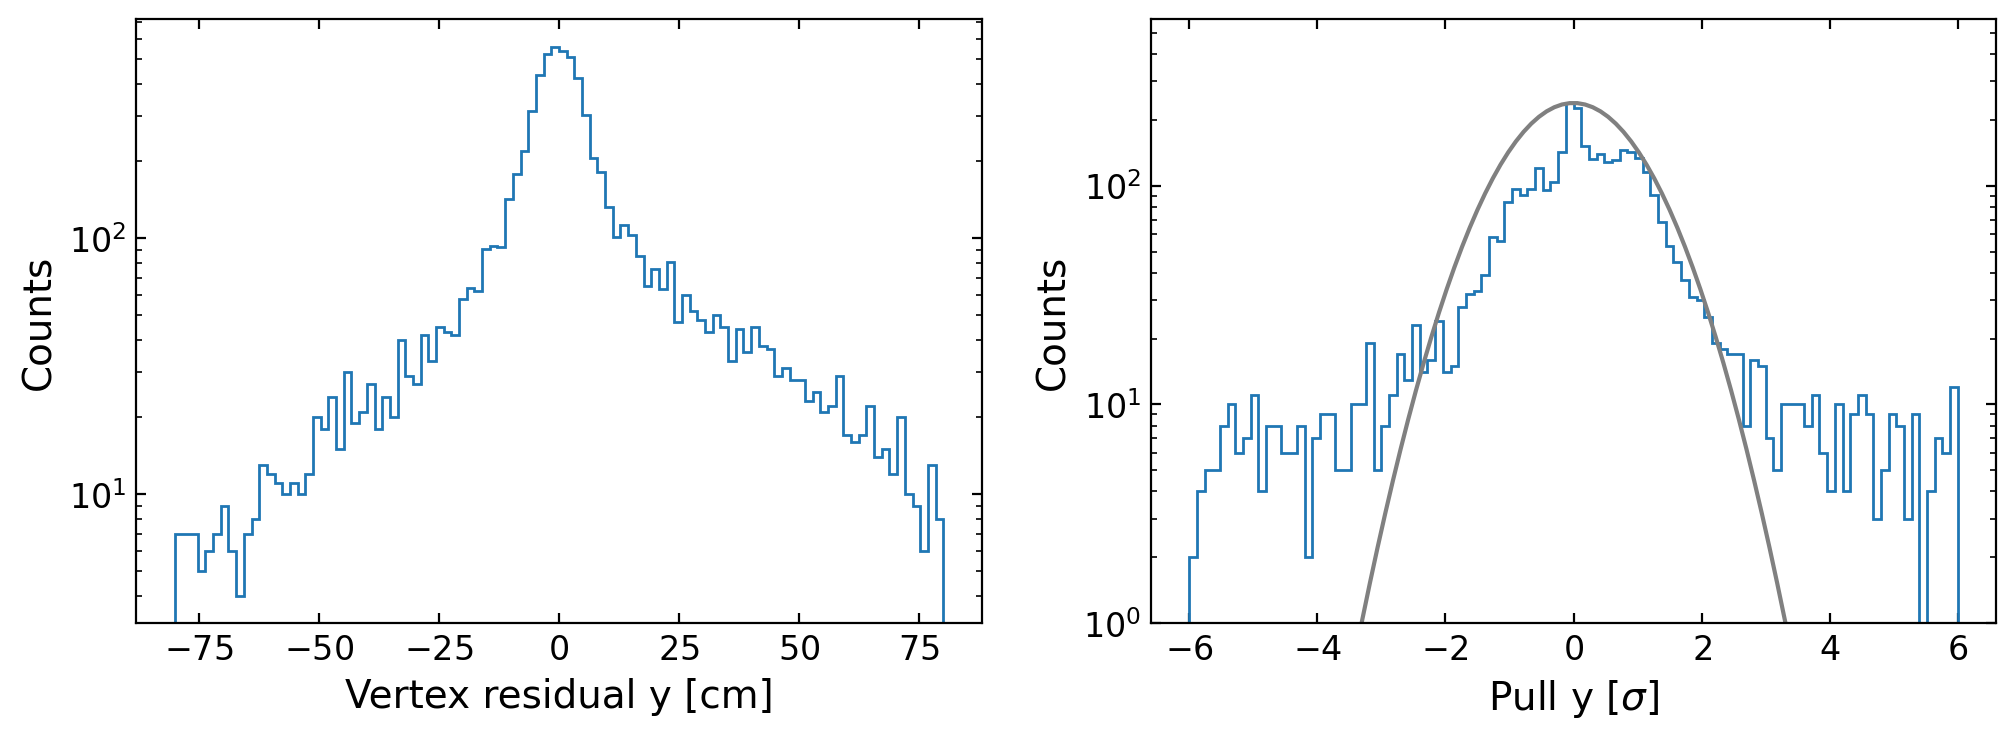

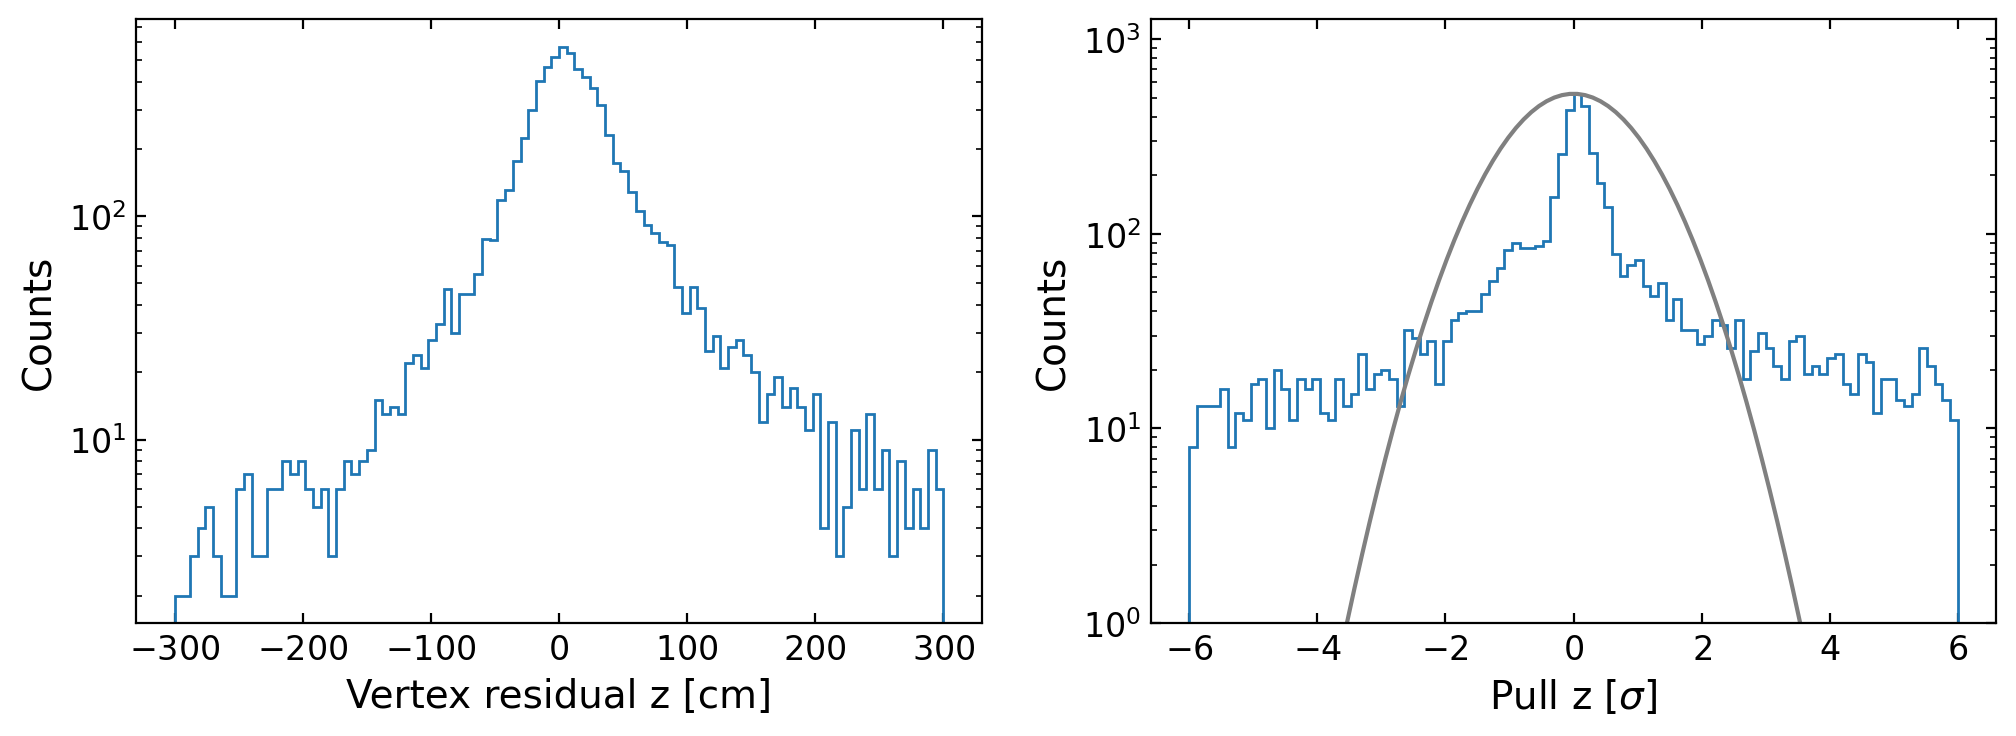

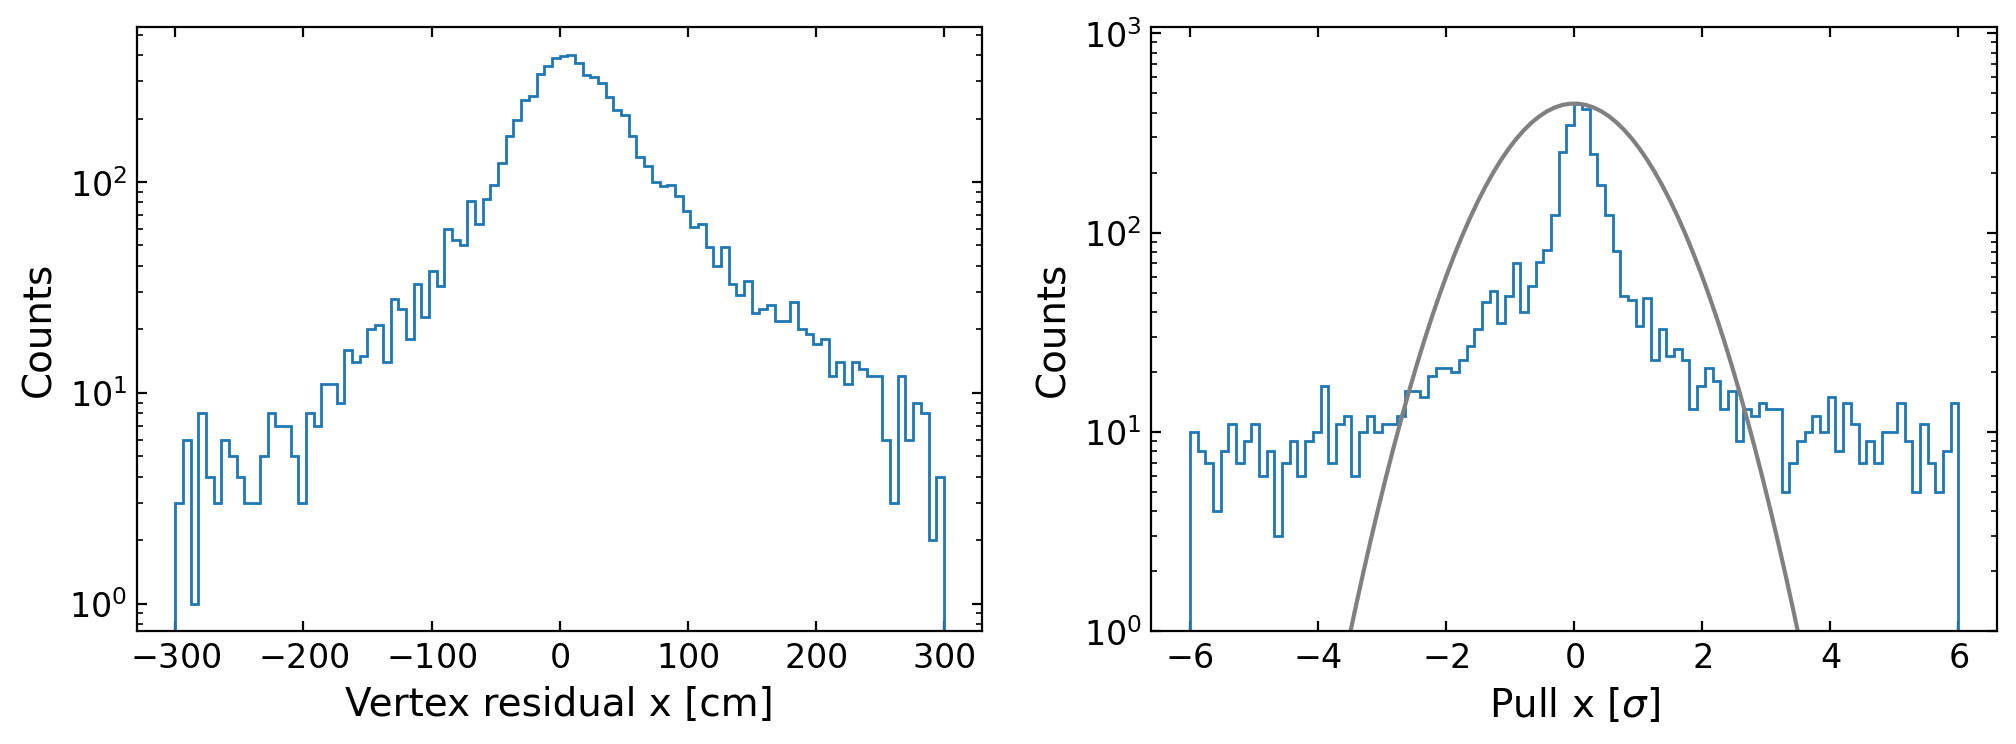

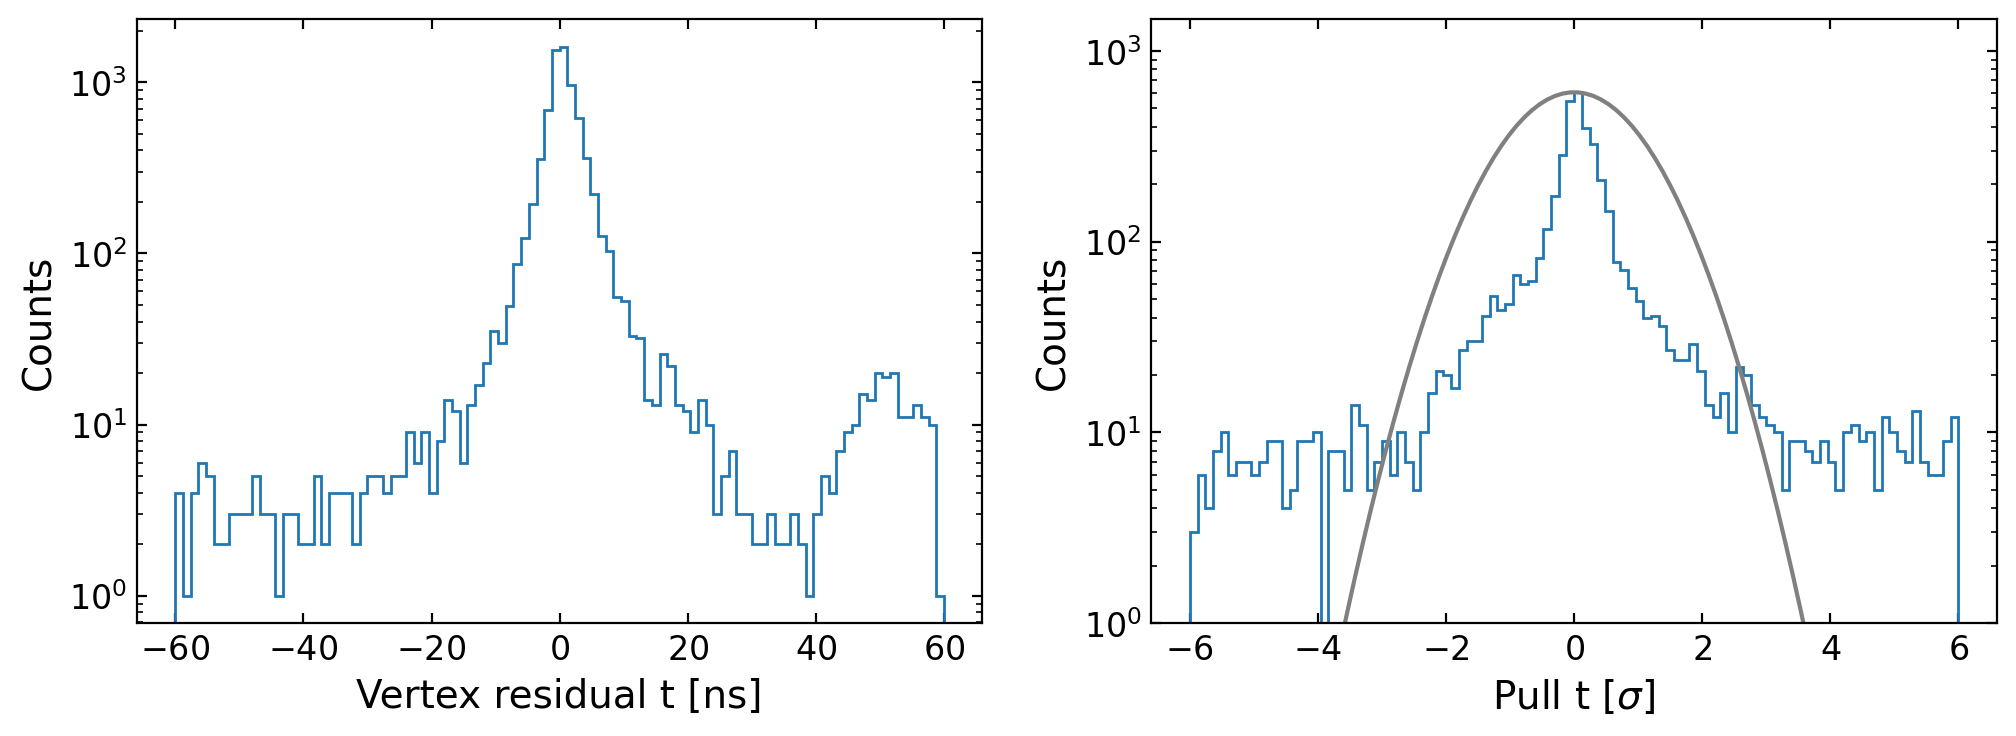

In [23]:
labels=["y [cm]", "z [cm]", "x [cm]", "t [ns]", "r [cm]"]
plot_ranges=[[-80,80],[-300,300],[-300,300],[-60,60],[0,900]]

plotlabels = ["Original", "+Bug fix", "+Seed mod"]

# for i in [3,4]:
for i in [0,1,2,3]:
    fig, axs=subplots(1,2,figsize=(12,4))
    unc = Vertices_err

    sca(axs[0])
    n0,ibins,_ = hist(residual[:,i],range=plot_ranges[i],histtype="step");    
    sca(axs[1])
    if i==4:
        #unc_i = 1/residual[:,4]*np.sqrt(residual[:,1]**2*unc[:,1]**2 + residual[:,2]**2*unc[:,2]**2 + residual[:,0]**2*unc[:,0]**2 )
        unc_i=[]
        for ievent in range(len(Vertices_cov)):
            cov = Vertices_cov[ievent][:3,:3]
            # cov =np.diag(np.diag(cov))
            delta_r = residual[ievent,:3]
            unc_i.append(sqrt(delta_r@cov@delta_r)/residual[ievent,4])
    else:
        unc_i =unc[:,i]
    pull = util.pull(residual[:,i],0,unc_i)

    n0,ibins,_ = hist(pull,range=[-6,6],histtype="step"); 
    ibins=util.Utils.center(ibins)
    plot(ibins,util.Utils.Gauss(ibins,max(n0),0,1),color="grey")
    
    sca(axs[0])
    xlabel("Vertex residual "+labels[i])
    ylabel("Counts")
    yscale("log")
    sca(axs[1])
    xlabel("Pull "+labels[i].split(" ")[0]+r" [$\sigma$]")
    ylabel("Counts")
    yscale("log")  
    ylim(bottom=1)
    show()

0.5599520383693045


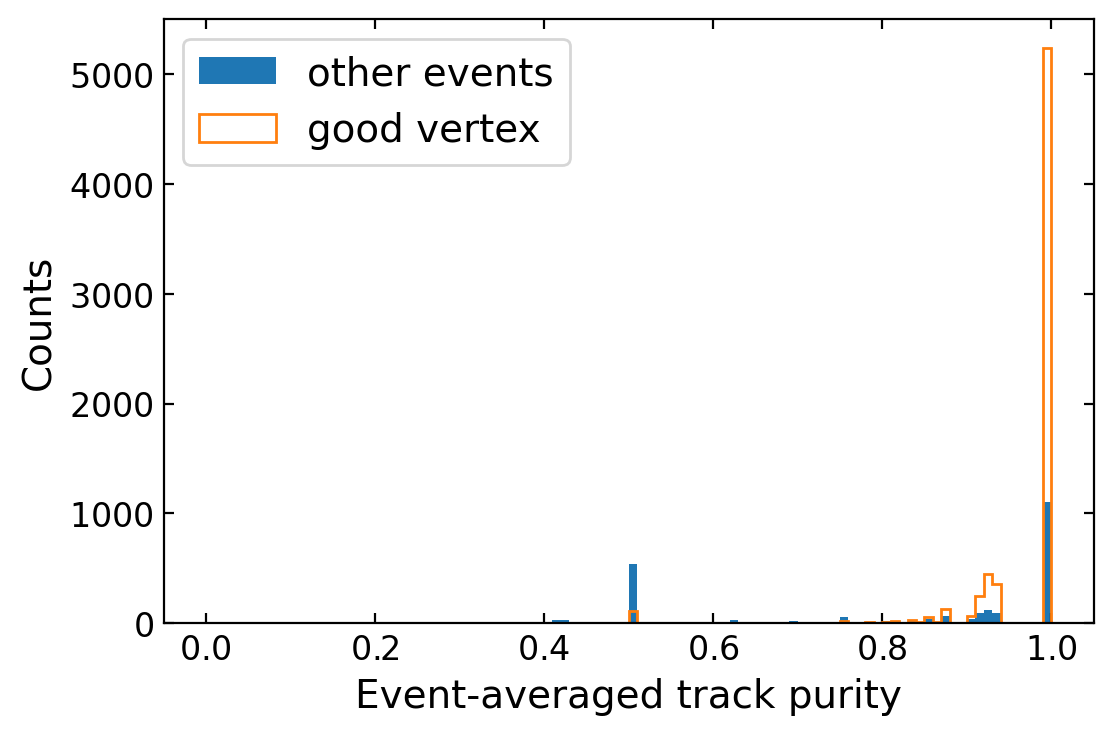

In [24]:
purity = np.concatenate((tracks_purity_nonvertex,tracks_purity[~mask_residual]))
hist(purity,range=(0,1),label="other events");
hist(tracks_purity[mask_residual],range=(0,1),histtype="step",label="good vertex");
xlabel("Event-averaged track purity")
ylabel("Counts")
legend(loc="upper left")
print(sum(purity<1)/len(purity))

In [25]:

joblib.dump({"residual":residual,"uncertainty":Vertices_err, "tracks_purity":tracks_purity,"tracks_purity_nonvertex":tracks_purity_nonvertex,"cov":Vertices_cov}, os.path.splitext(filename_recon)[0]+"_res.joblib")

['/project/def-mdiamond/tomren/mathusla/data/fit_study_6layer/filereader_muon_M4000_P40000_N10000_side/20230611/191631//stat_vertex_original_res.joblib']

## Events faild because of seed

Some events did not get the muon vertex. Instead, the vertex from delta ray is picked. And since one muon track is already used in the delta ray vertex, it is not able to find the muon vertex.

This can be mitigated by changing the score of vertex seed to prefer track pairs with the most amount of hits. Delta rays tends to have fewer hits and thus get lower priority.

In [ ]:
dist_12 = []
dist_non12 = []
total_layers_12=[]
total_layers_non12=[]
total_unc_12=[]
total_unc_non12=[]

# for j in range(10):
# for j in range(sum(mask_plot)):
for j in tqdm(range(nevents)):
    
    # ev.EventNumber = Entry_failed[j]
    # EventNumber = Entry[mask_plot][j]
    EventNumber = j
    
    Tree.GetEntry(EventNumber)
    if Tree.Track_k_m_x0.size()>=2:
        tracks = []
        tracks_id=[]
        tracks_layer=[]
        tracks_unc2=[]
        track_id_unzip = util.unzip(Tree.Track_k_m_ids)
        for track_ind in range(Tree.Track_k_m_x0.size()):
            track_1 =get_track_param(Tree,track_ind)
            tracks.append(track_1)
            tracks_id.append(util.most_frequent(track_id_unzip[track_ind]))
            tracks_layer.append(len(track_id_unzip[track_ind]))
            # tracks_unc2.append(np.sum([Tree.Track_k_m_ErrorX0.at(track_ind), Tree.Track_k_m_ErrorY0.at(track_ind), Tree.Track_k_m_ErrorZ0.at(track_ind), Tree.Track_k_m_ErrorT0.at(track_ind),Tree.Track_k_m_ErrorVx.at(track_ind), Tree.Track_k_m_ErrorVy.at(track_ind), Tree.Track_k_m_ErrorVz.at(track_ind)]))
            tracks_unc2.append(get_track_cov(Tree,track_ind))
            
        dists=[]
        residuals=[]
        dists_id=[]
        total_layer_i=[]
        unc2=[]
        for i in range(len(tracks)):
            for j in range(i+1, len(tracks)):
                position,t,dist = closest_approach_midpoint(tracks[i],tracks[j])
                residual_i = position-vertex_CMS
                residuals.append(np.linalg.norm(residual_i))
                dists.append(dist)
                dists_id.append(np.sort([tracks_id[i], tracks_id[j]]).tolist())
                total_layer_i.append(tracks_layer[i]+tracks_layer[j])
                # unc2.append(tracks_unc2[i]+tracks_unc2[j])
                unc2.append(chi2_distance_to(tracks[i], tracks_unc2[i], position,t)+chi2_distance_to(tracks[j], tracks_unc2[j], position,t))
        # print(dists, dists_id)
        dists=np.array(dists)
        dists_id=np.array(dists_id)
        total_layer_i=np.array(total_layer_i)
        unc2=np.array(unc2)
        
        mask_12 = np.array([np.all(i==[1,2]) for i in dists_id])
        
        if sum(mask_12)>0 and sum(~mask_12)>0:
            dist_12.append(np.min(dists[mask_12]))
            dist_non12.append(np.min(dists[~mask_12]))
            total_layers_12.append(total_layer_i[mask_12][np.argmin(dists[mask_12])])
            total_layers_non12.append(total_layer_i[~mask_12][np.argmin(dists[~mask_12])])
            total_unc_12.append(unc2[mask_12][np.argmin(dists[mask_12])])
            total_unc_non12.append(unc2[~mask_12][np.argmin(dists[~mask_12])])            
            
  

dist_12 = np.array(dist_12)
dist_non12 = np.array(dist_non12)
total_layers_12=np.array(total_layers_12)
total_layers_non12=np.array(total_layers_non12)
total_unc_12=np.array(total_unc_12)
total_unc_non12=np.array(total_unc_non12)

100%|██████████| 10000/10000 [00:15<00:00, 657.22it/s]


(0.7817164179104478, 117)

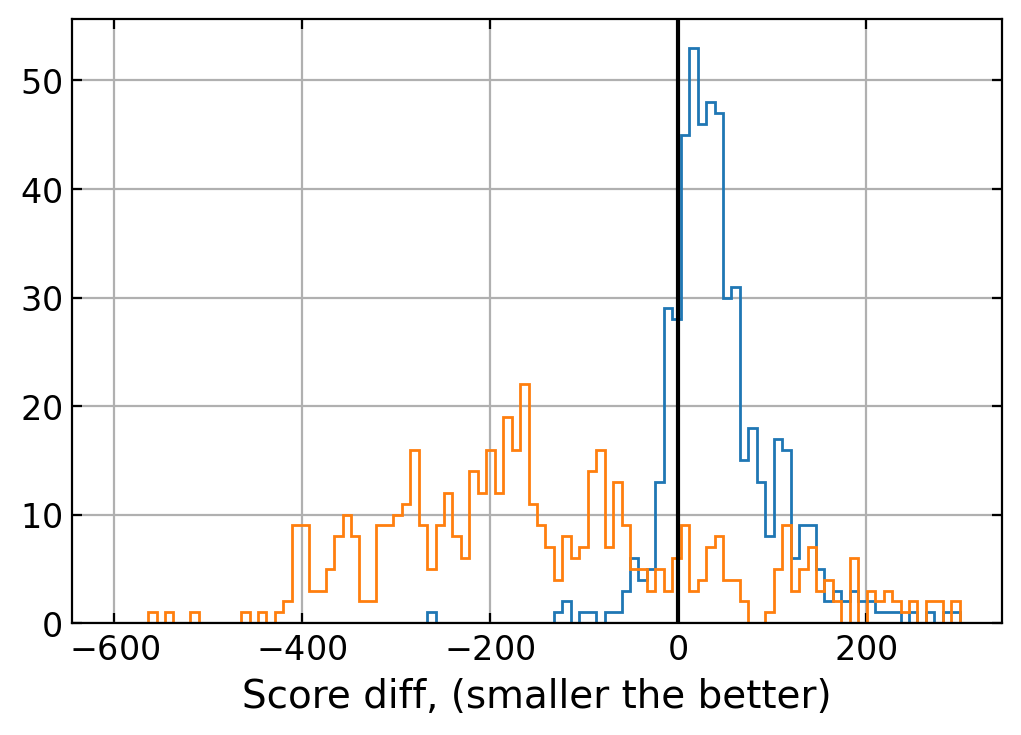

In [ ]:
score_old = dist_12-dist_non12
score_new = score_old - (total_layers_12-total_layers_non12)*100
hist(score_old,range=(-600,300),histtype="step")
hist(score_new,range=(-600,300),histtype="step");
grid()
axvline(0,color="k")
xlabel("Score diff, (smaller the better)")

sum(score_new<0)/len(score_new), sum(score_new>0)

### Plot some events

In [18]:
Vertices_truth[0]
vertex_DET = [Vertices_truth[0][2]/100-(70+49.5),Vertices_truth[0][0]/100,Vertices_truth[0][1]/100-85.47]
vertex_DET

[-15.0, 5.0, -10.0]

In [9]:
mask_plot_1 = mask_reconstructible&~mask
entry_plot1 = np.flatnonzero(mask_plot_1)
sum(mask_plot_1)

146

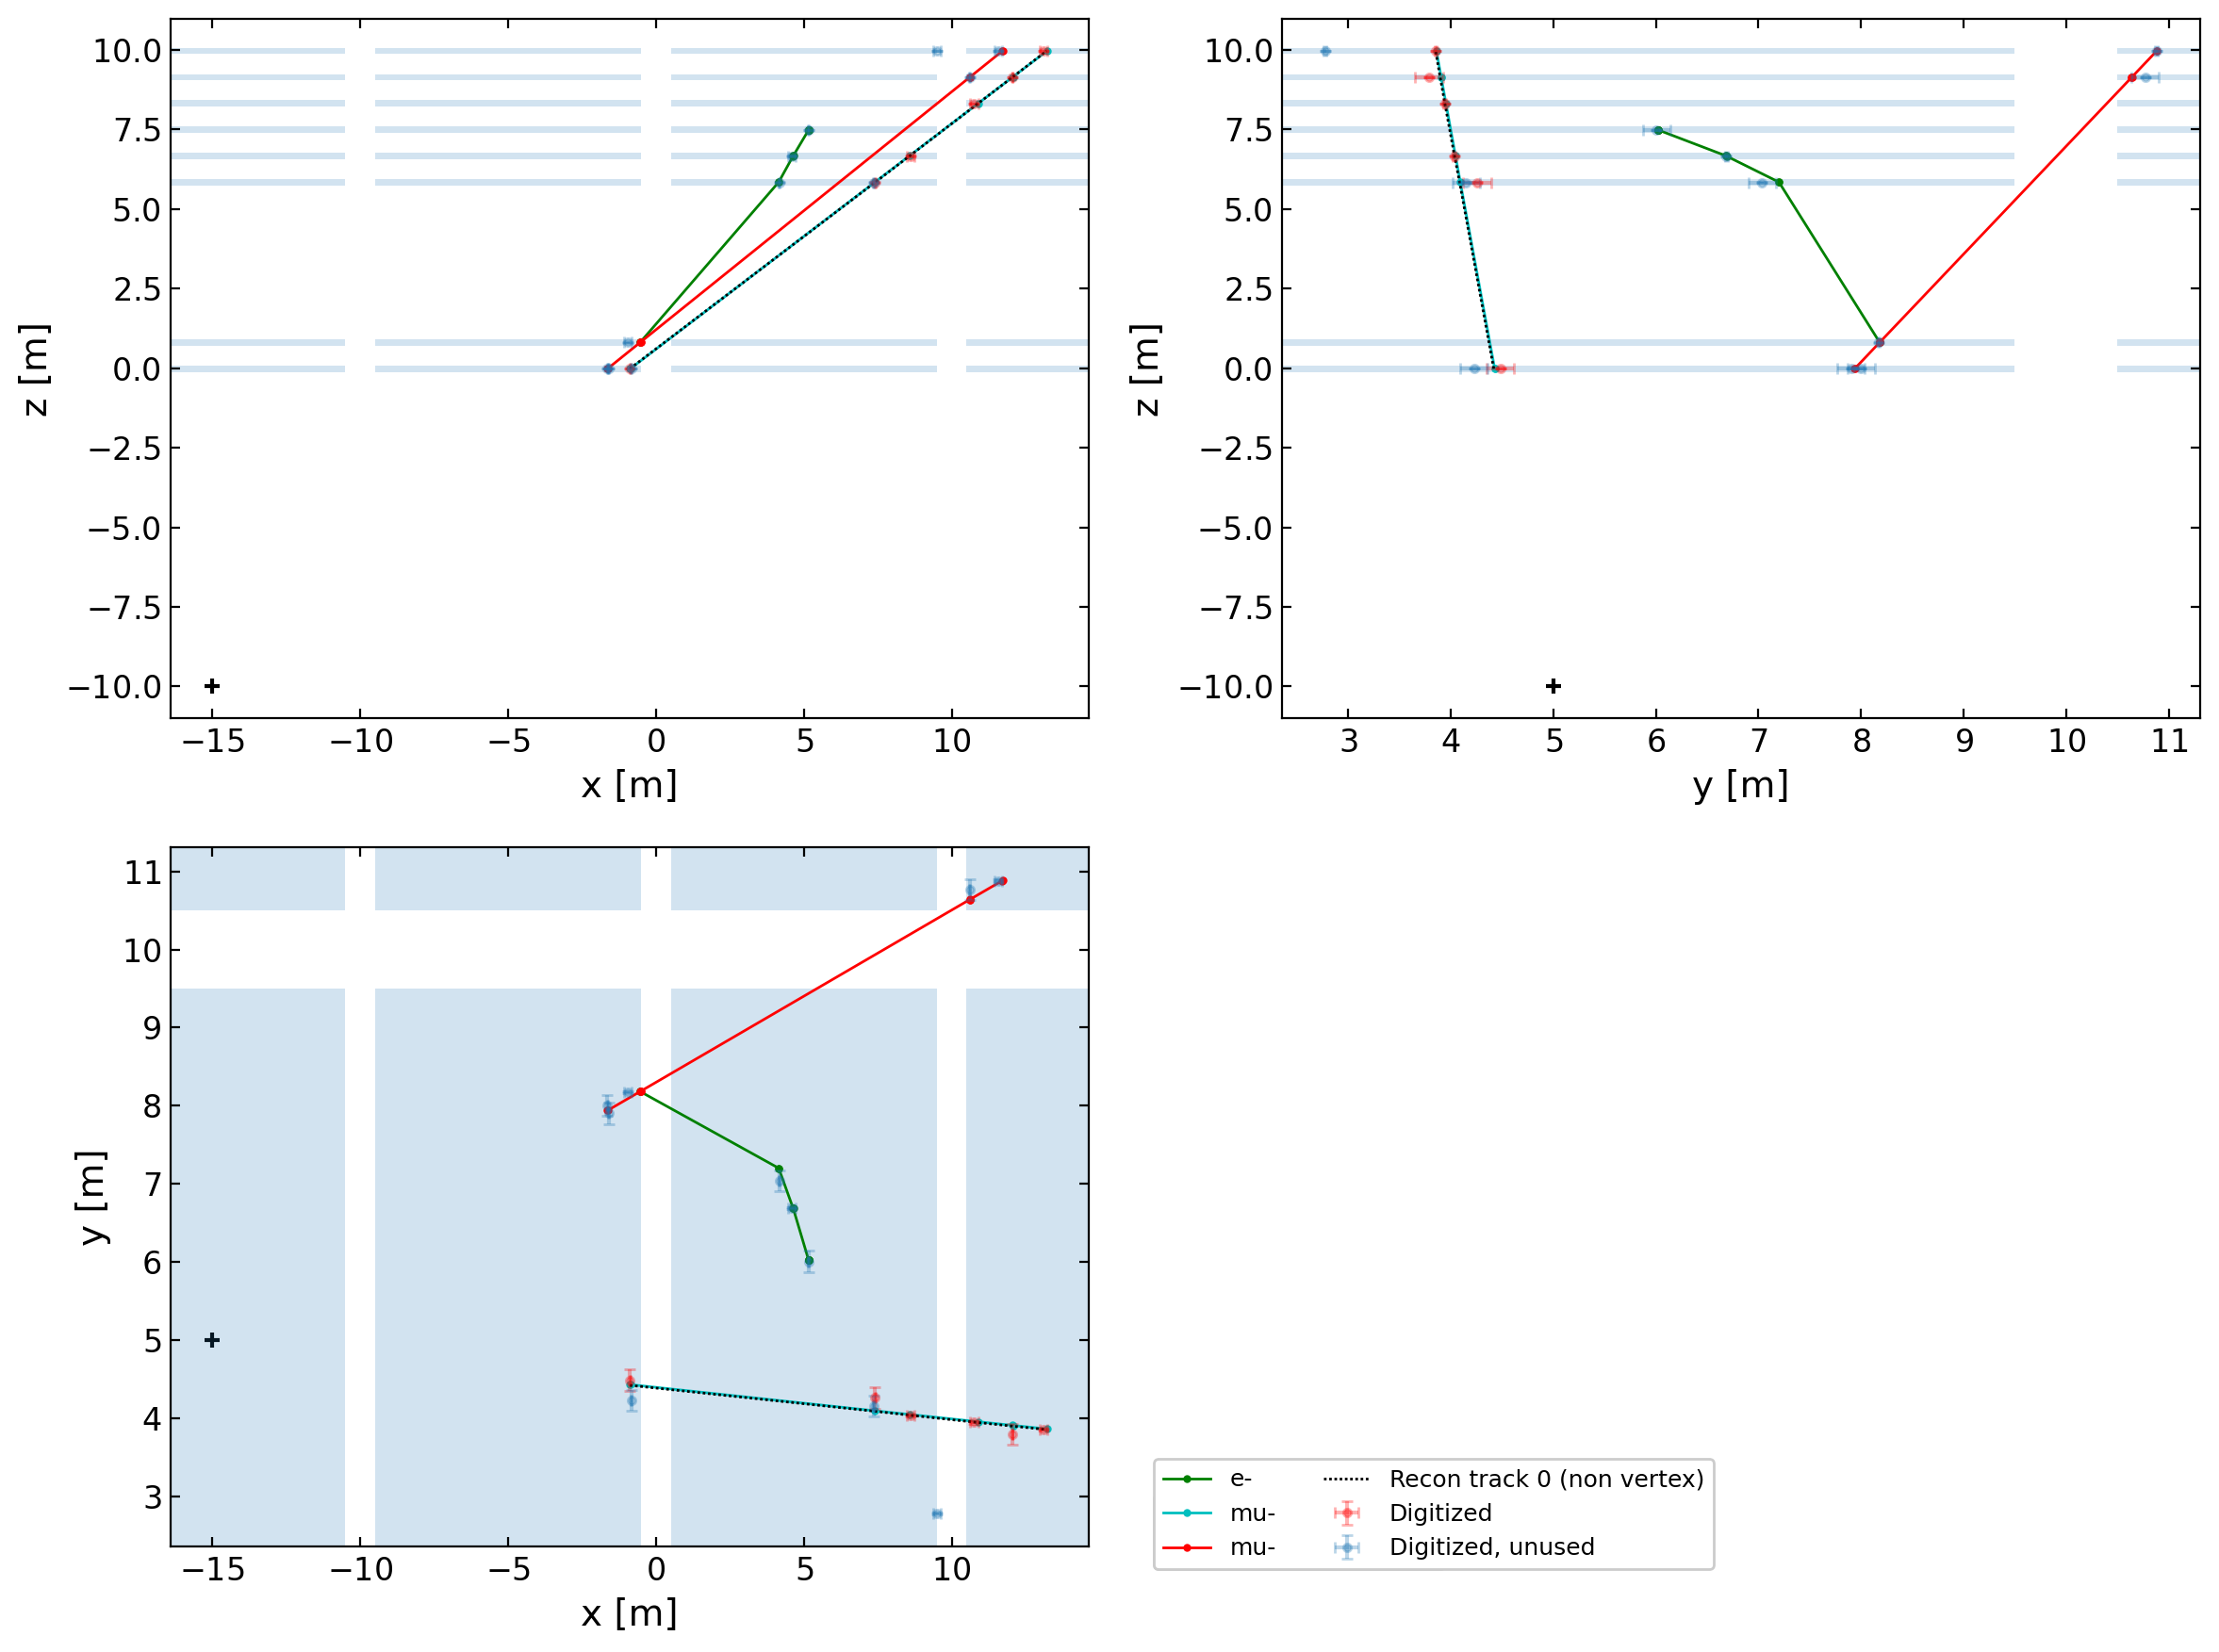

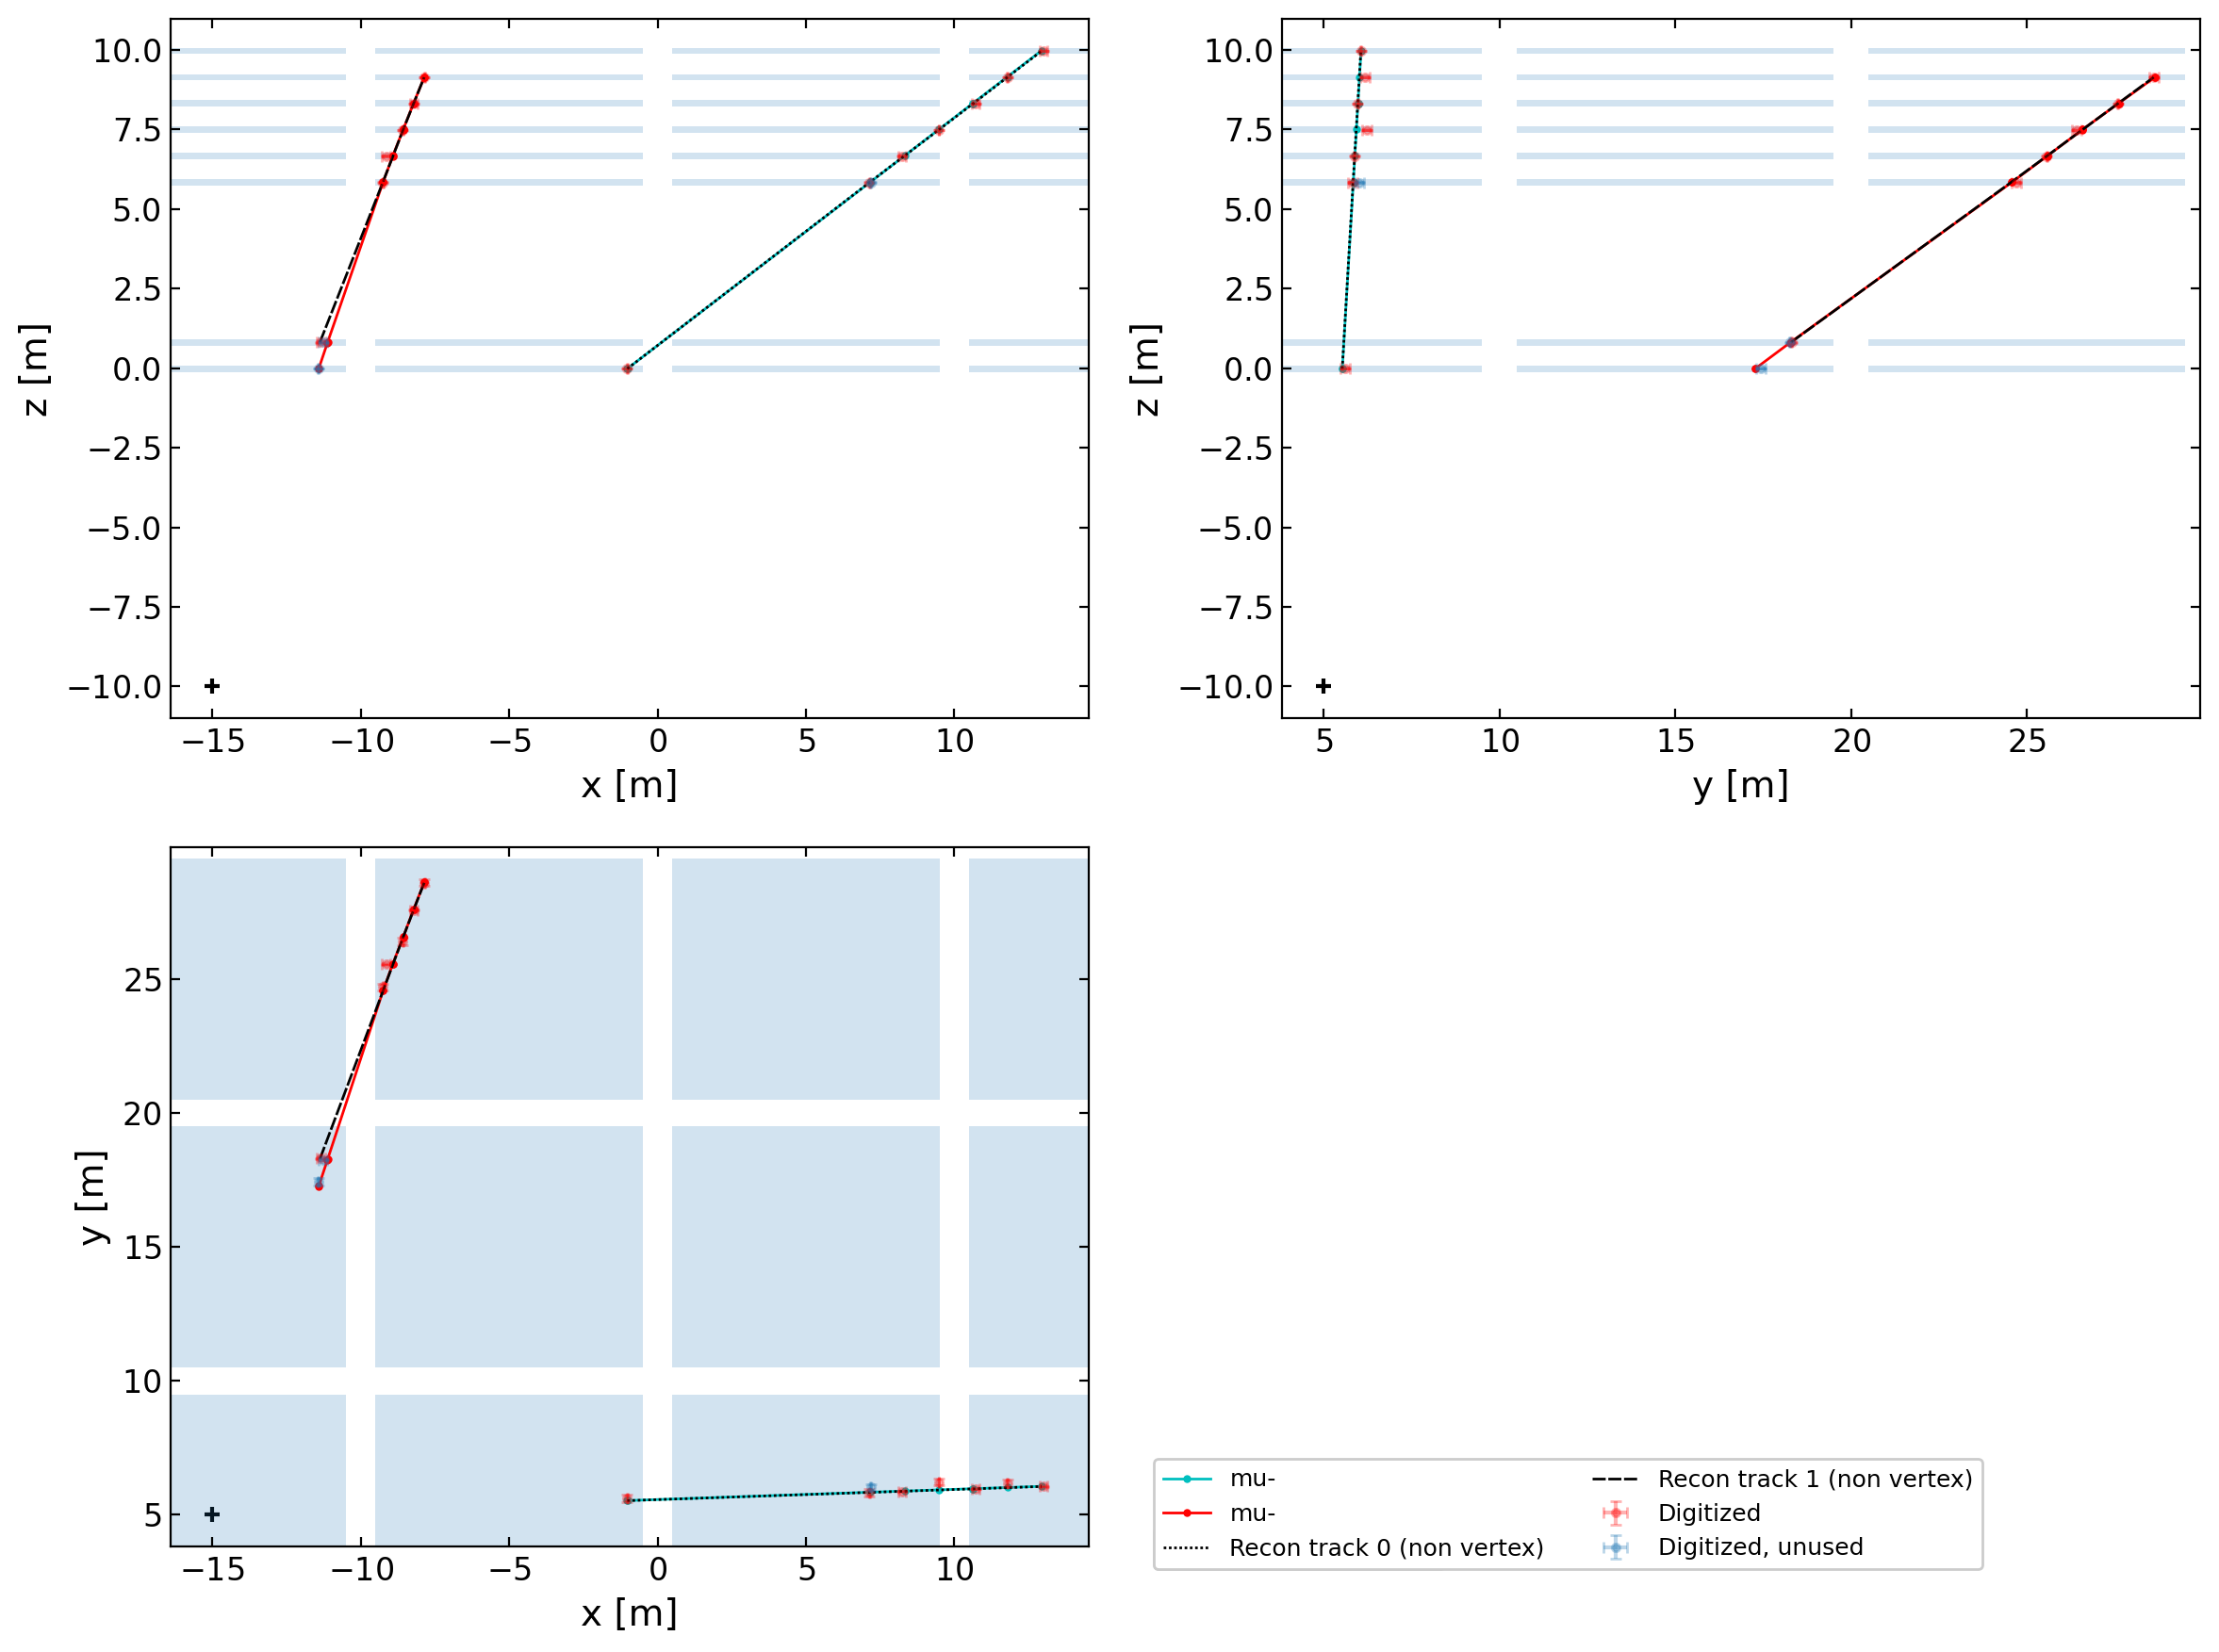

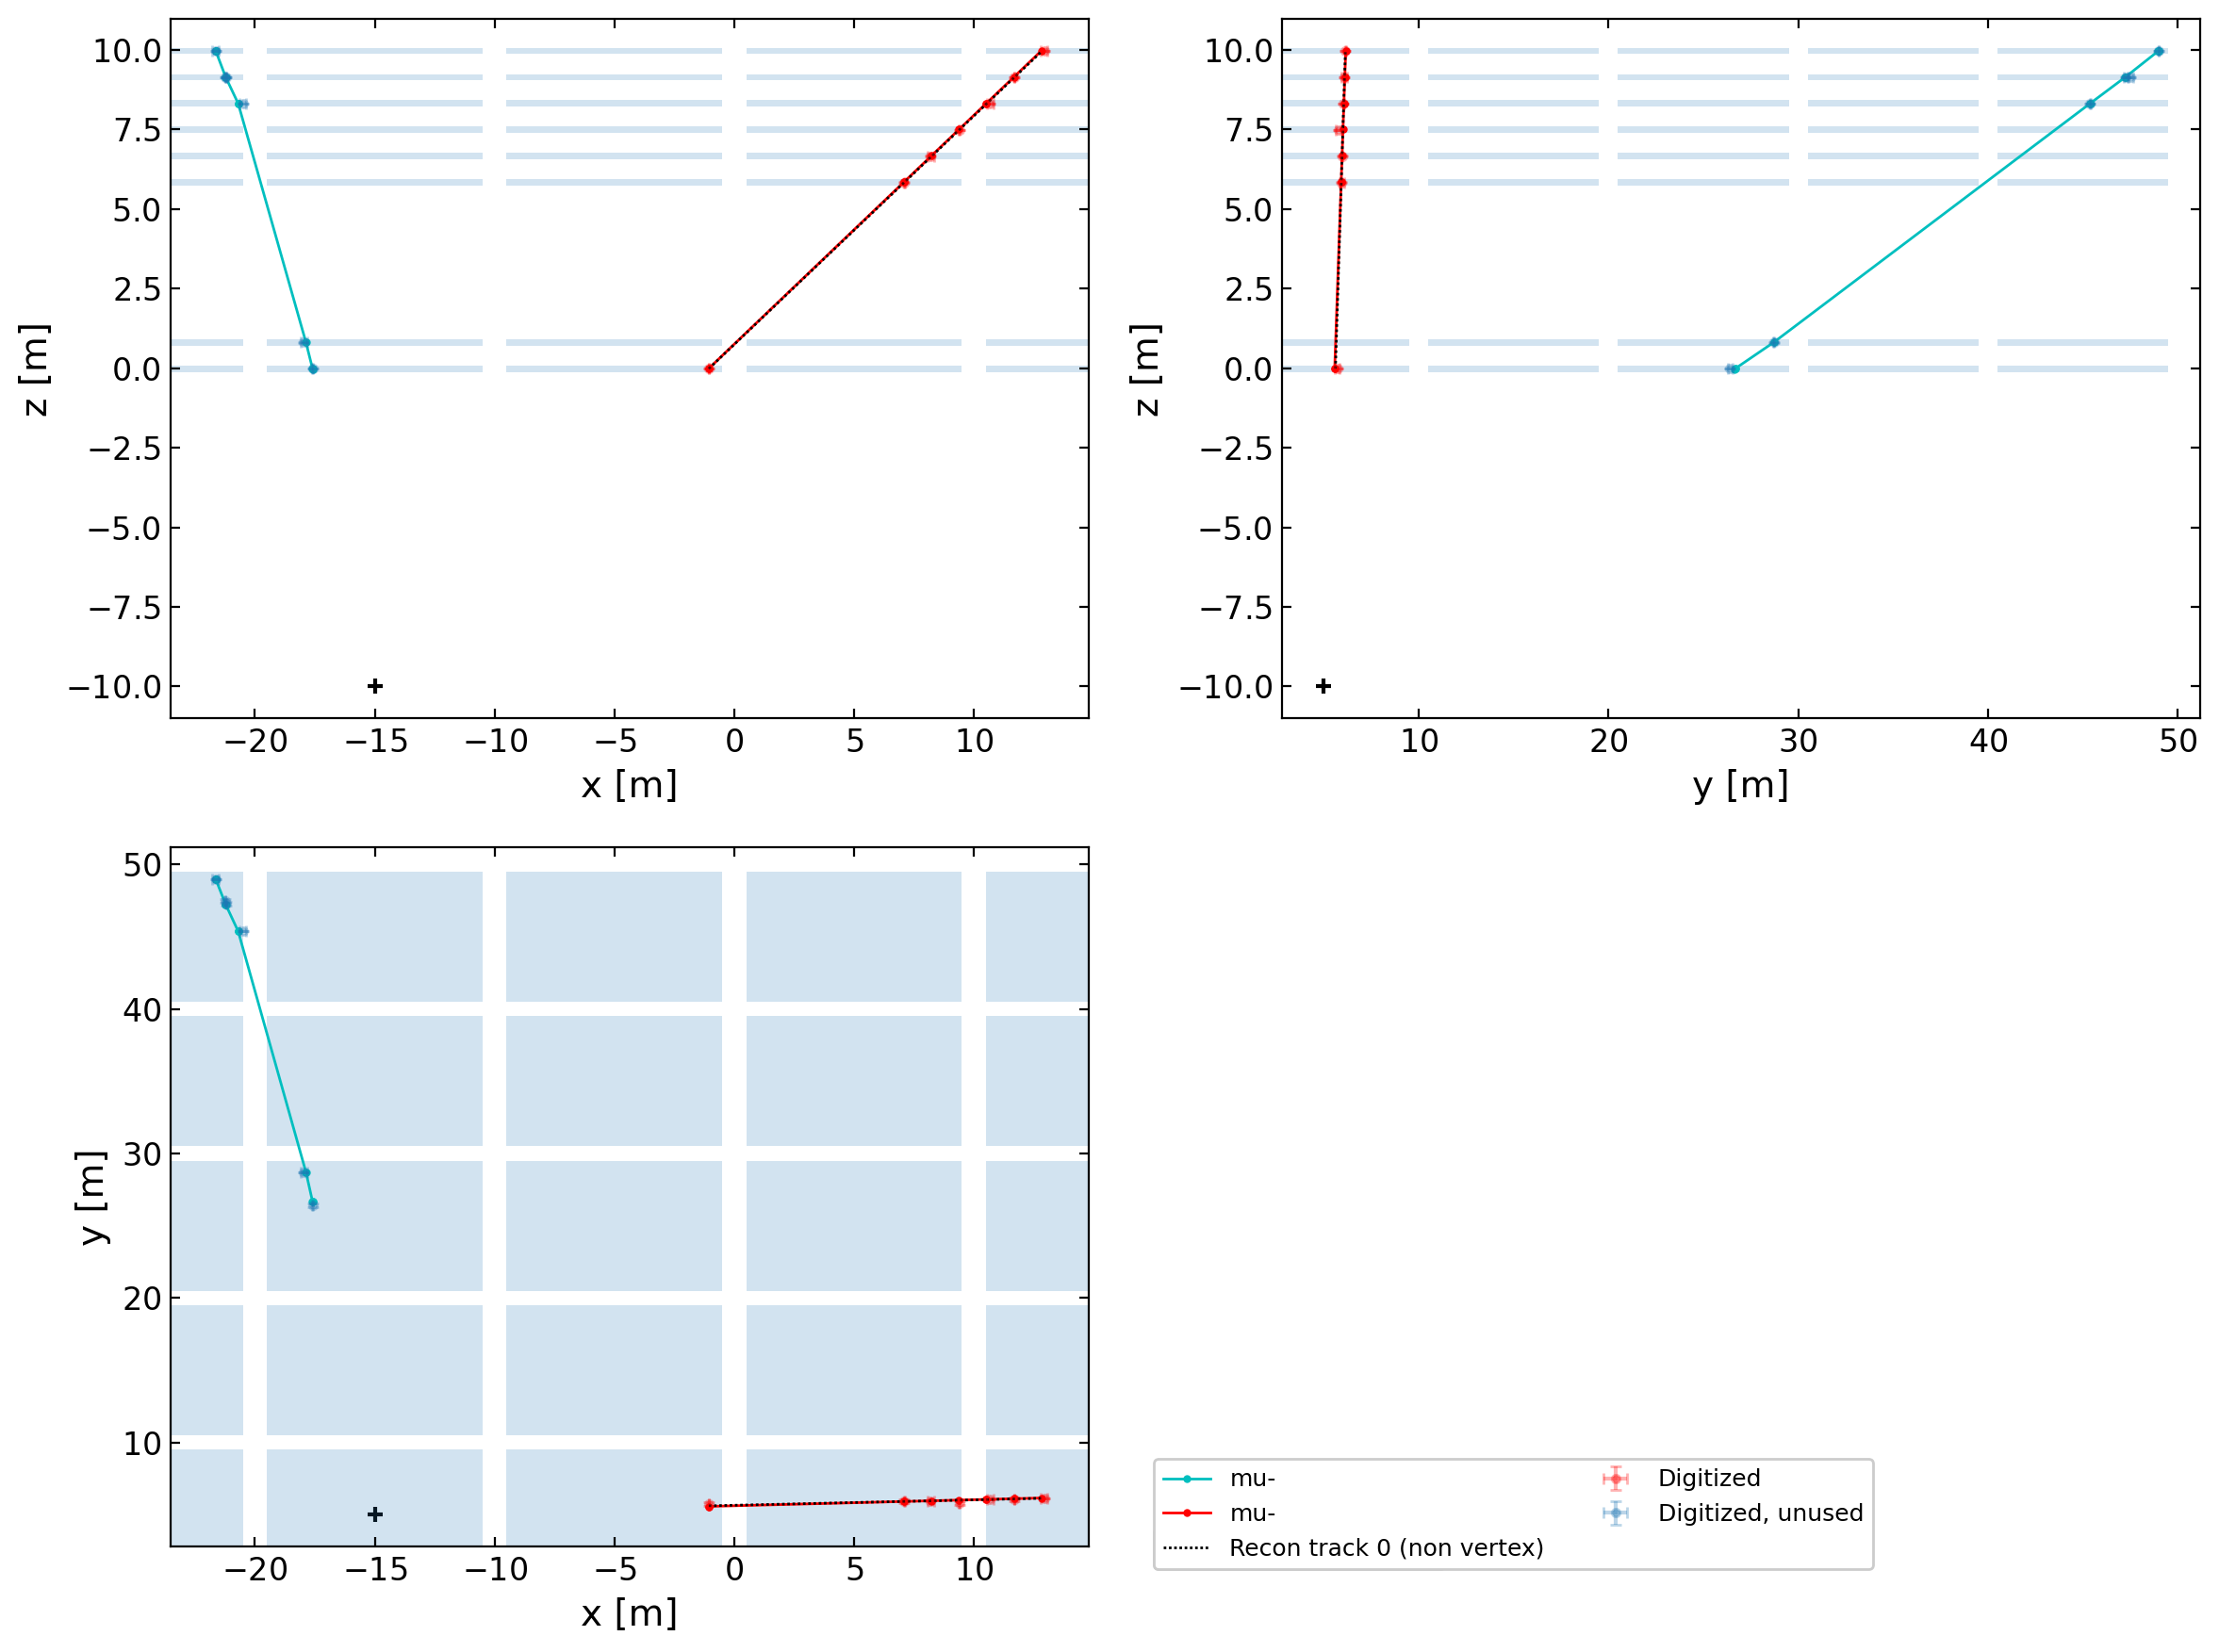

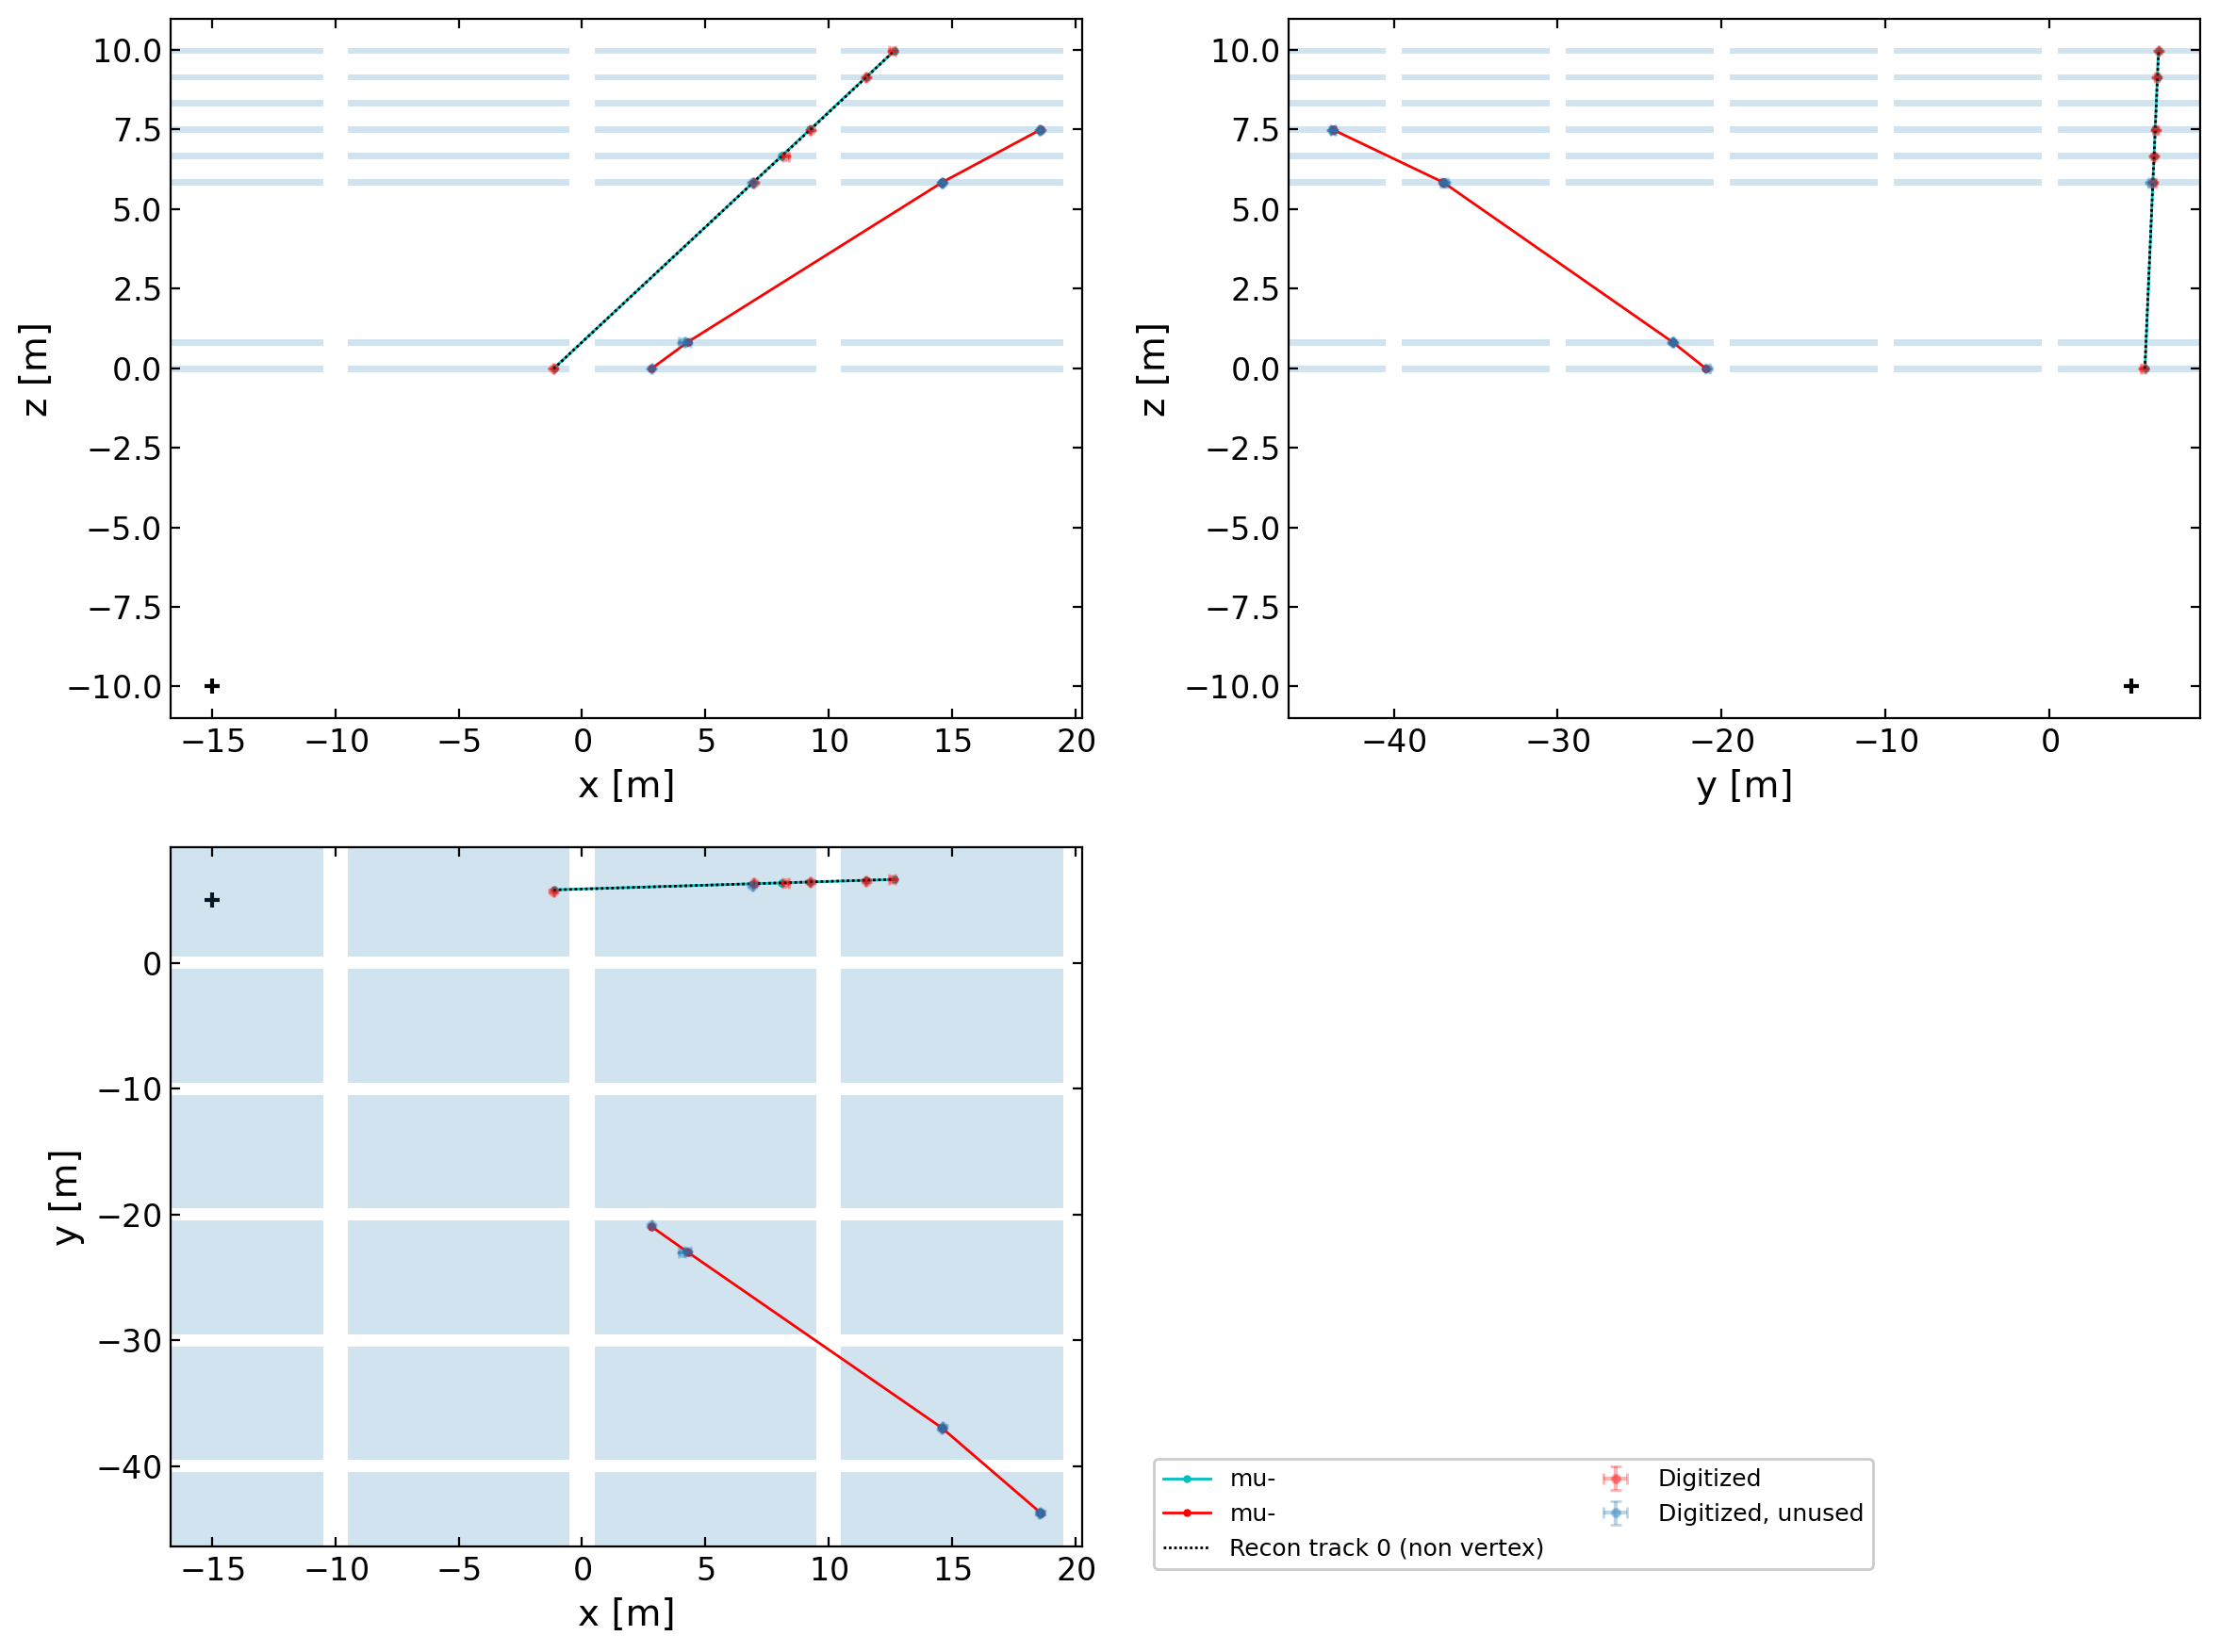

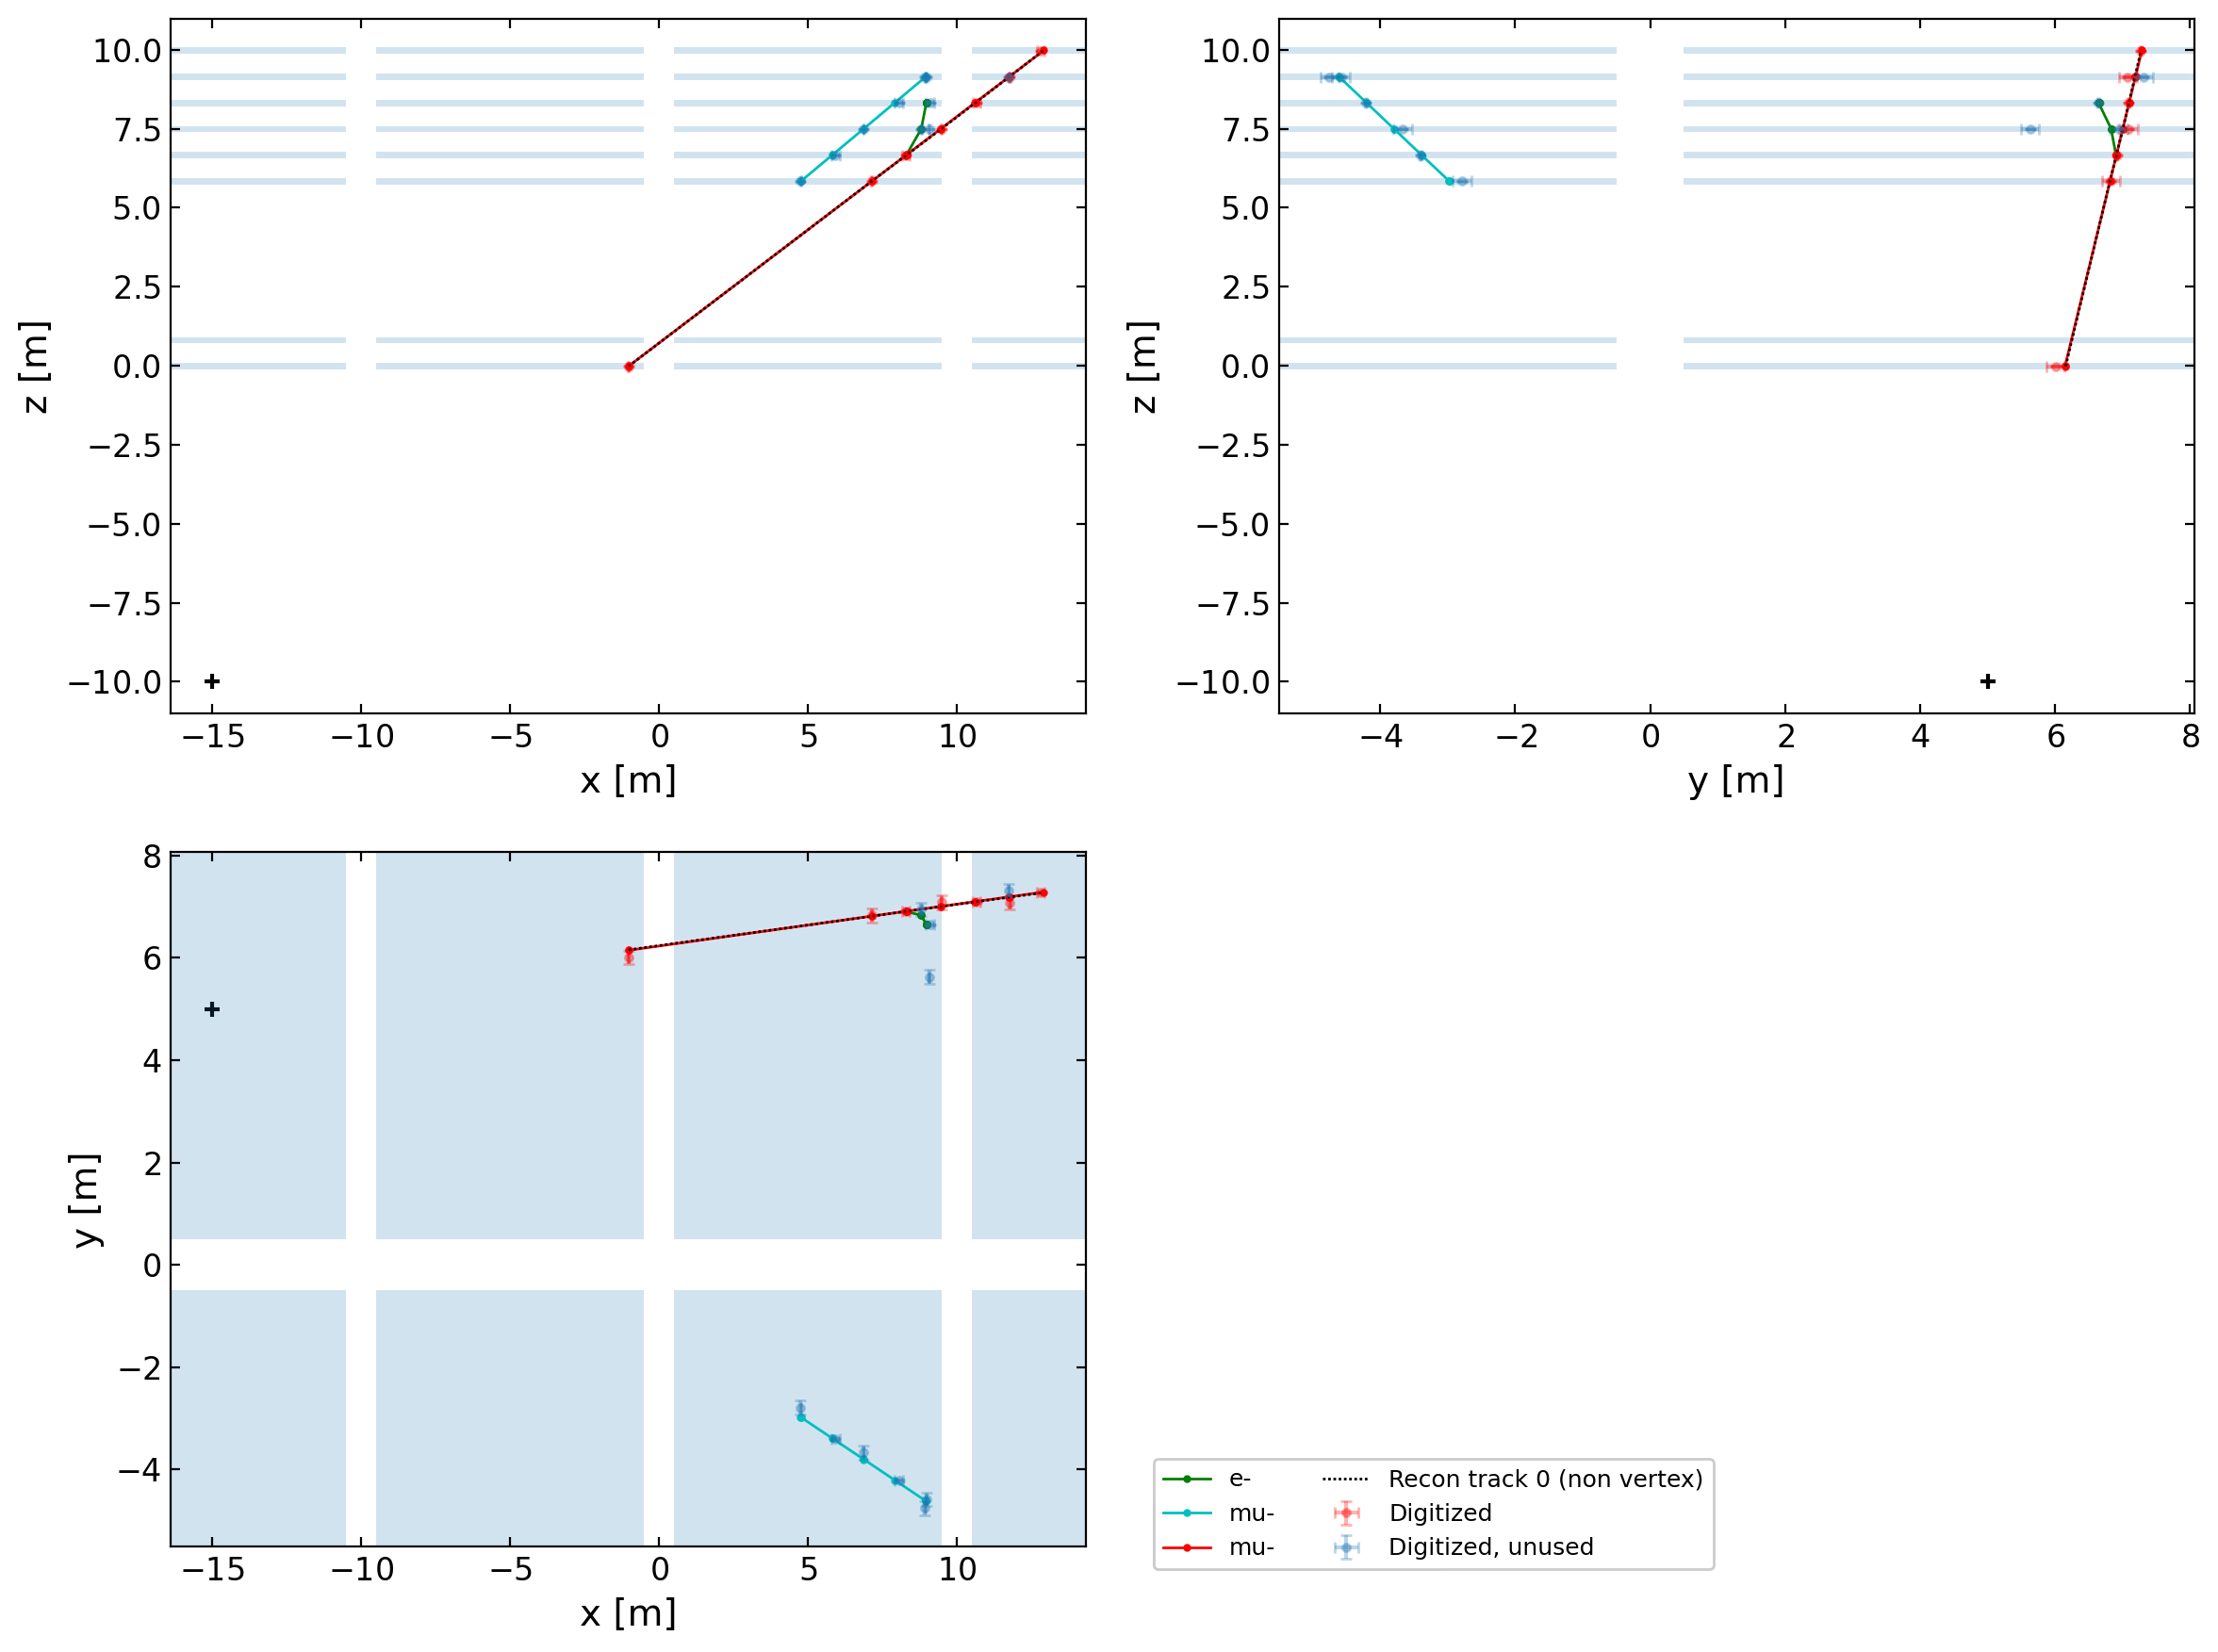

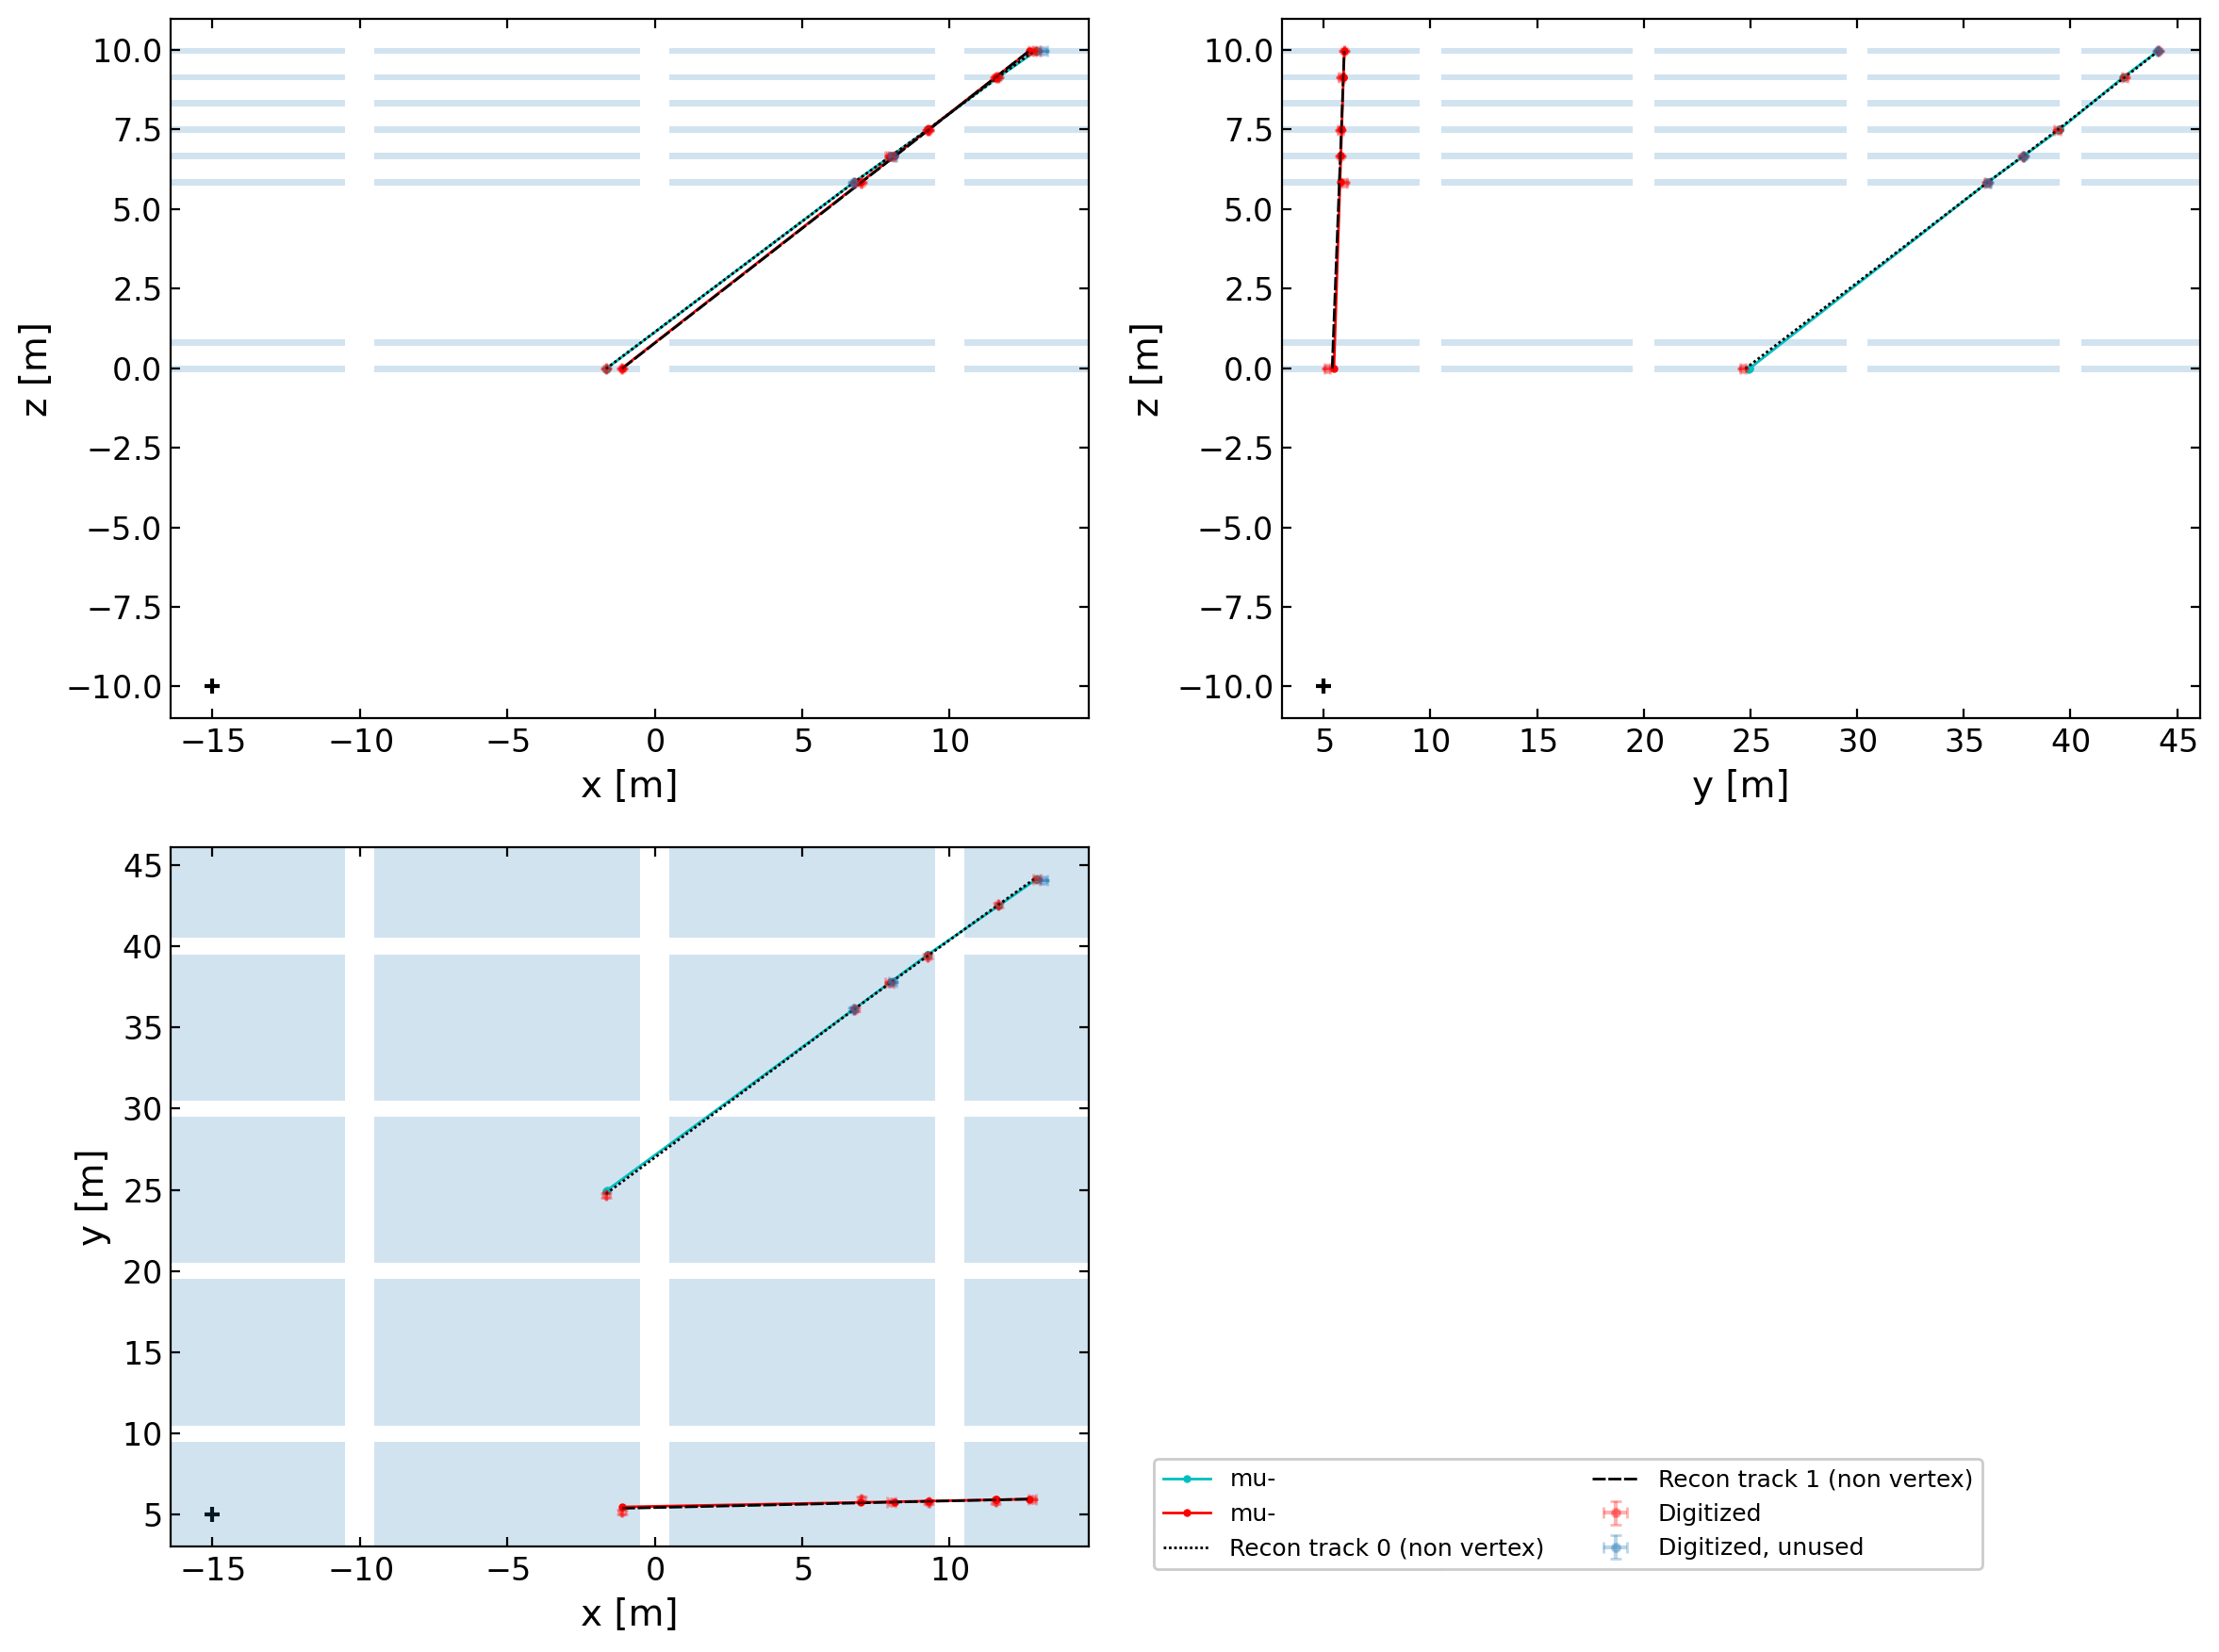

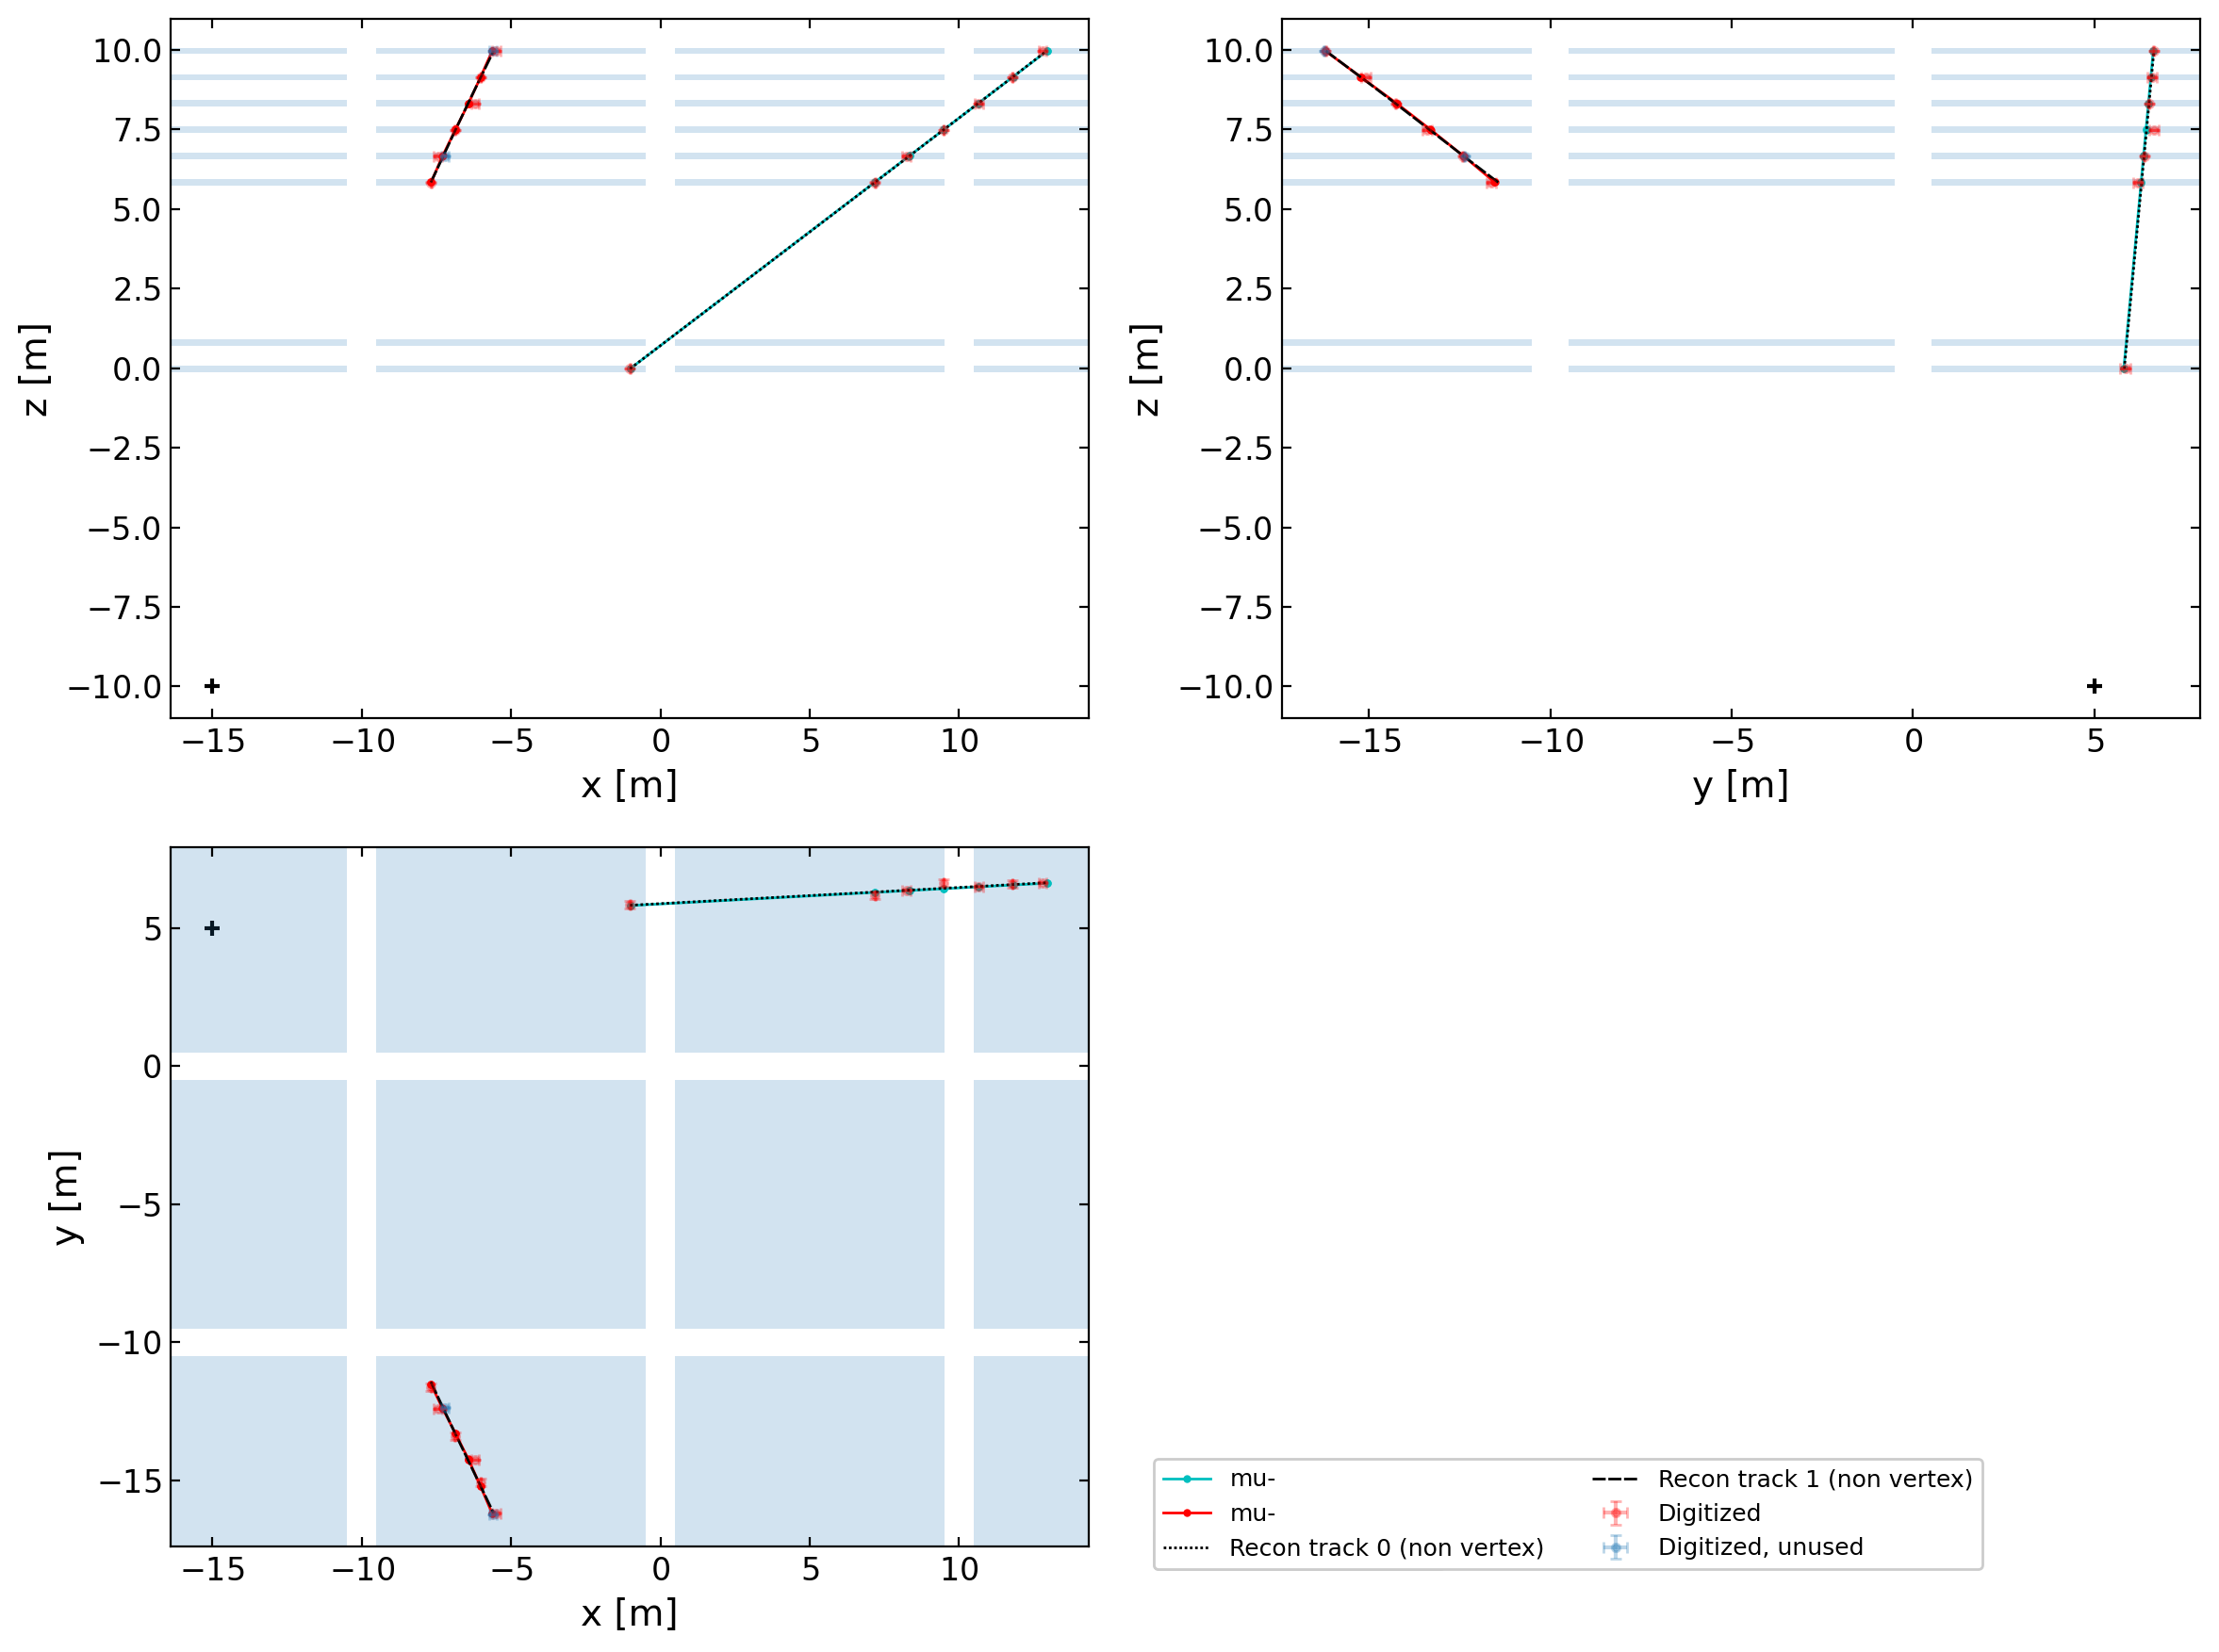

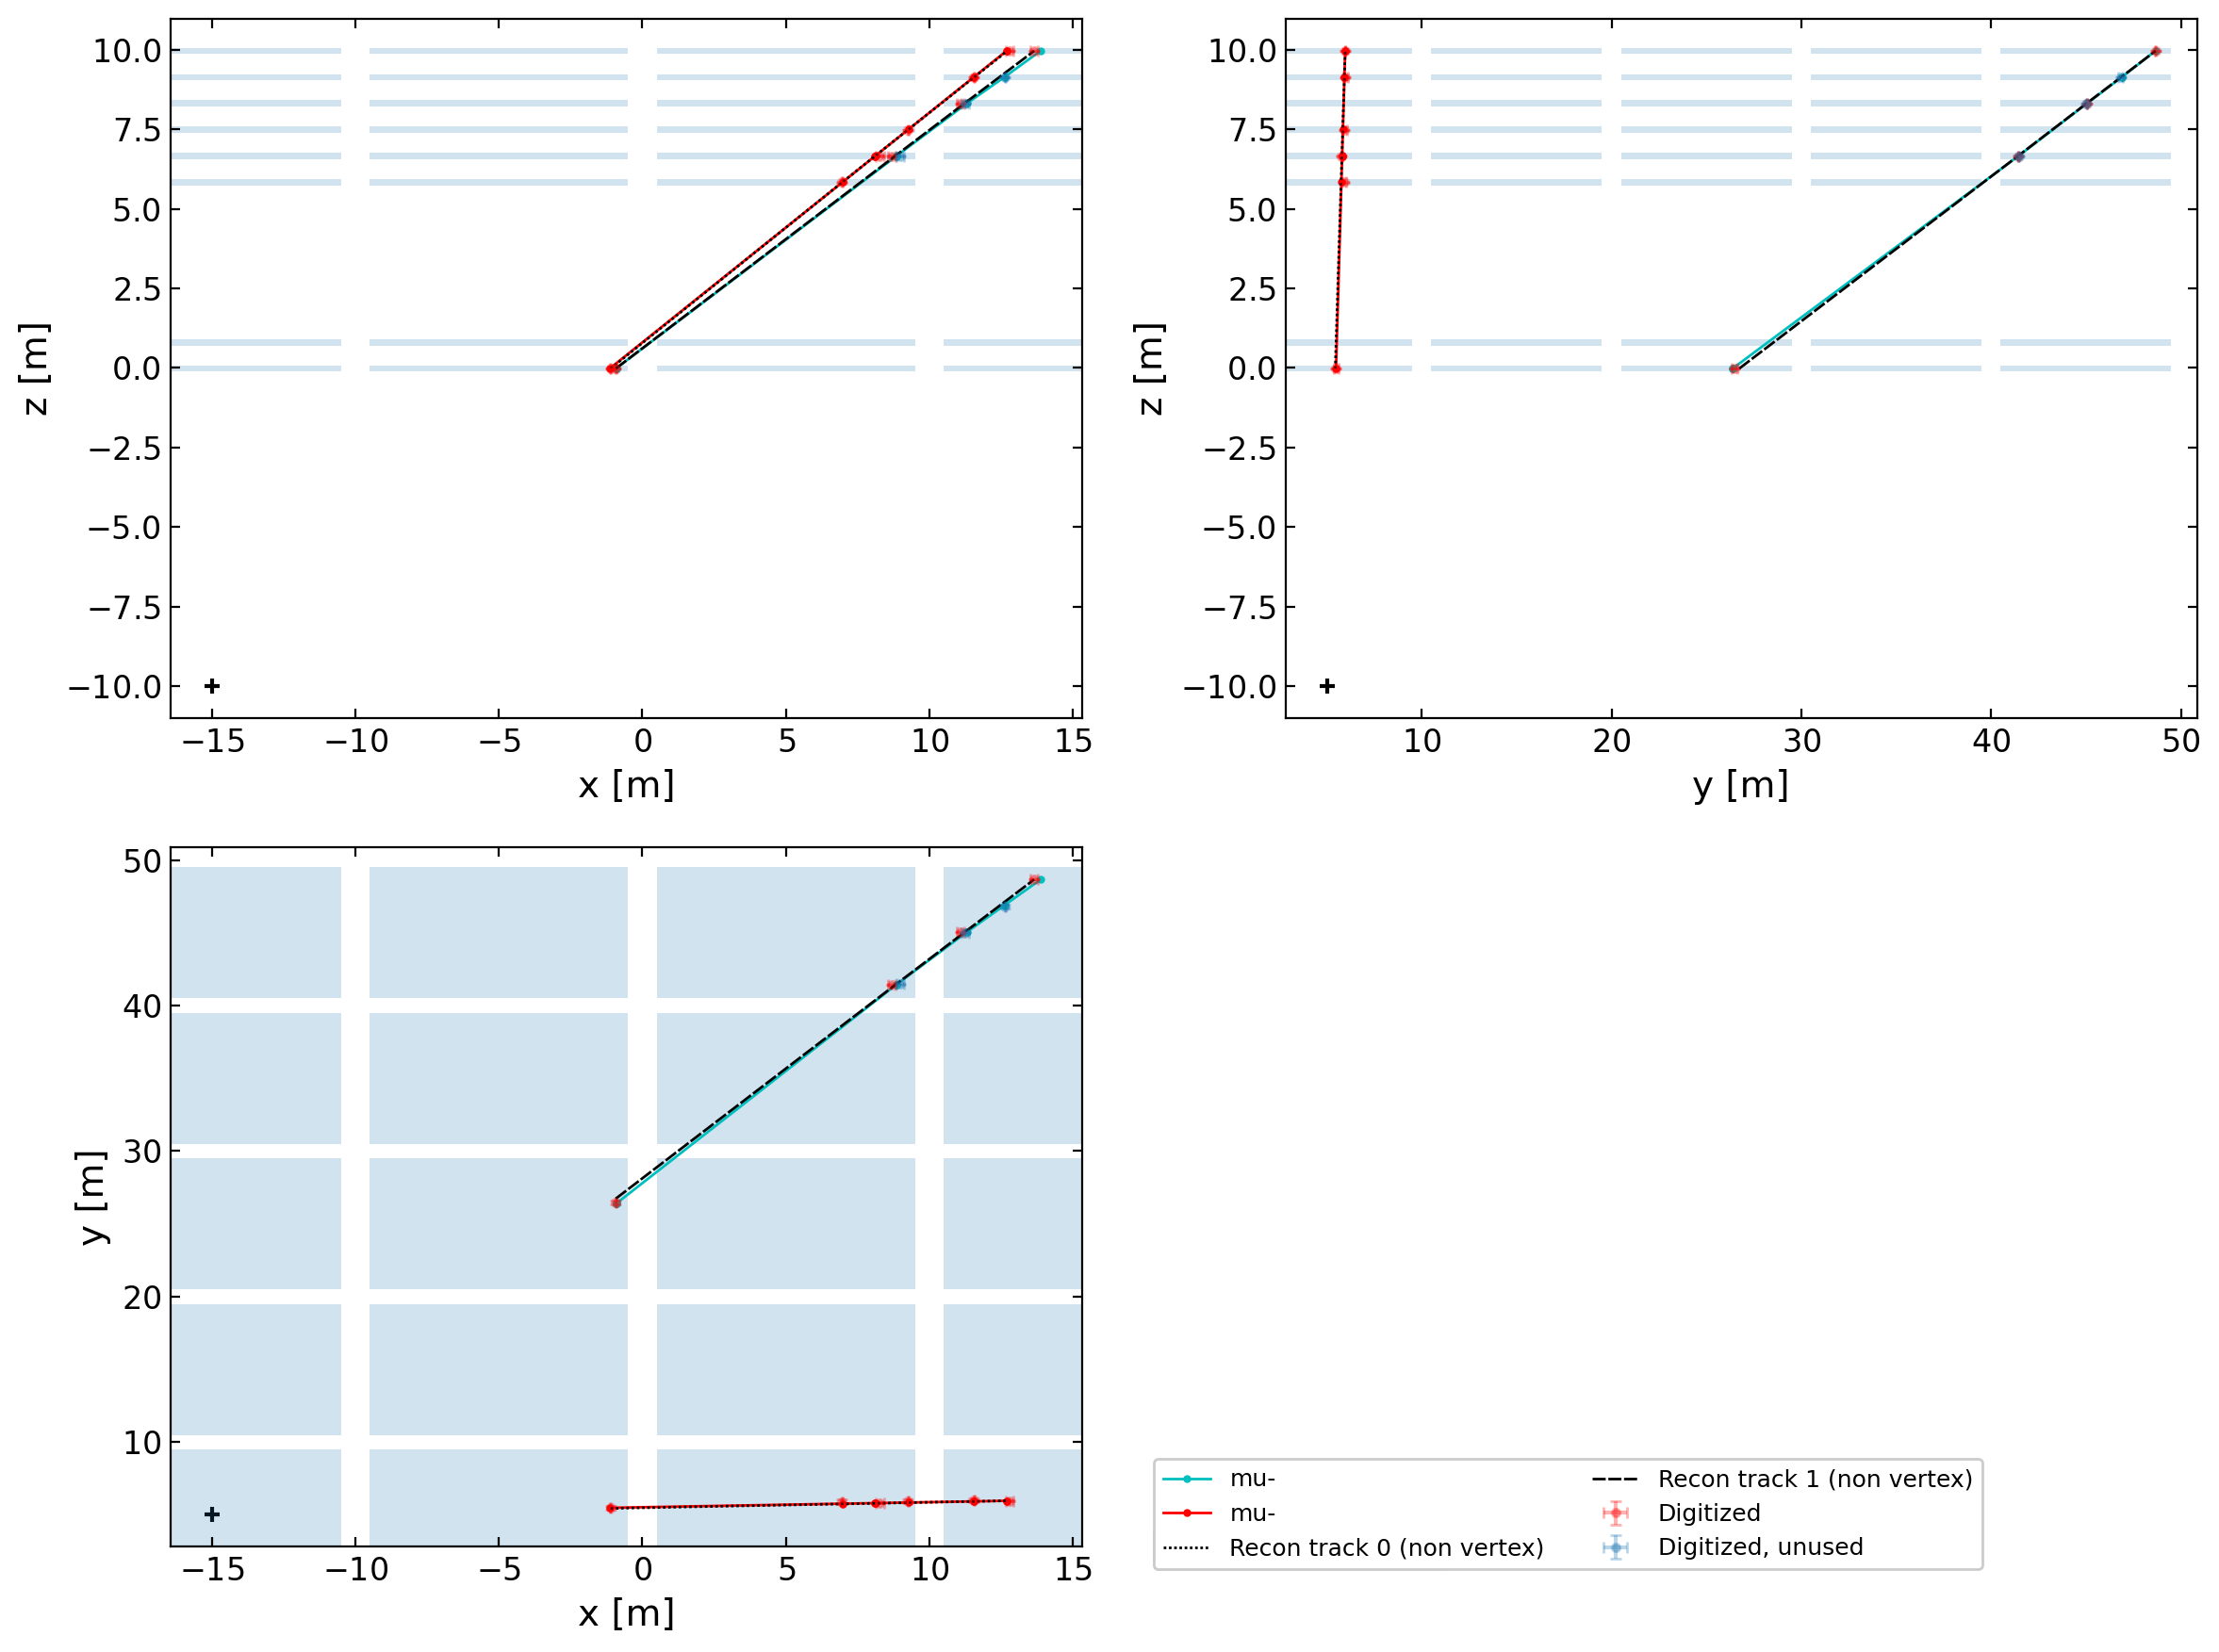

In [19]:
for j in range(0,10):
    
    # ev.EventNumber = Entry_failed[j]
    ev.EventNumber = entry_plot1[j]
    if mask_reconstructible[ev.EventNumber]:


        # Plot truth
        fig,axs=plt.subplots(2,2,figsize=(12,9))
        fig = vis.plot_truth(ev,fig=fig, disp_det_view=False, disp_vertex=True, disp_first_hit=False);
        # Plot the truth vertex
        axs=fig.axes
        axs[0].scatter(vertex_DET[0],vertex_DET[2],color="black",marker="+")
        axs[1].scatter(vertex_DET[1],vertex_DET[2],color="black",marker="+")
        axs[2].scatter(vertex_DET[0],vertex_DET[1],color="black",marker="+",label="Vertex Truth ")

        # Plot Reconstruction
        fig = vis.plot_recon(ev,fig=fig, disp_det_view=True, disp_recon_vertex=True);
        show()

In [11]:
mask_plot_2 = ~mask_residual
sum(mask_plot_2)

148

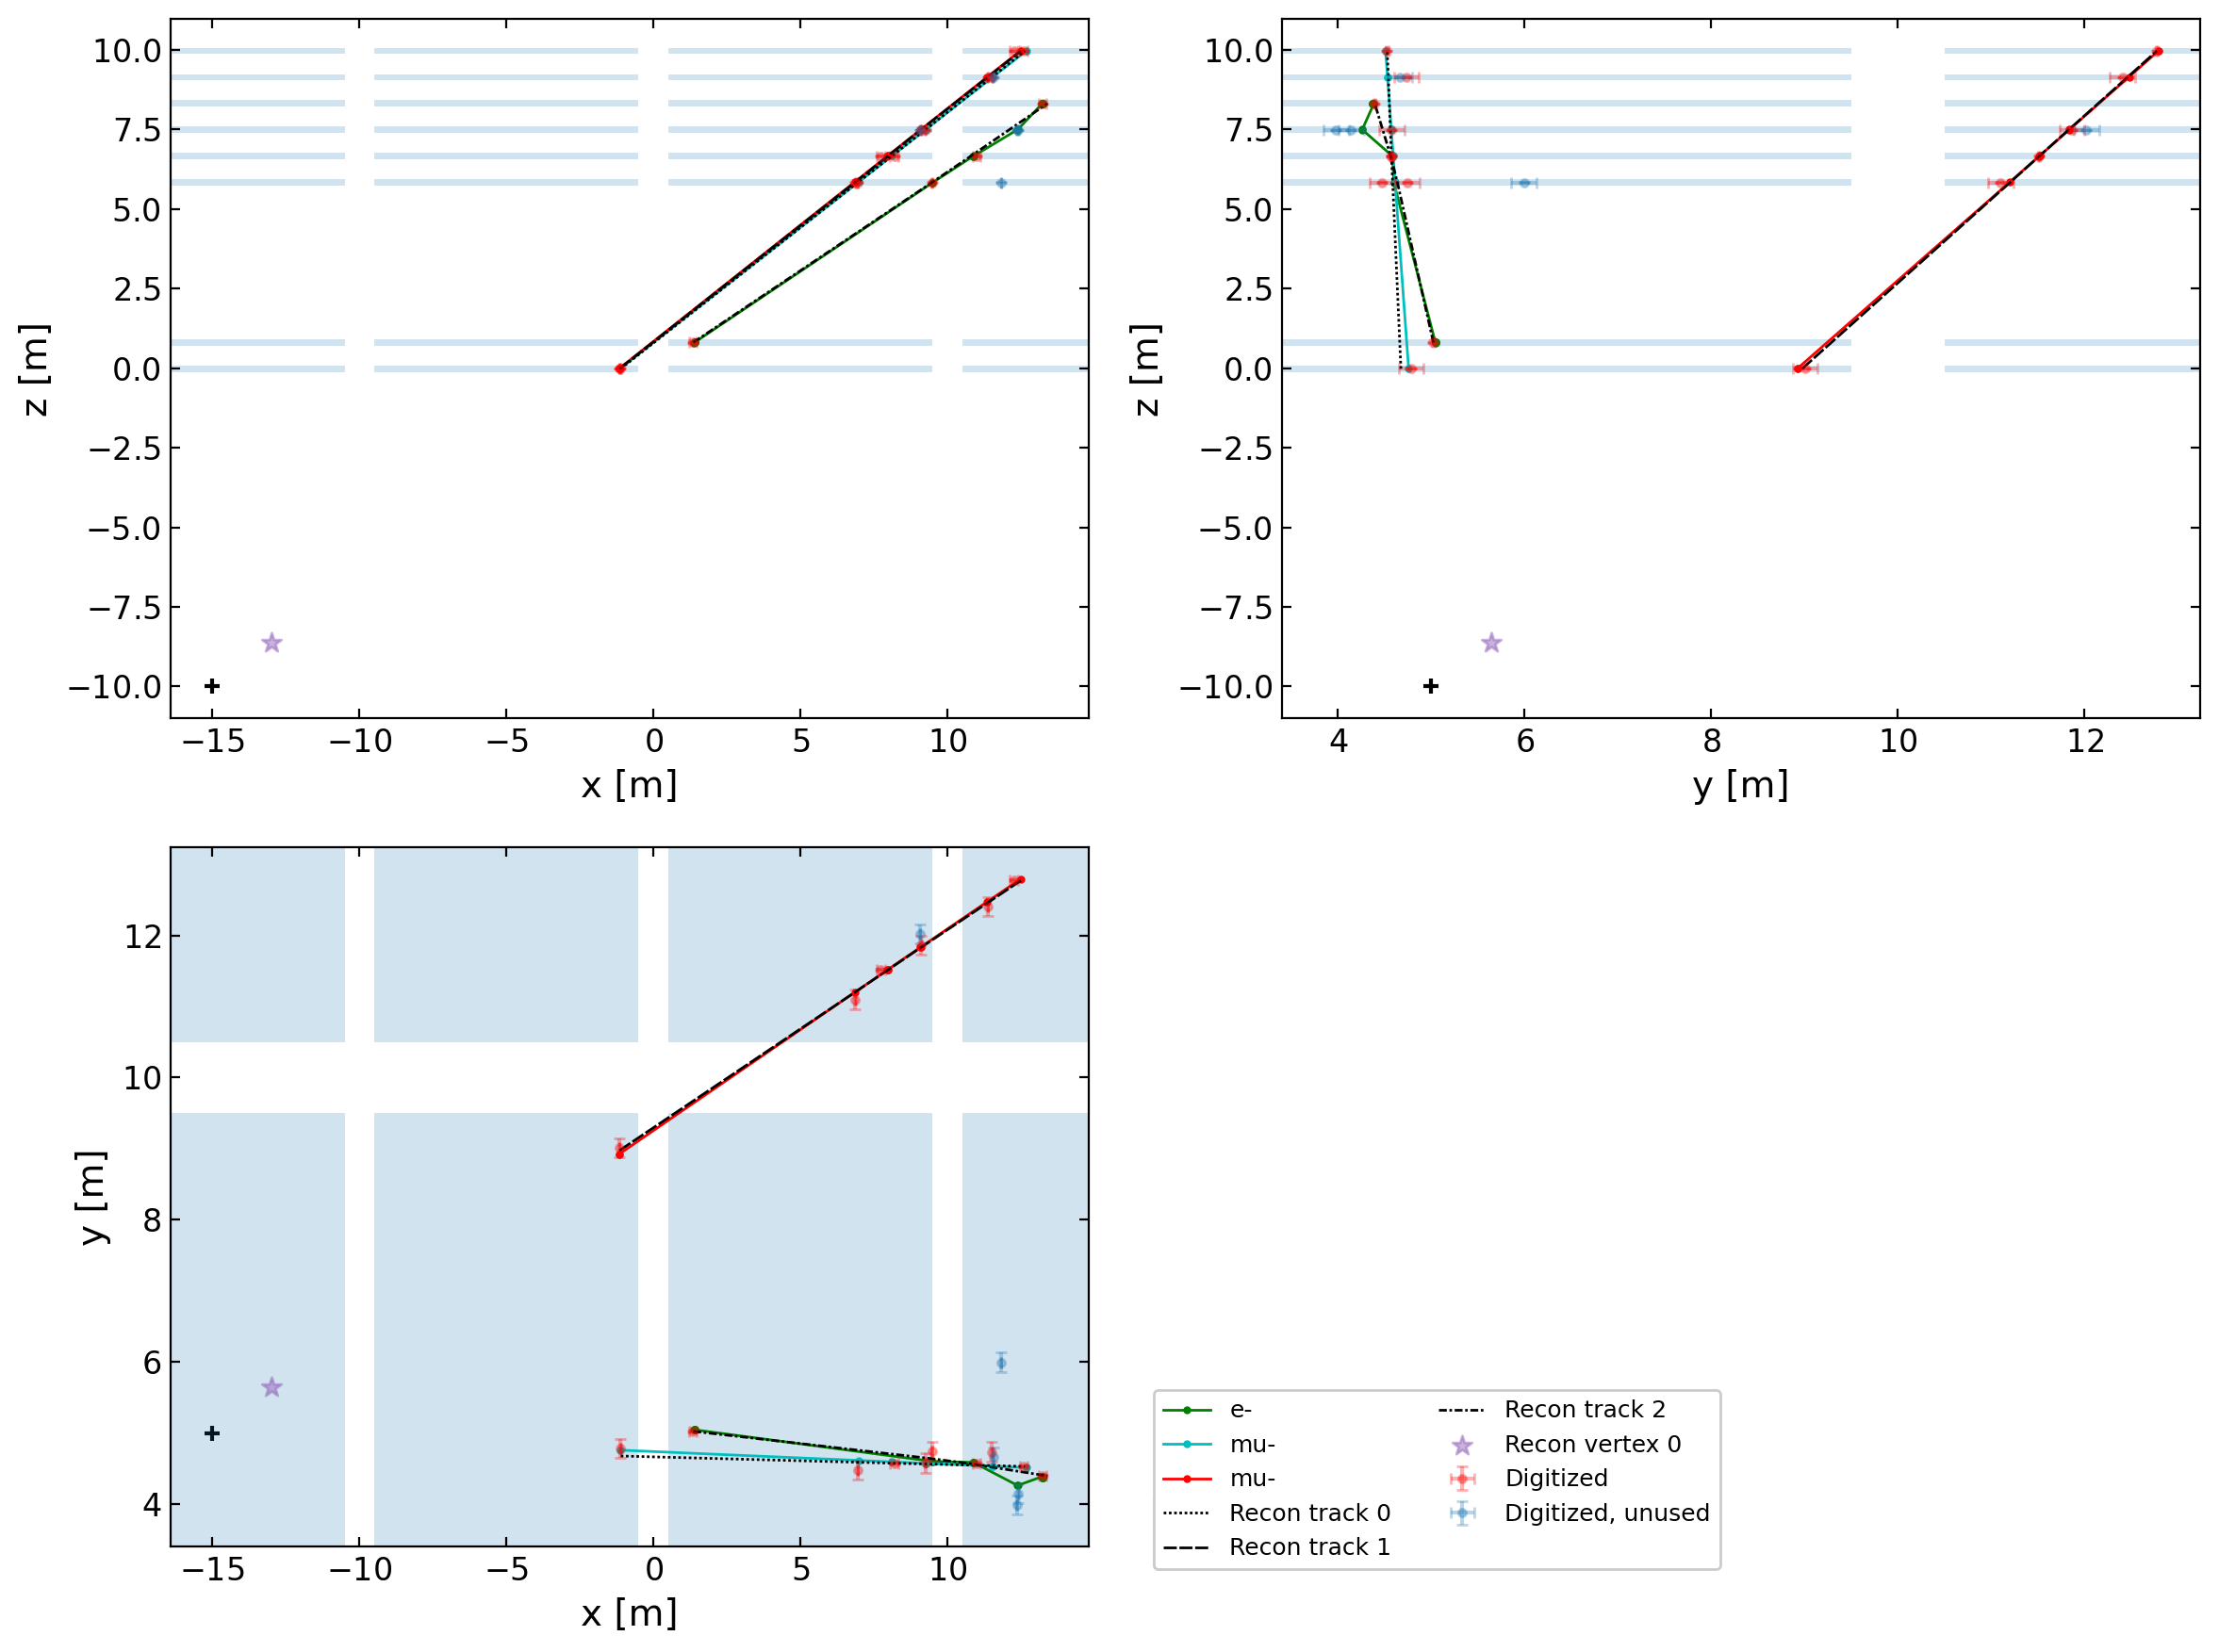

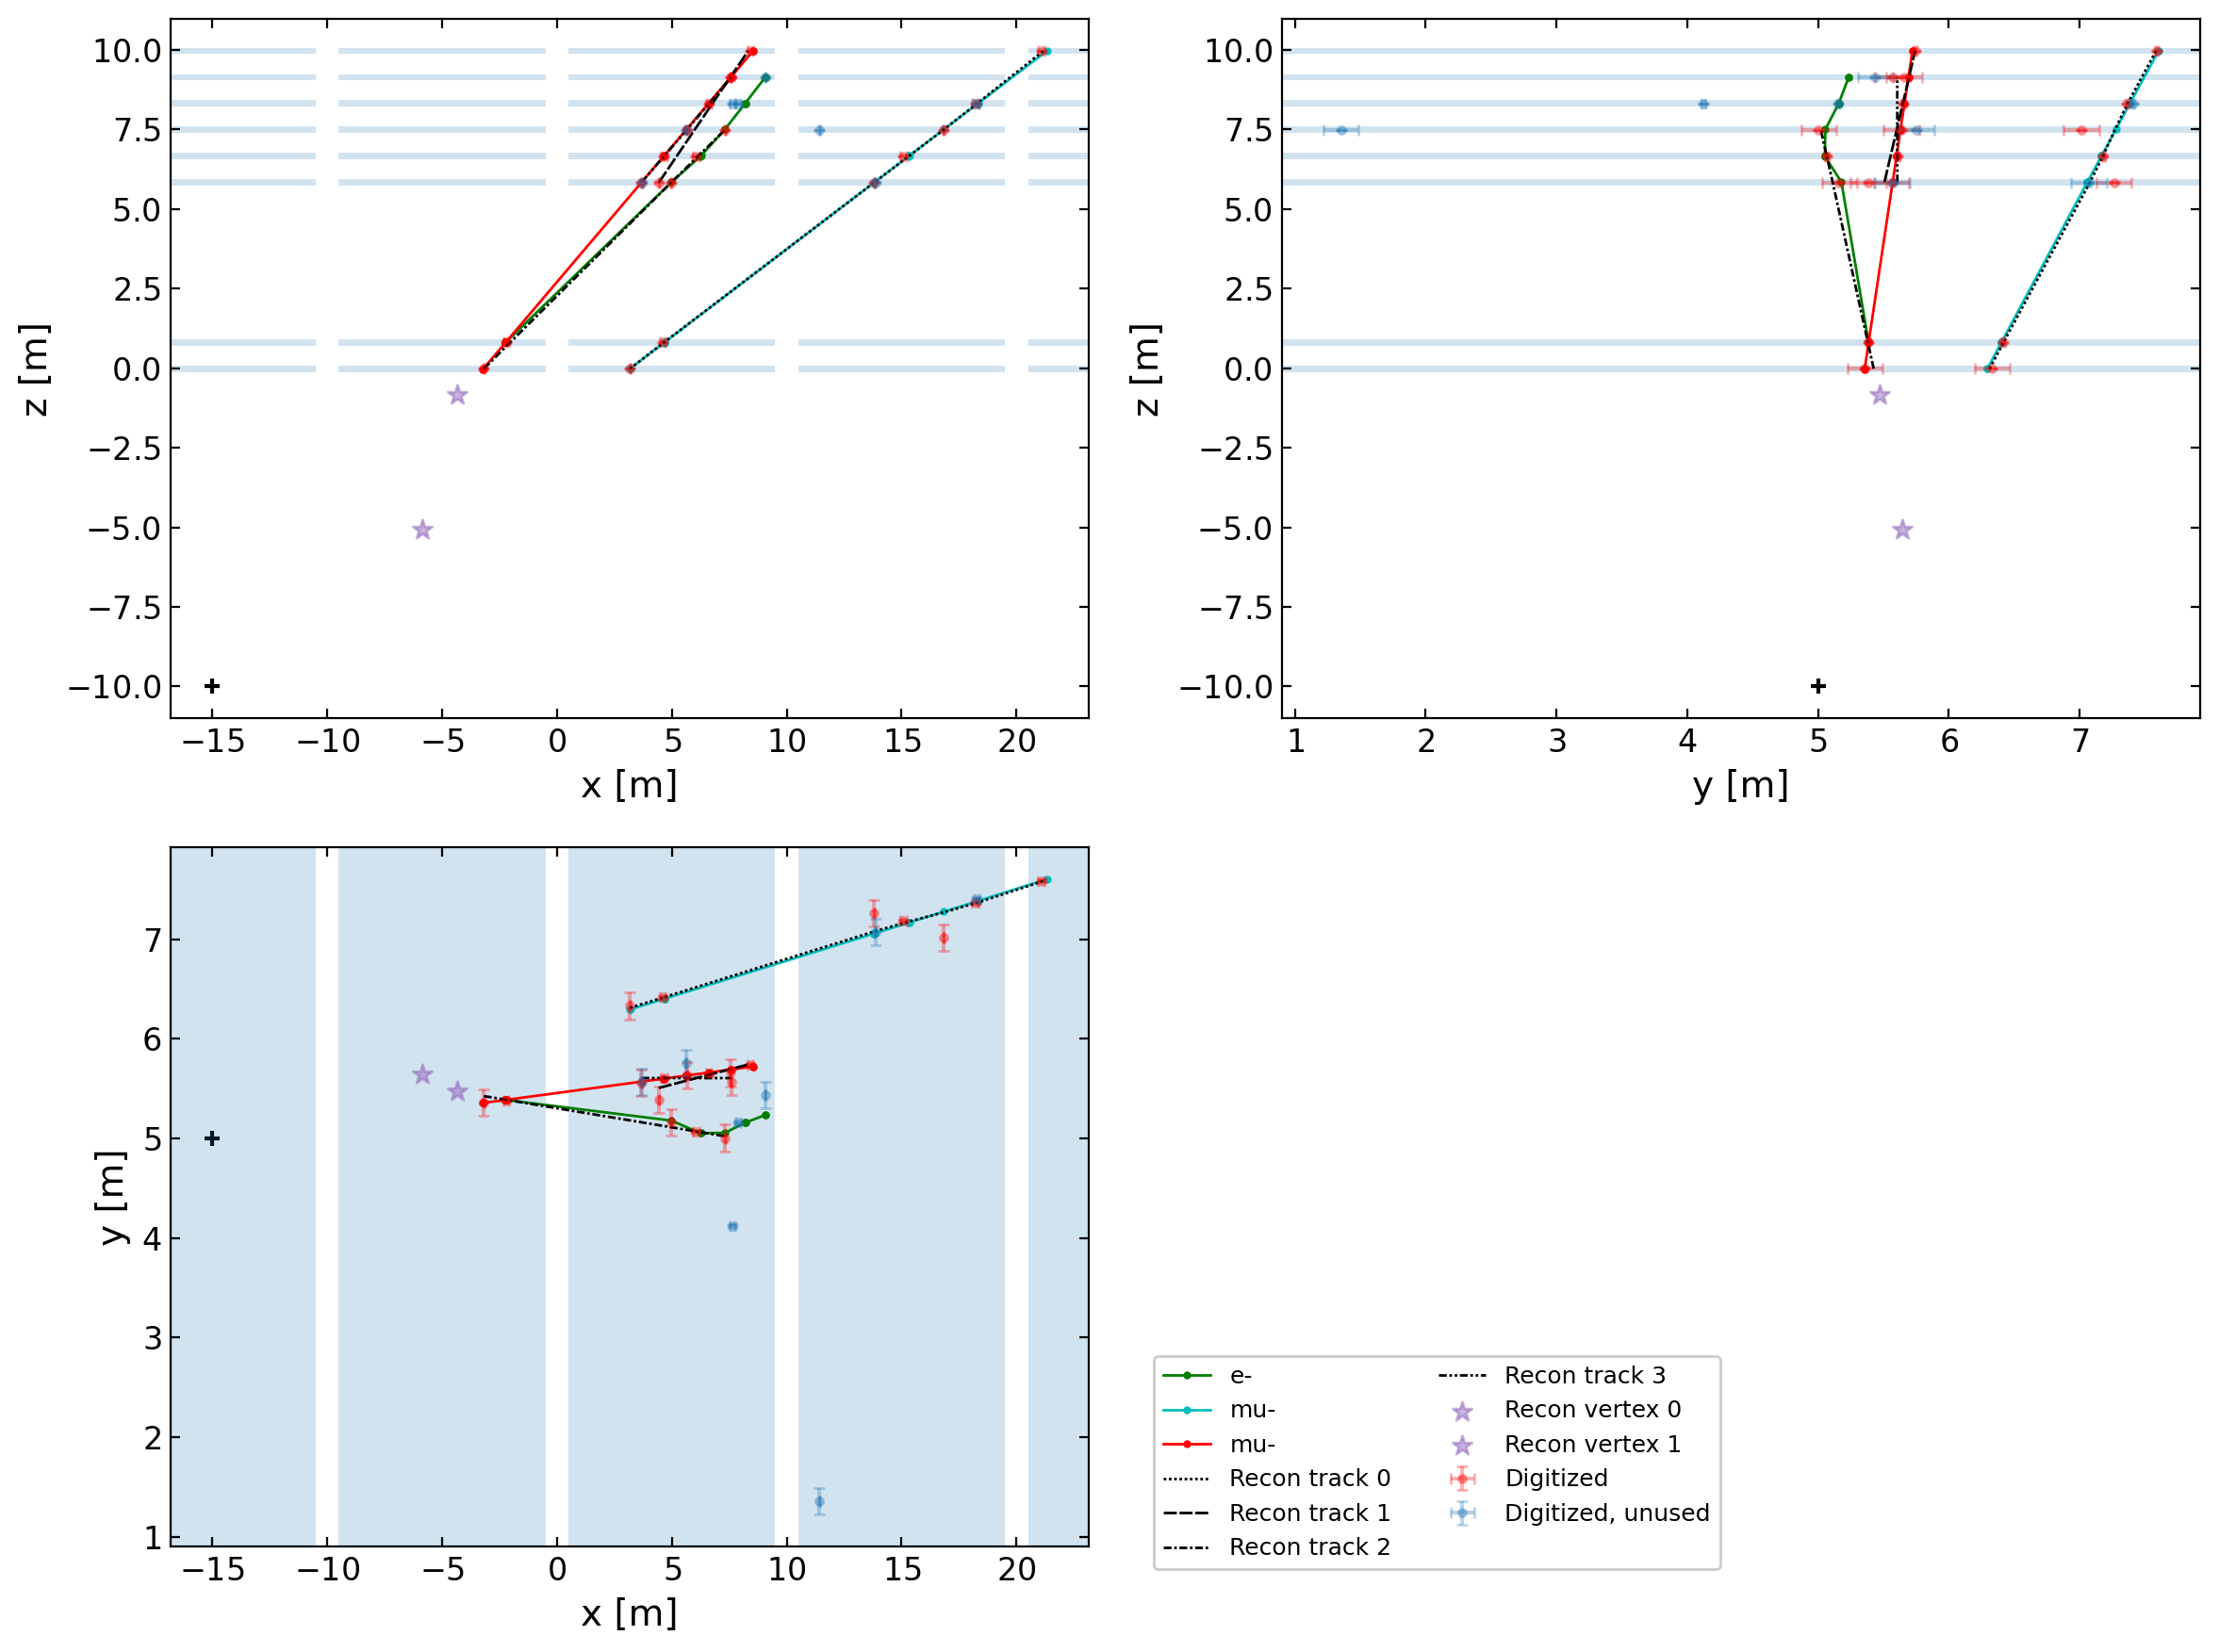

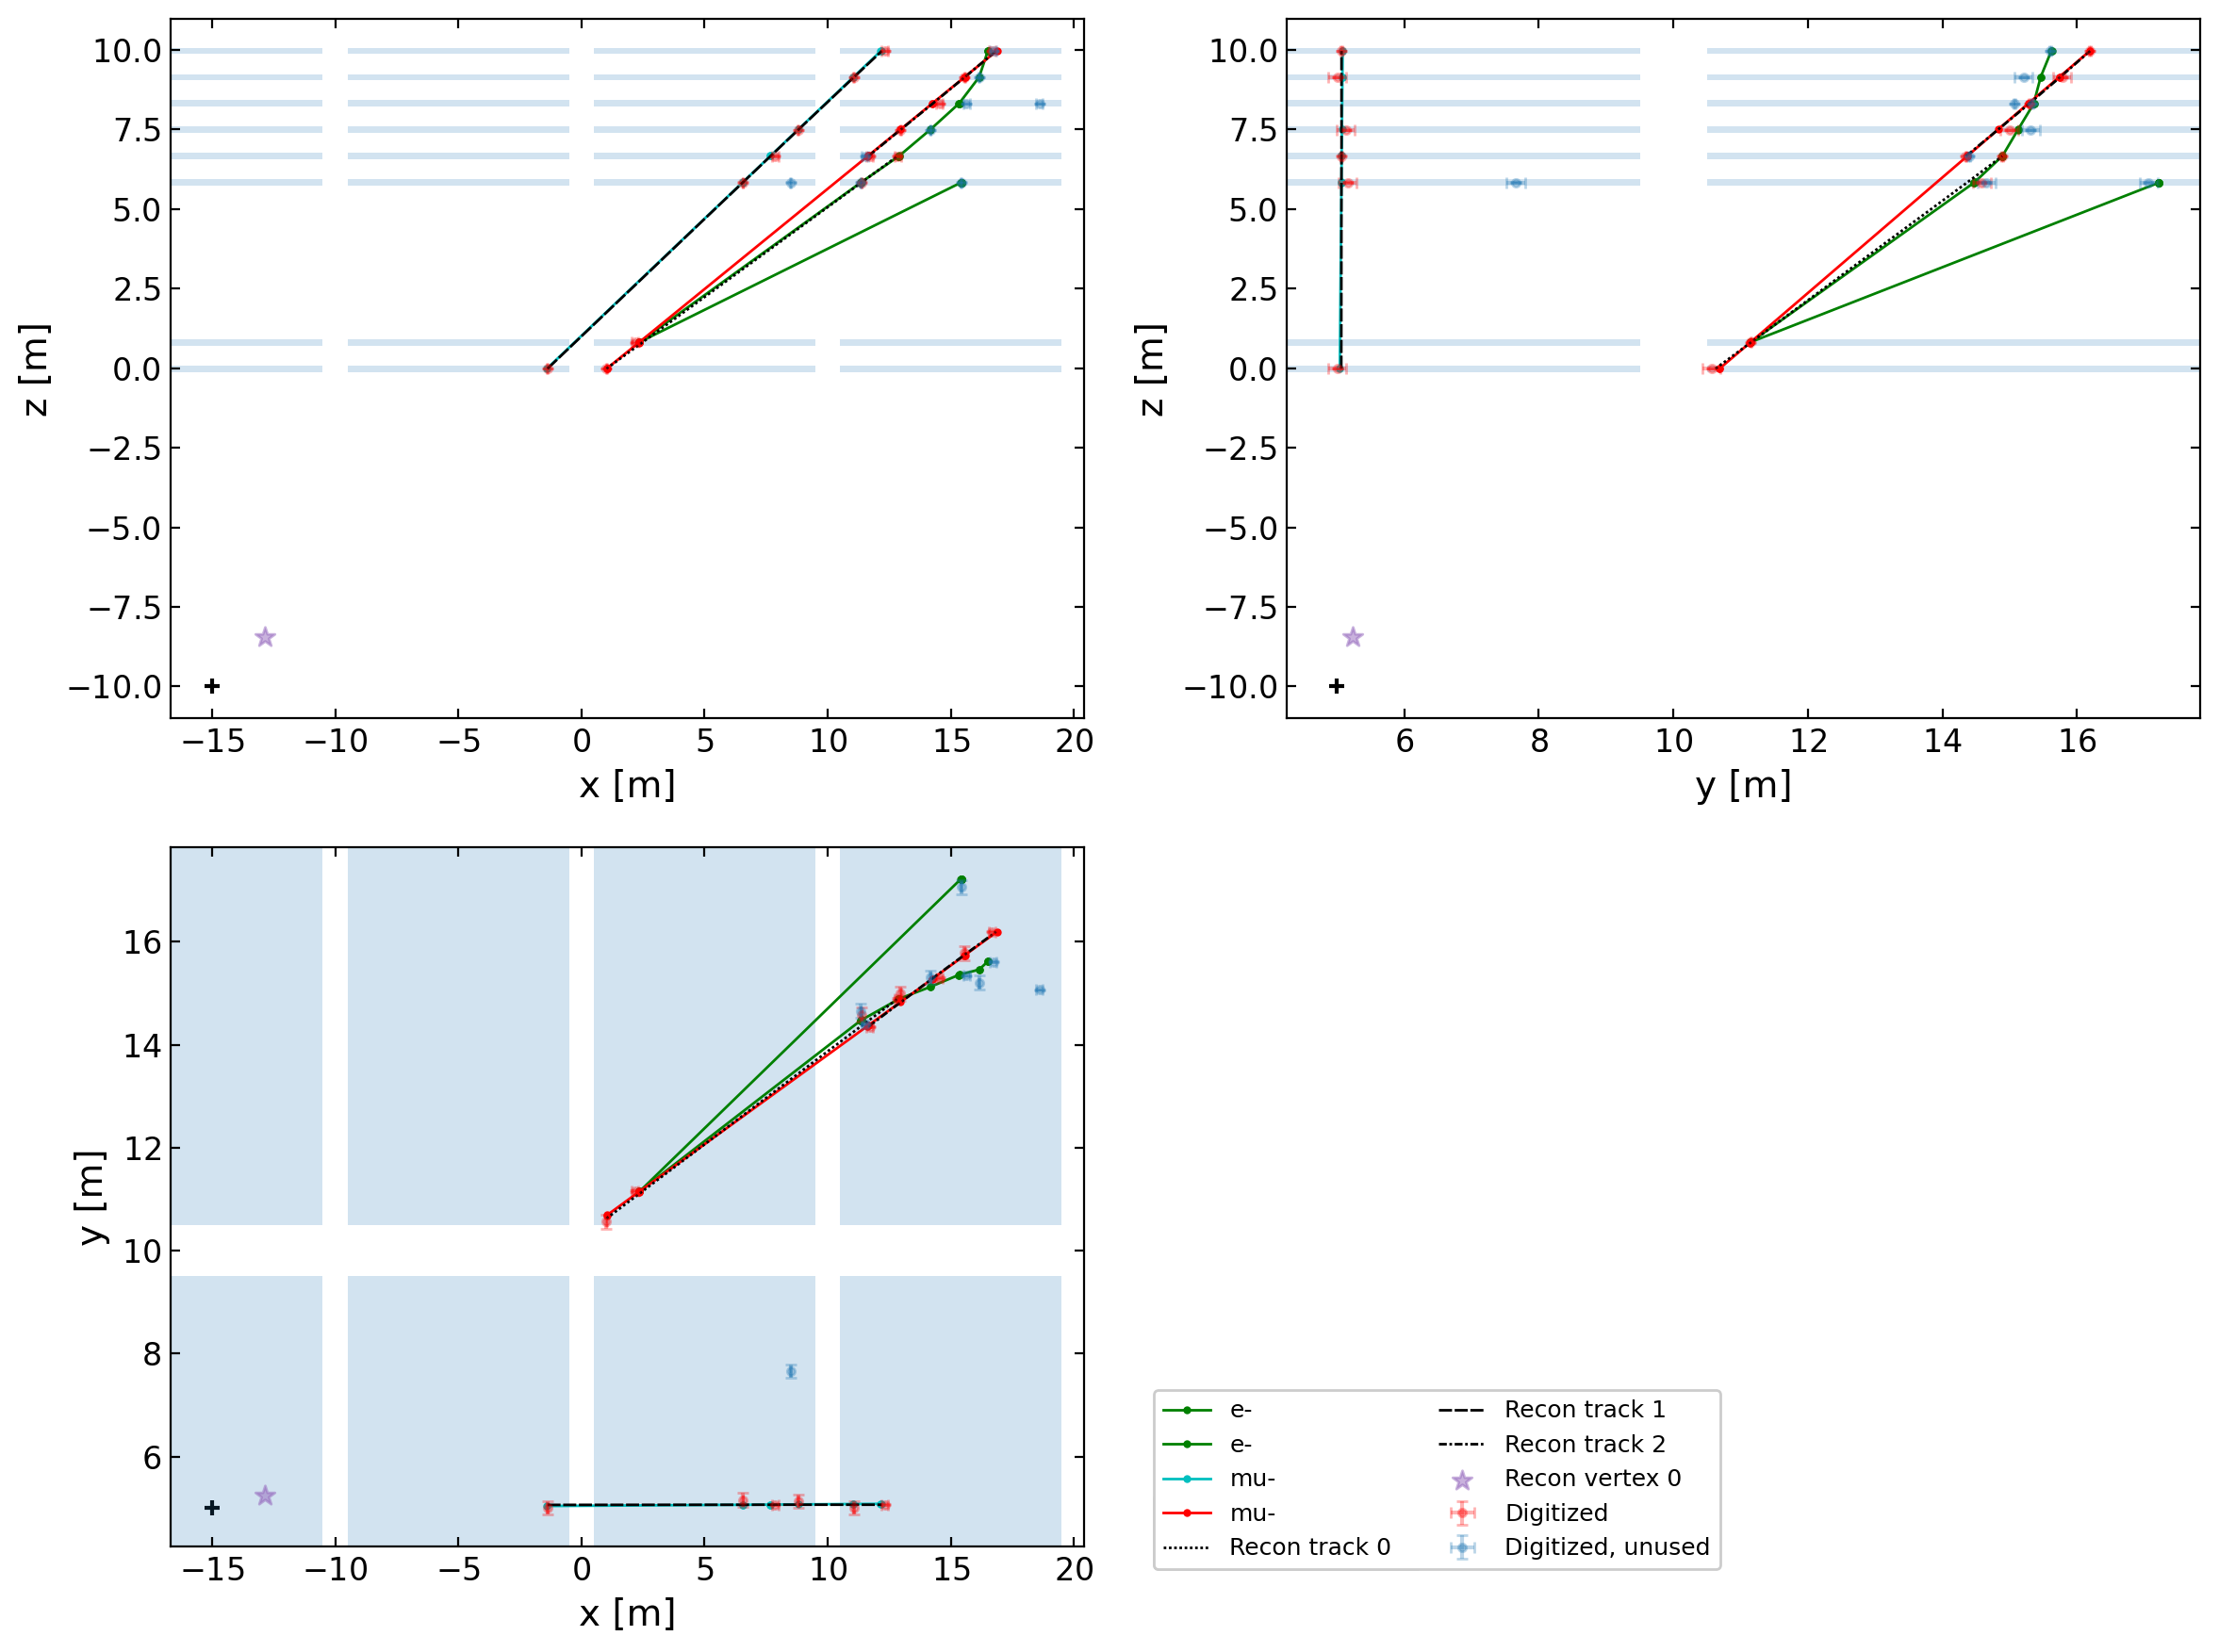

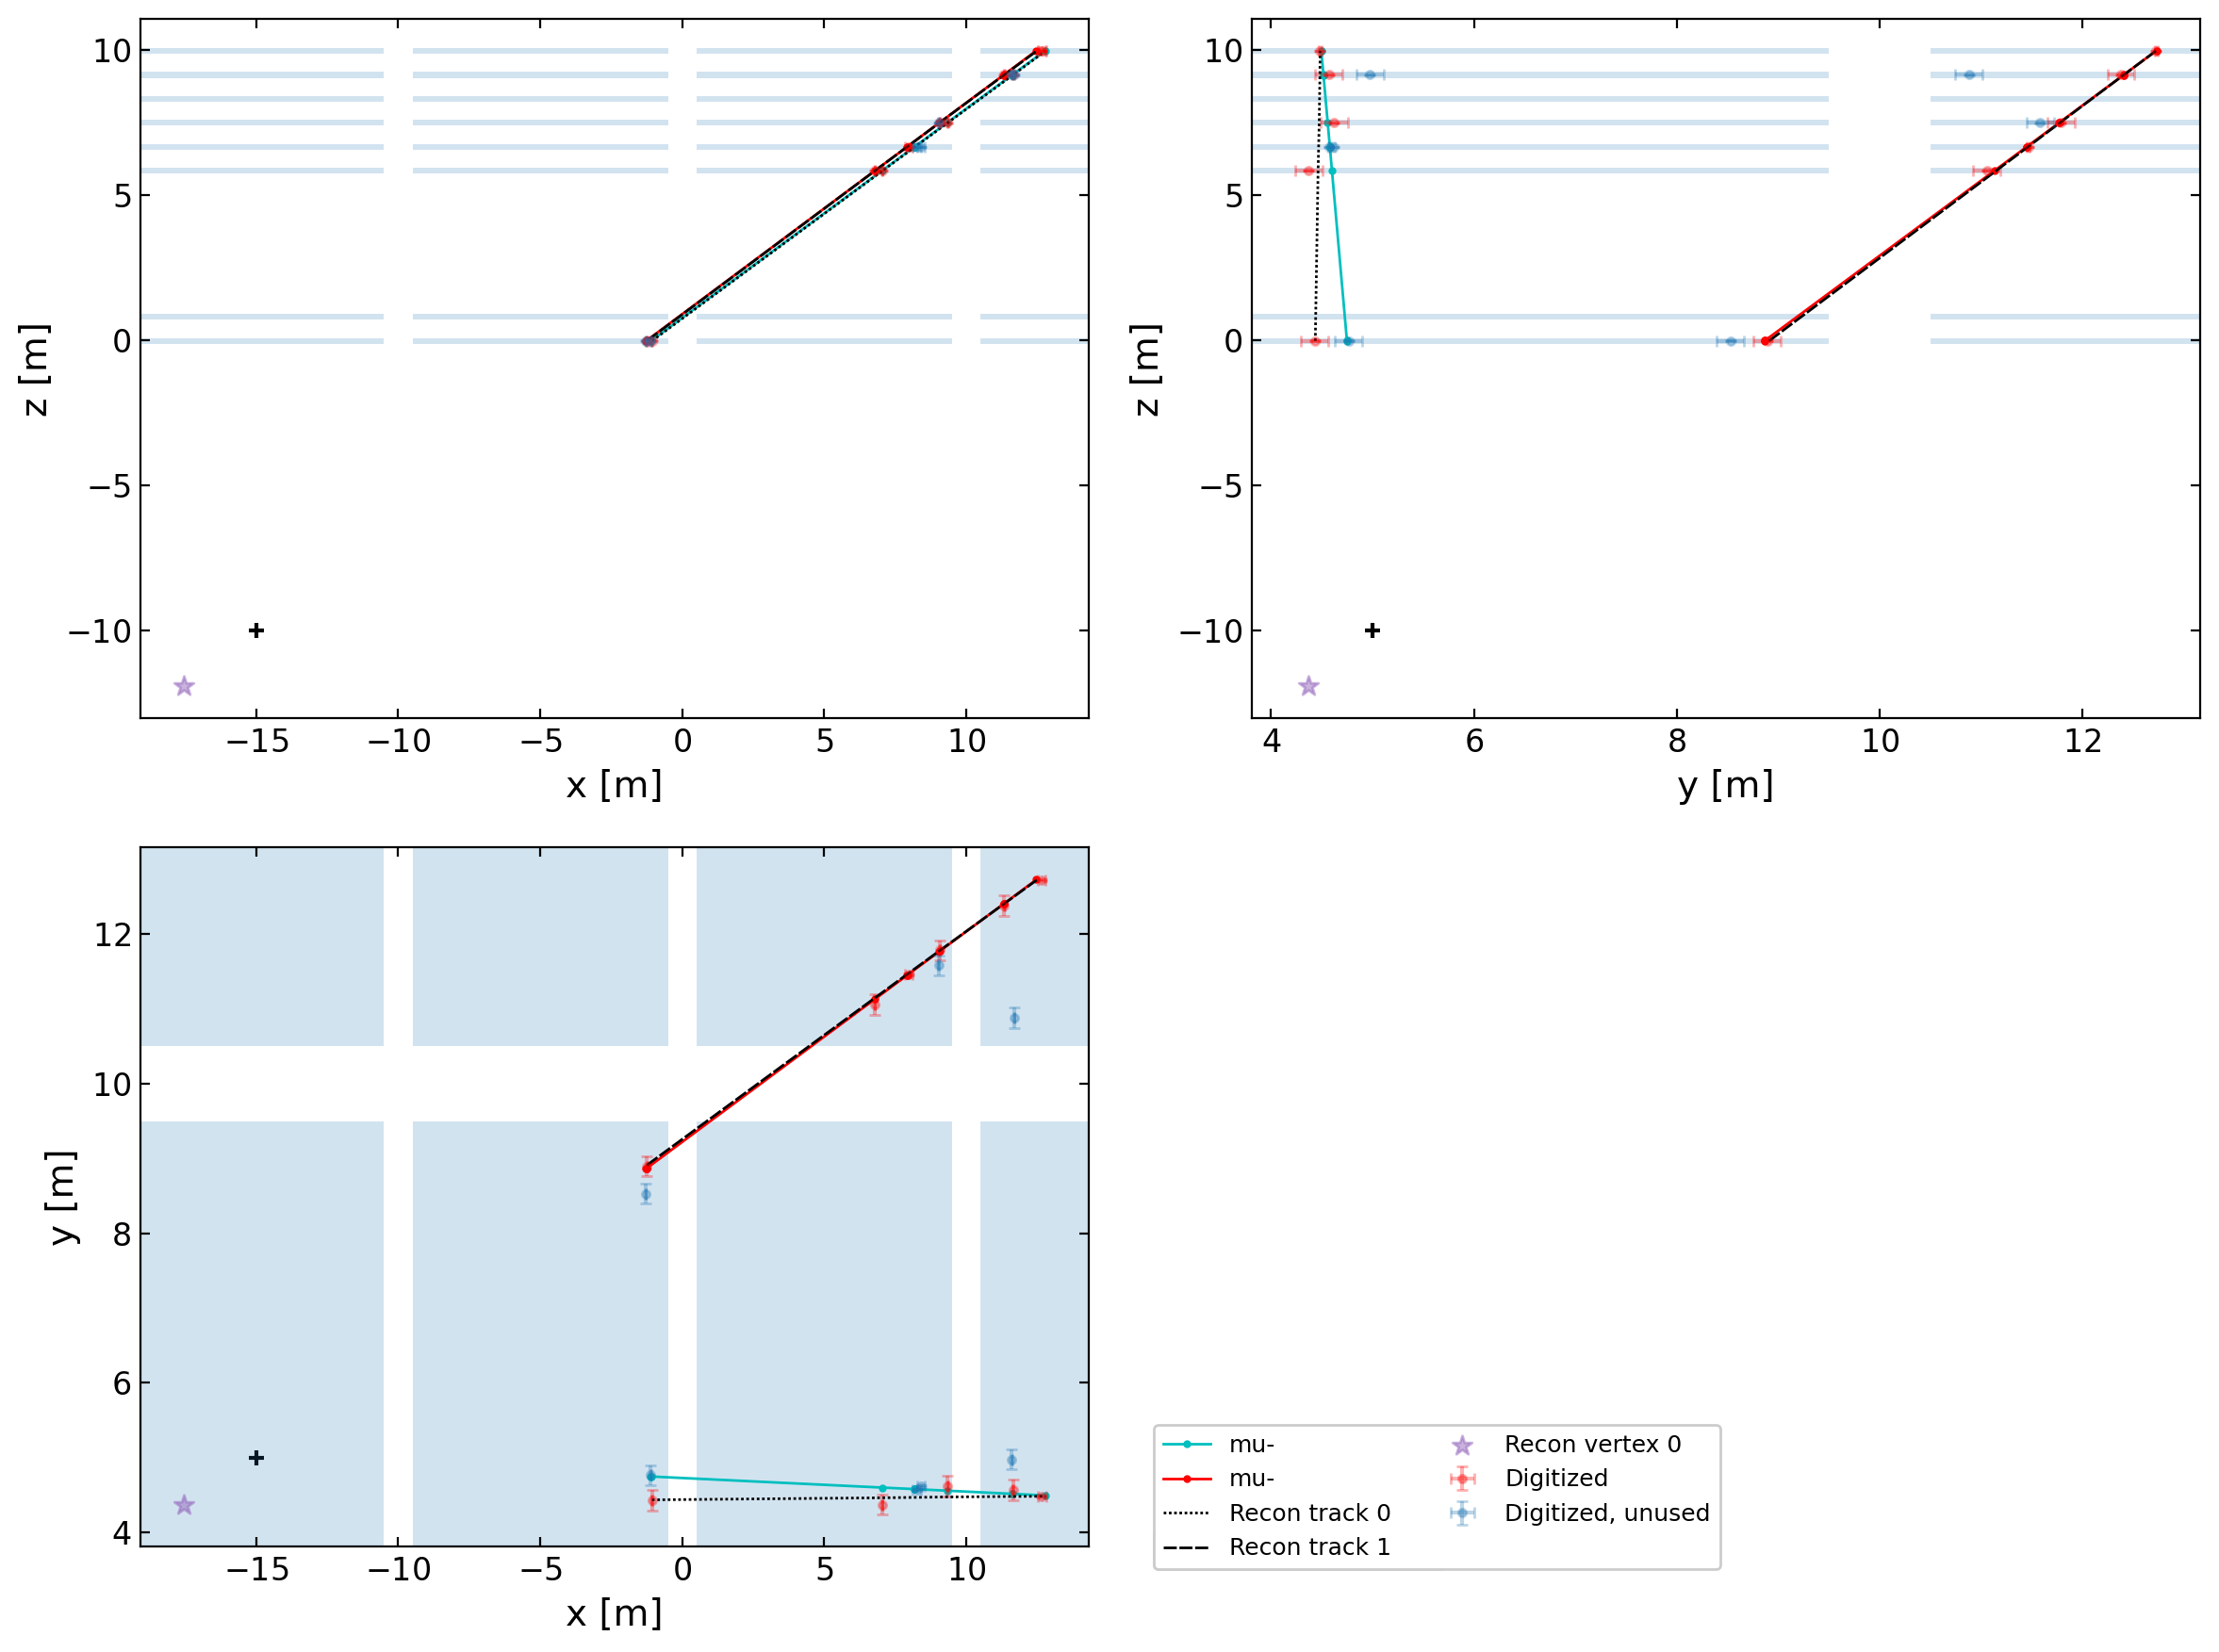

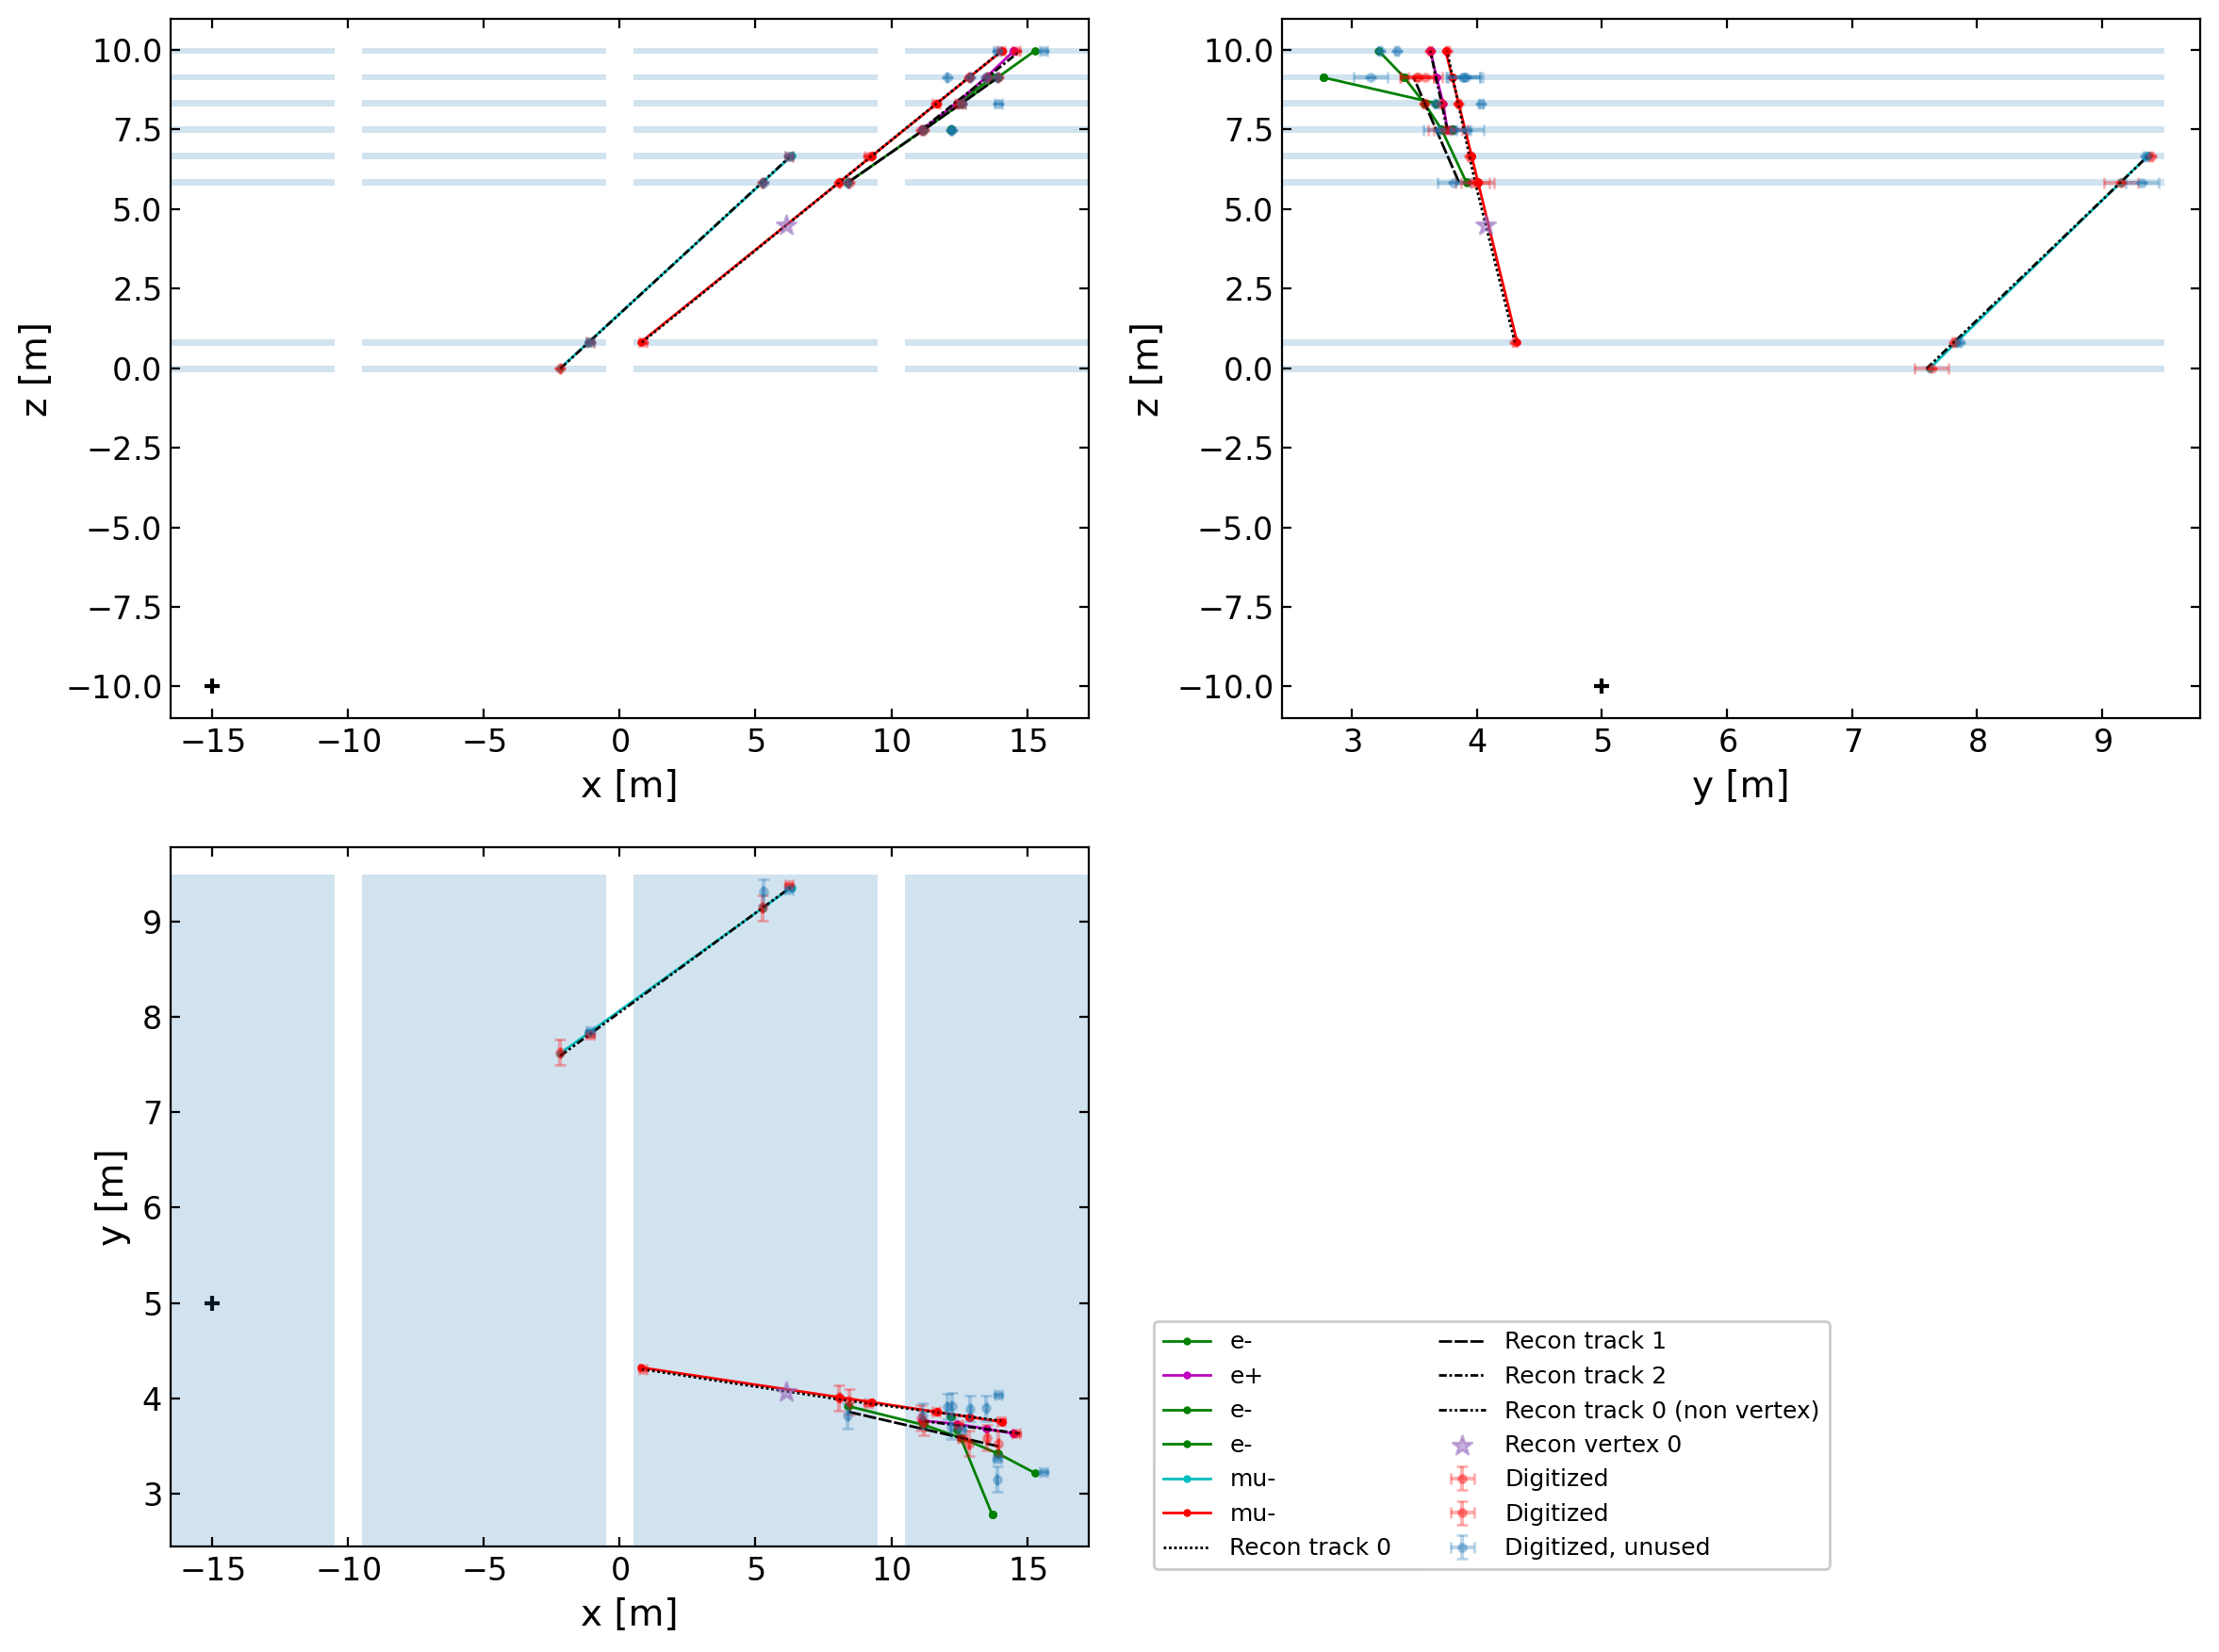

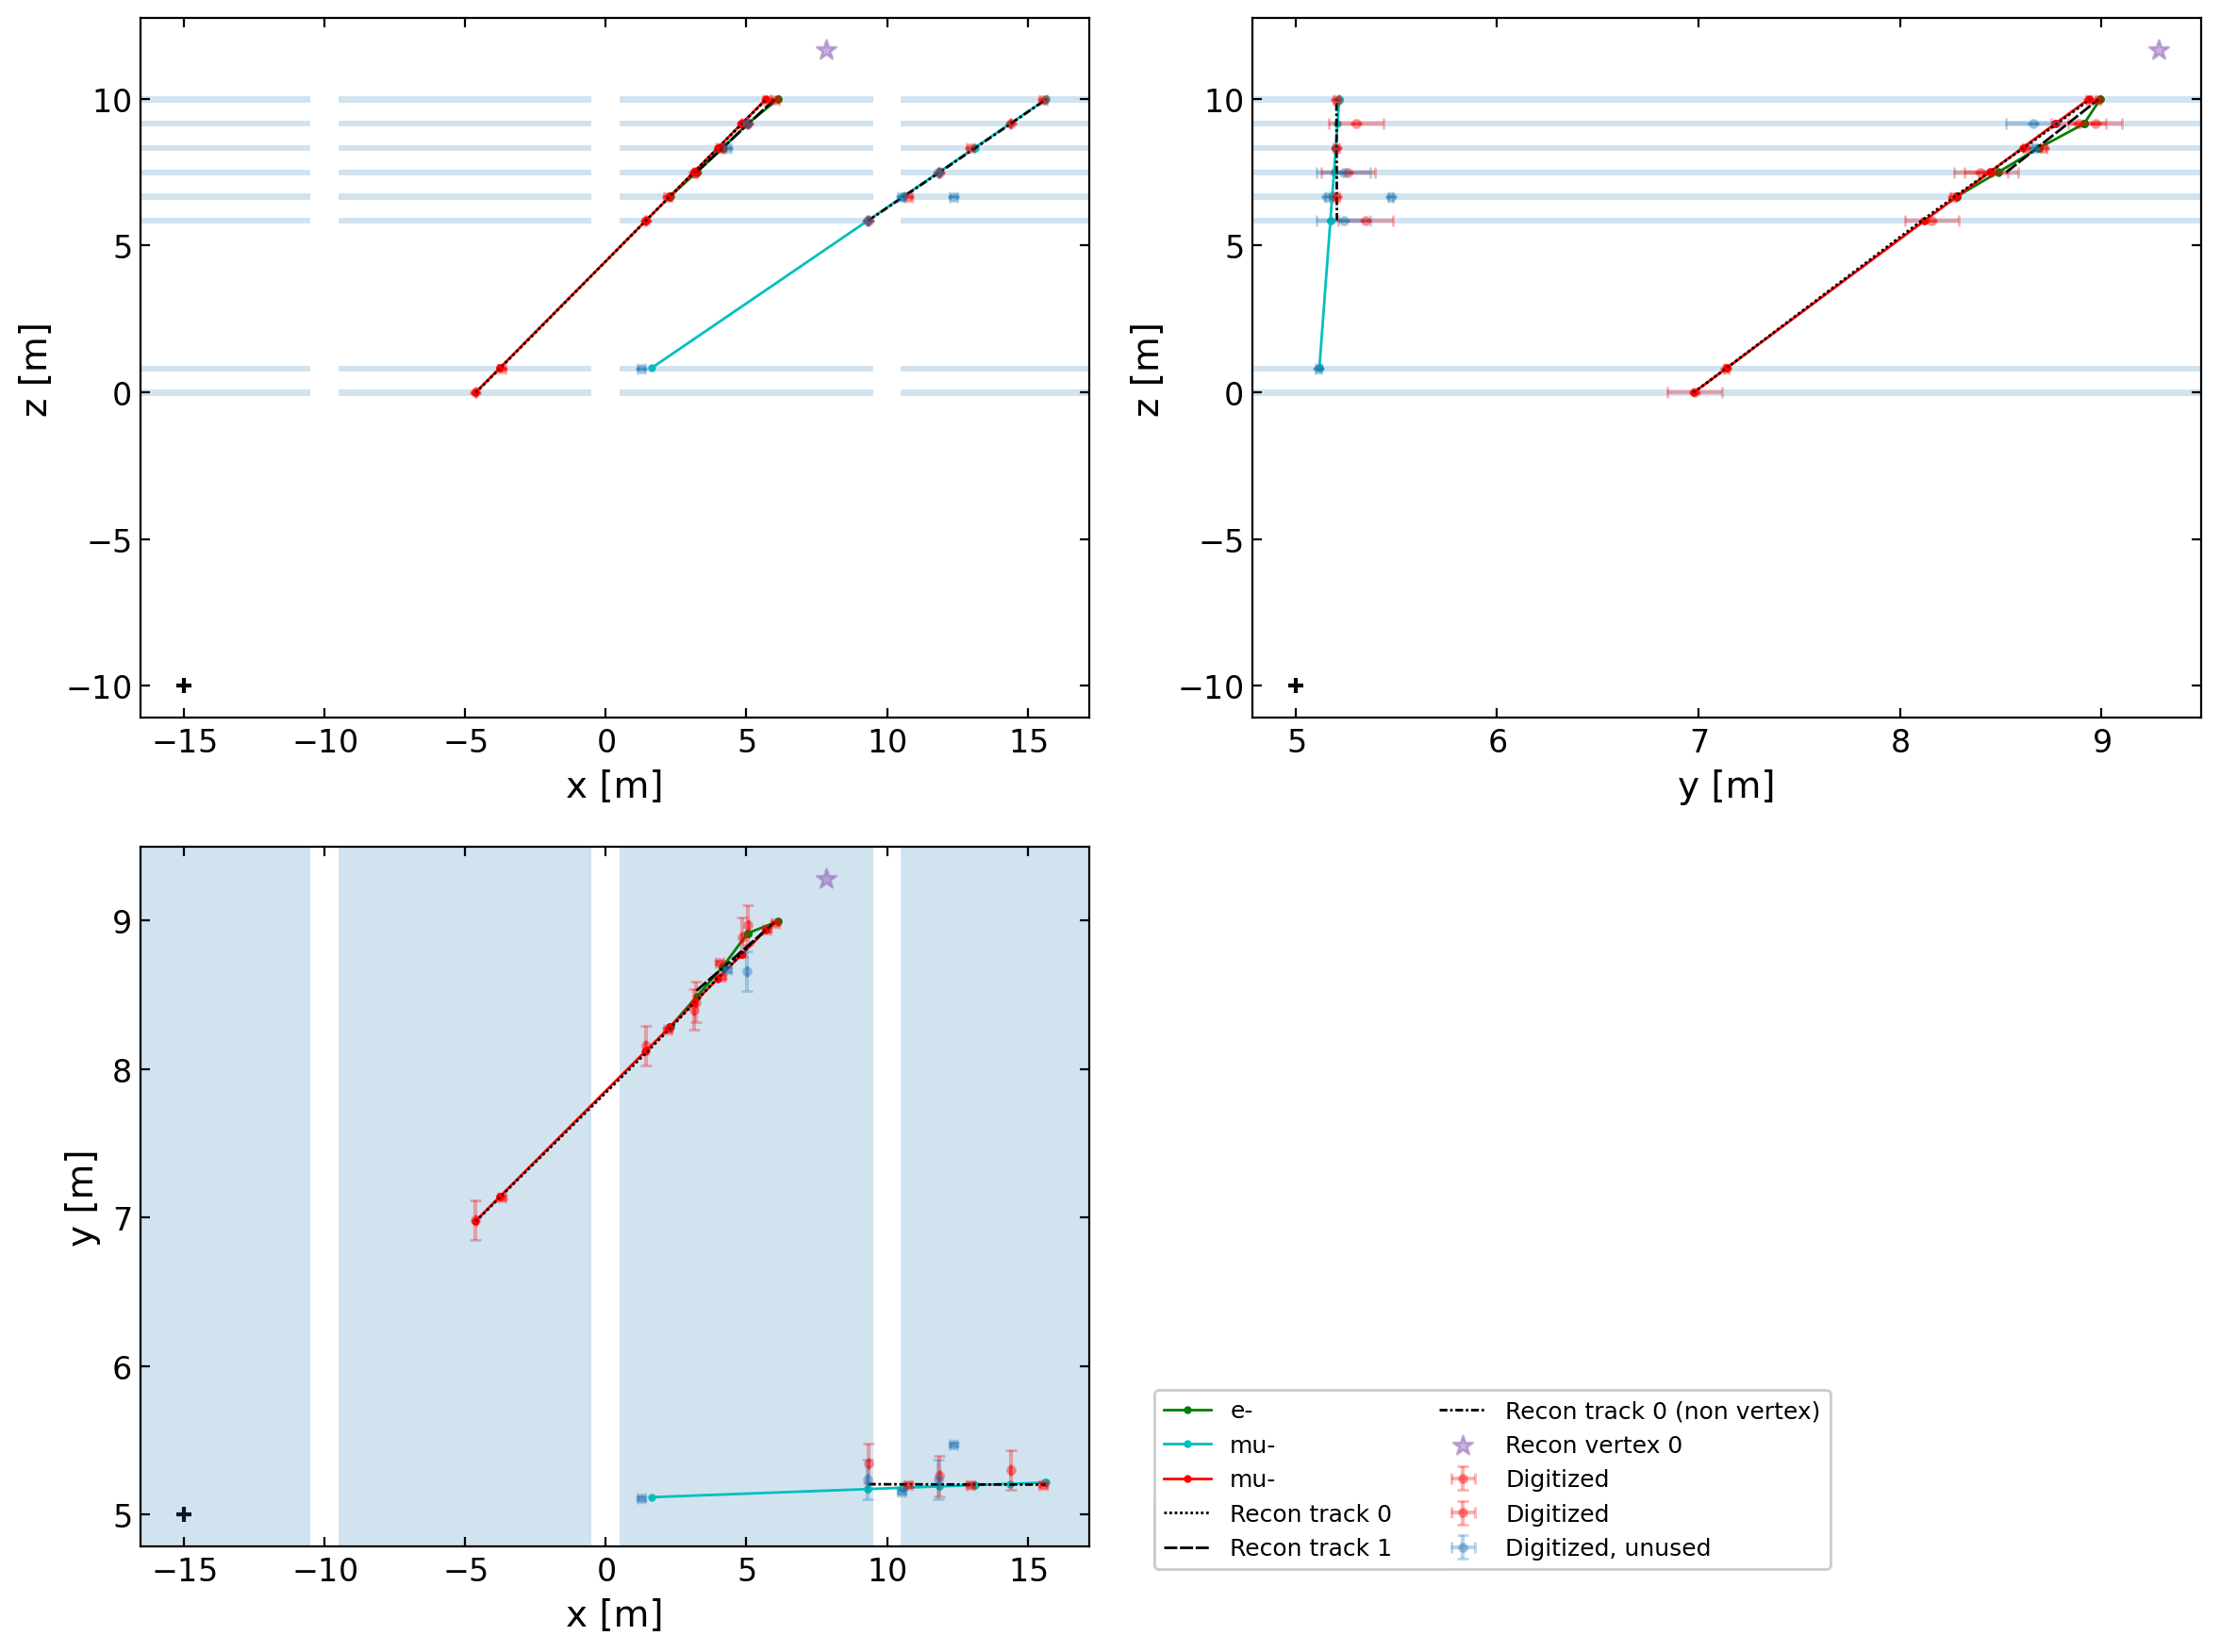

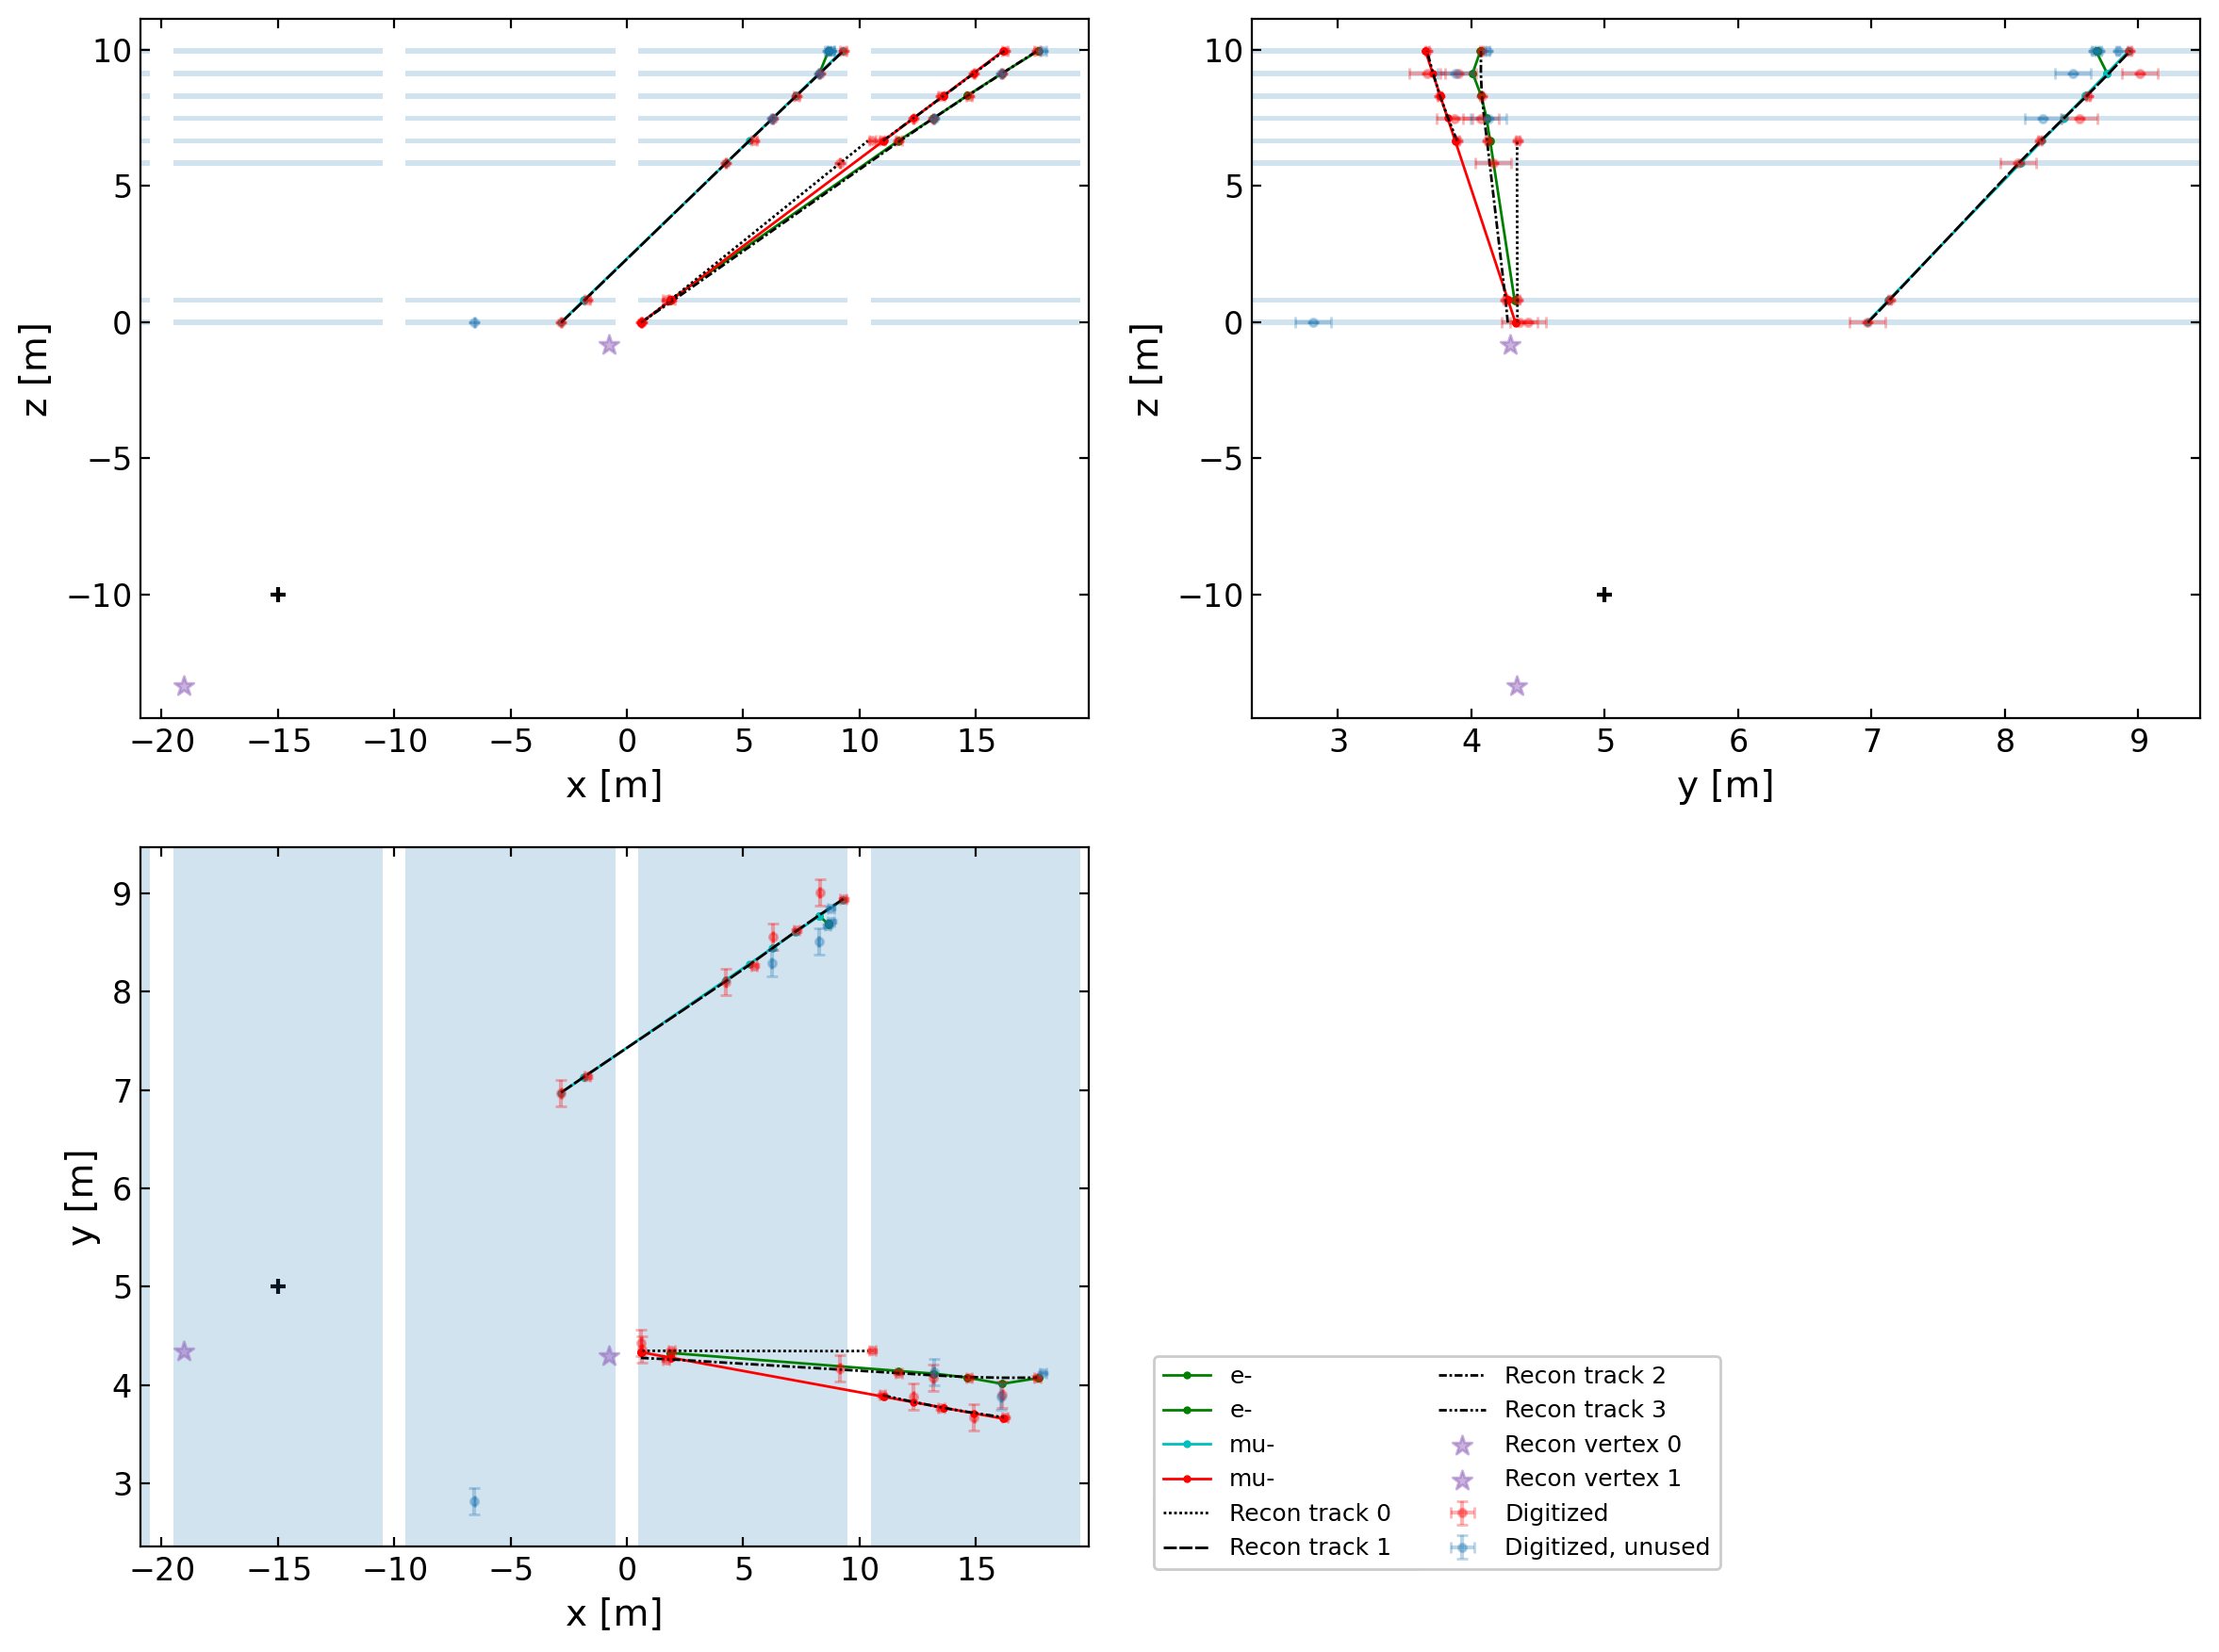

In [21]:
for j in range(10):
    
    # ev.EventNumber = Entry[j]
    ev.EventNumber = Entry[mask_plot_2][j]
    if mask_reconstructible[ev.EventNumber]:


        # Plot truth
        fig,axs=plt.subplots(2,2,figsize=(12,9))
        fig = vis.plot_truth(ev,fig=fig, disp_det_view=False, disp_vertex=True, disp_first_hit=False);
        # Plot the truth vertex
        axs=fig.axes
        axs[0].scatter(vertex_DET[0],vertex_DET[2],color="black",marker="+")
        axs[1].scatter(vertex_DET[1],vertex_DET[2],color="black",marker="+")
        axs[2].scatter(vertex_DET[0],vertex_DET[1],color="black",marker="+",label="Vertex Truth ")

        # Plot Reconstruction
        fig = vis.plot_recon(ev,fig=fig, disp_det_view=True, disp_recon_vertex=True);
        show()

### What caused those with track purity <1?

In [82]:
track_purity = []
track_chi2 = []
track_nhits = []
track_deltachi2_add_truth = []
track_deltachi2_add_false = []
track_deltachi2_truth = []
track_deltachi2_false = []

# track_hitinds_nontruth_delta = []
# track_hitinds_nontruth_mix = []

# for i in tqdm(range(30)):
for i in tqdm(range(nevents)):
    Tree.GetEntry(i)
    
    ntracks =  Tree.Track_k_m_t0.size()
    if ntracks>=2:
        track_simIDs = util.unzip(Tree.Track_k_m_ids)
        track_smoothchi_delta = util.unzip(Tree.Track_k_m_smoothchi)
        track_forwardchi_delta = util.unzip(Tree.Track_k_m_filterchi)
        track_simIDs = [np.array(i) for i in track_simIDs]
        track_smoothchi_delta = [np.array(i) for i in track_smoothchi_delta]
        track_forwardchi_delta = [np.array(i) for i in track_forwardchi_delta]
        track_1_nids = [np.sum(i==1) for i in track_simIDs]
        track_2_nids = [np.sum(i==2) for i in track_simIDs]
        i_track1 = np.argmax(track_1_nids)
        i_track2 = np.argmax(track_2_nids)
        if i_track1==i_track2:
            continue
        else:
            track1=track_simIDs[i_track1]
            track2=track_simIDs[i_track2]
            track_nhits.append(len(track1))
            track_nhits.append(len(track2))
            track_purity.append(sum(track1==1)/len(track1))
            track_purity.append(sum(track2==2)/len(track2))
            track_chi2.append(Tree.Track_k_m_smooth_chi_sum.at(int(i_track1)))
            track_chi2.append(Tree.Track_k_m_smooth_chi_sum.at(int(i_track2)))
            track_deltachi2_truth.append(track_smoothchi_delta[i_track1][track1==1])
            track_deltachi2_truth.append(track_smoothchi_delta[i_track2][track2==2])
            track_deltachi2_false.append(track_smoothchi_delta[i_track1][track1!=1])
            track_deltachi2_false.append(track_smoothchi_delta[i_track2][track2!=2])   
            track_deltachi2_add_truth.append(track_forwardchi_delta[i_track1][(track1==1)[1:]])
            track_deltachi2_add_truth.append(track_forwardchi_delta[i_track2][(track2==2)[1:]])
            track_deltachi2_add_false.append(track_forwardchi_delta[i_track1][(track1!=1)[1:]])
            track_deltachi2_add_false.append(track_forwardchi_delta[i_track2][(track2!=2)[1:]])               
        
                                   
    
track_chi2=np.array(track_chi2)
track_purity=np.array(track_purity)

100%|██████████| 10000/10000 [00:06<00:00, 1513.33it/s]


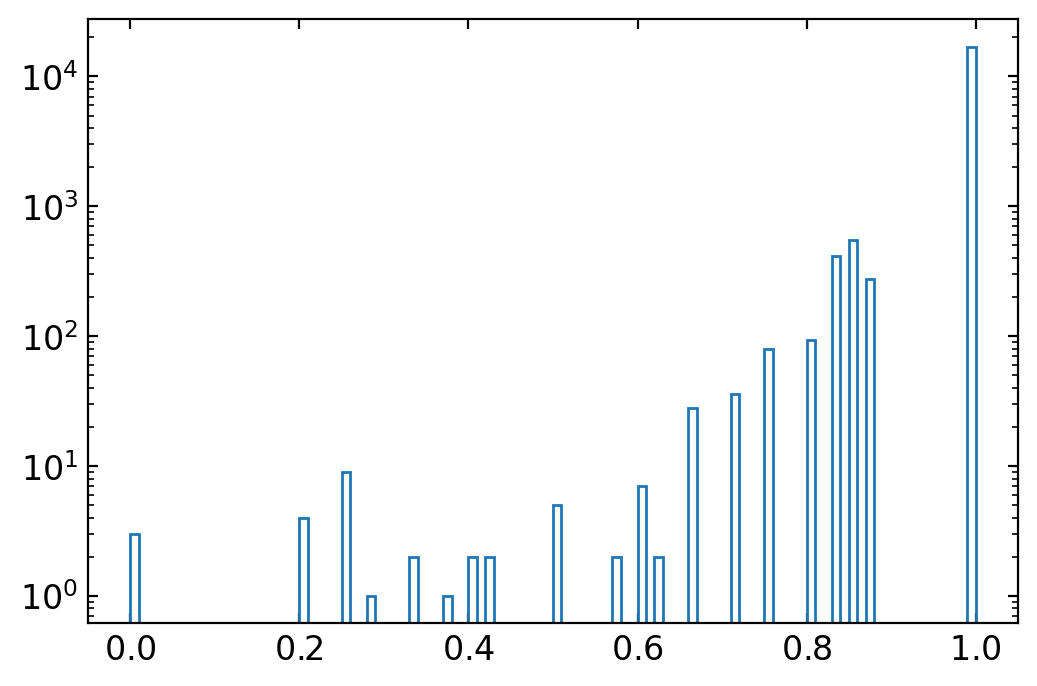

In [83]:
hist(track_purity,histtype="step",log=1);


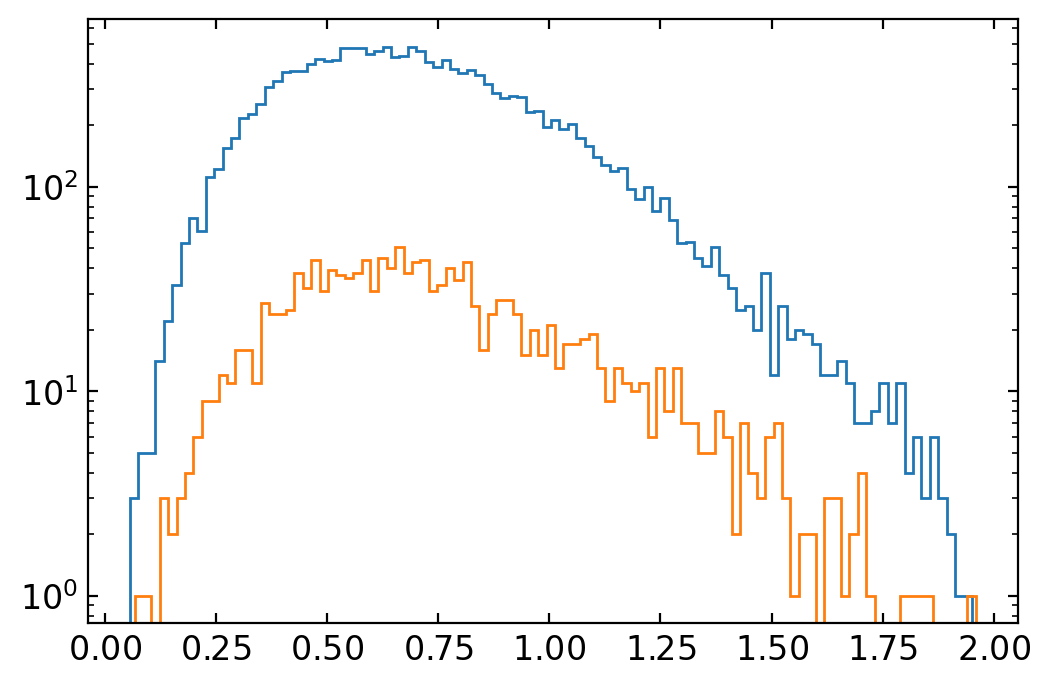

In [84]:
hist(track_chi2[track_purity==1],histtype="step");
hist(track_chi2[track_purity<1],histtype="step");
yscale("log")

In [85]:
hist(util.Utils.flatten1d(track_deltachi2_truth), histtype="step");
hist(util.Utils.flatten1d(track_deltachi2_false), histtype="step");
yscale("log")

In [86]:
hist(util.Utils.flatten1d(track_deltachi2_add_truth), histtype="step");
hist(util.Utils.flatten1d(track_deltachi2_add_false), histtype="step");
yscale("log")

---
### Run the following cell after obtaining data for all input files

In [7]:
Data=[joblib.load(os.path.splitext(filenames[i])[0]+"_res.joblib") for i in range(len(filenames))]

In [8]:
plotlabels = ["Original", "+ Bug fix", "Modified"]

for idata in range(3):
    if idata==1:
        continue
    data=Data[idata]
    residual = data["residual"]
    residual_r = np.linalg.norm(residual[:,:3],axis=1)
    mask_residual = residual_r<200
    hist(residual_r,range=(0,600),histtype="step",label=plotlabels[idata])
    print(f"Efficiency: {sum(mask_residual)/10000*100:.0f}%",plotlabels[idata])
xlabel("Redisual, r [cm]")
ylabel("counts")
legend()
yscale("log")
axvline(200,color="k")
savefig("resolution_r_comp")

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


Efficiency: 68% Original
Efficiency: 89% Modified


findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


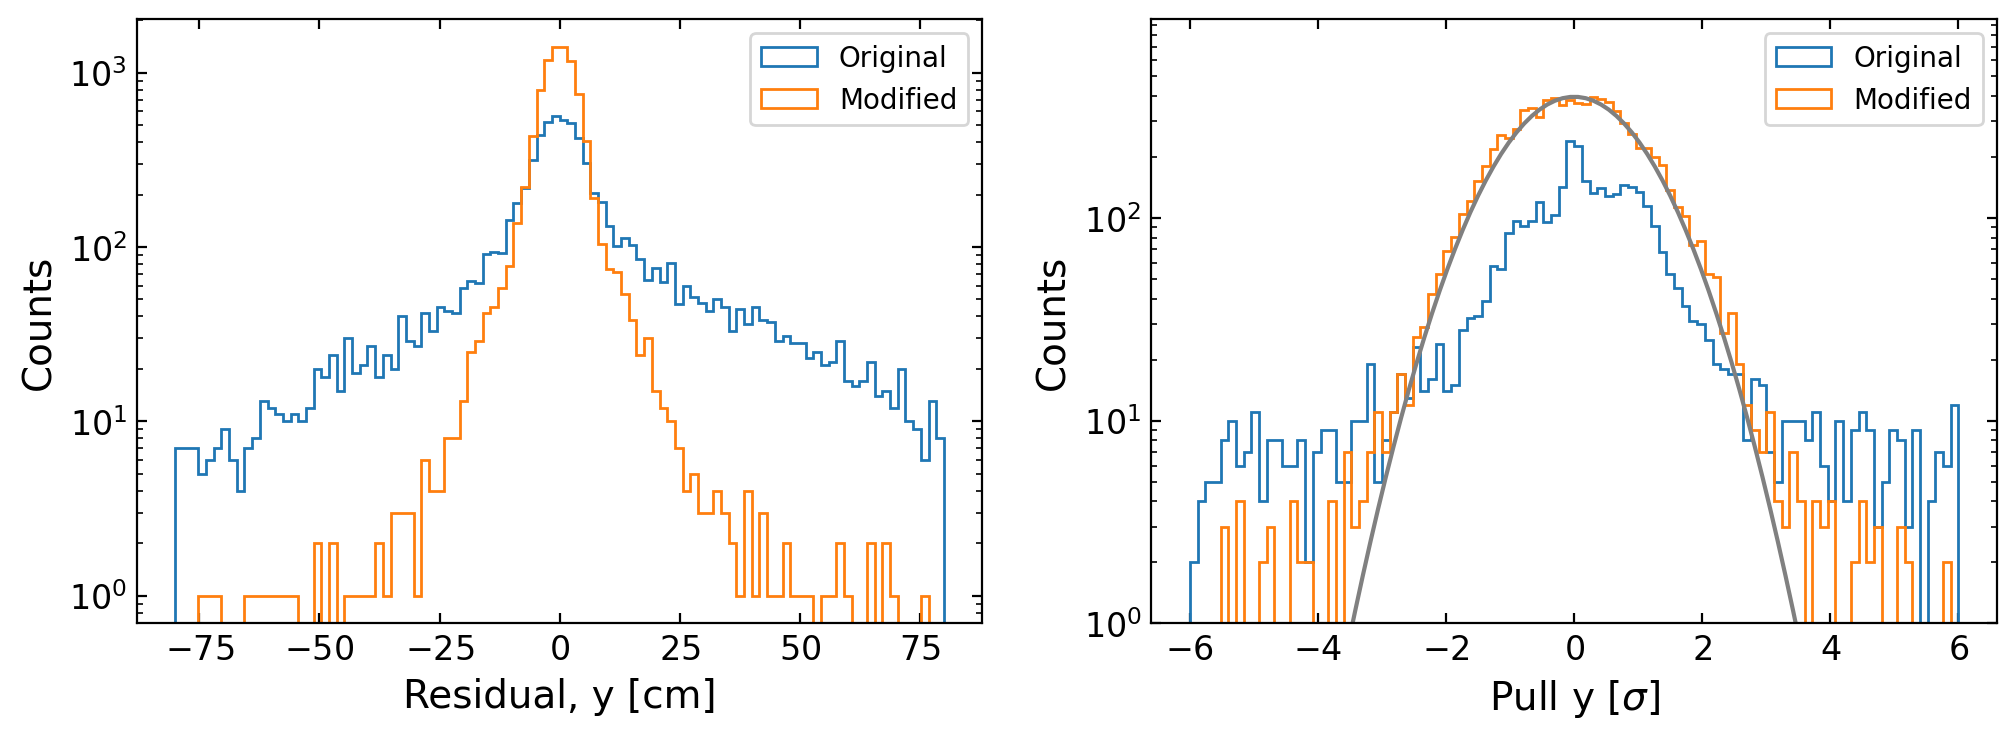

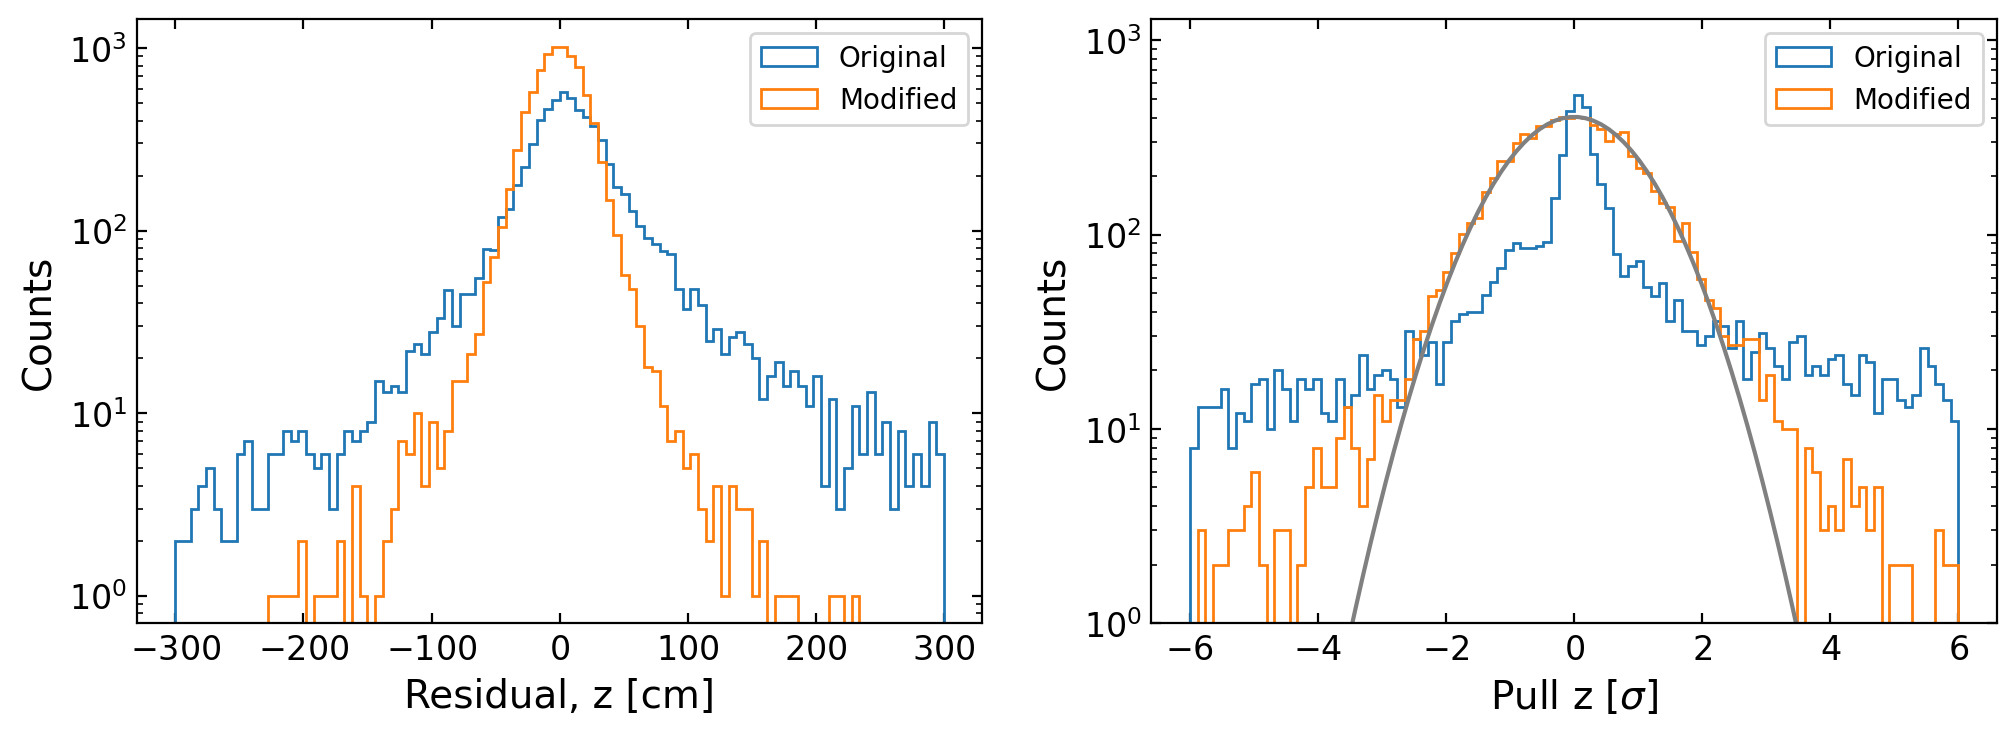

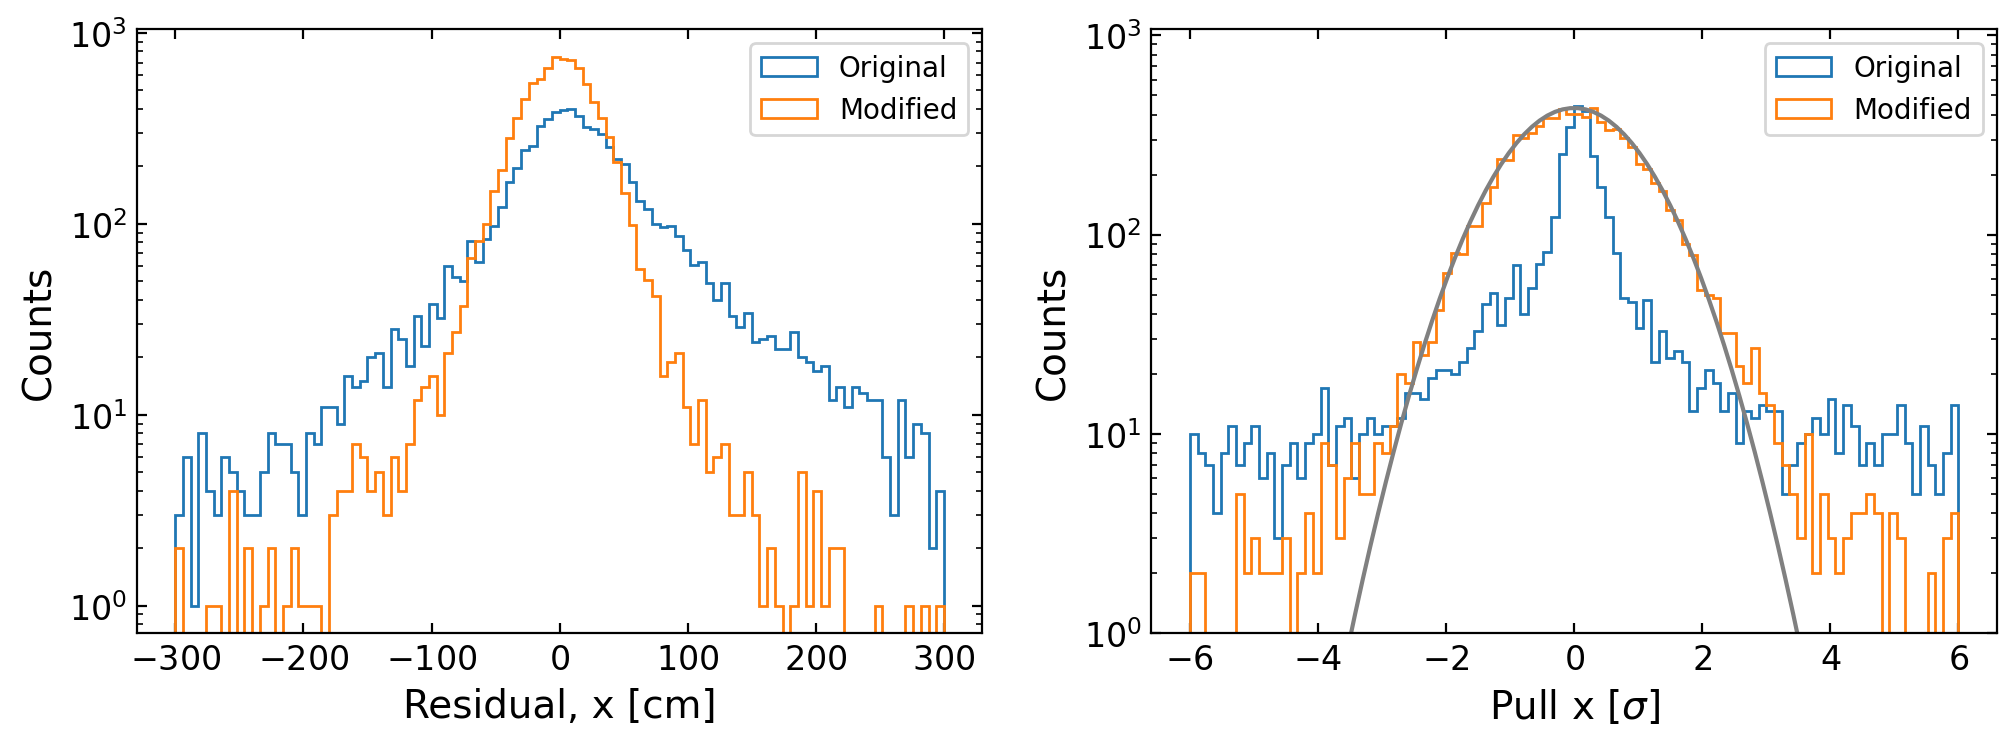

In [9]:
labels=["y [cm]", "z [cm]", "x [cm]", "t [ns]", "r [cm]"]
plot_ranges=[[-80,80],[-300,300],[-300,300],[-40,40],[0,900]]

# for i in [3,4]:
for i in [0,1,2,3]:
    fig, axs=subplots(1,2,figsize=(12,4))
    for idata in range(3):
        if idata==1:
            continue
        data=Data[idata]
        residual = data["residual"]
        unc = data["uncertainty"]
        Vertices_cov    =data["cov"]
        
        # efficiency = sum((residual[:,4]<200))/10000
        # print("Efficiency "+plotlabels[idata]+":", f"{efficiency:.2f}")
        
        sca(axs[0])
        n0,ibins,_ = hist(residual[:,i],range=plot_ranges[i],label=plotlabels[idata],histtype="step");    
        sca(axs[1])
        if i==4:
            # unc_i = 1/residual[:,4]*np.sqrt(residual[:,1]**2*unc[:,1]**2 + residual[:,2]**2*unc[:,2]**2 + residual[:,0]**2*unc[:,0]**2 )
            unc_i=[]
            for ievent in range(len(Vertices_cov)):
                cov = Vertices_cov[ievent][:3,:3]
                # cov =np.diag(np.diag(cov))
                delta_r = residual[ievent,:3]
                unc_i.append(sqrt(delta_r@cov@delta_r)/residual[ievent,4])            
        else:
            unc_i =unc[:,i]
        pull = util.pull(residual[:,i],0,unc_i)
            
        n0,ibins,_ = hist(pull,range=[-6,6],label=plotlabels[idata],histtype="step"); 
        ibins=util.Utils.center(ibins)
        if idata==2:
            plot(ibins,util.Utils.Gauss(ibins,max(n0),0,1),color="grey")
        
    legend(fontsize=10)
    
    sca(axs[0])
    xlabel("Residual, "+labels[i])
    ylabel("Counts")
    yscale("log")
    legend(fontsize=10)
    sca(axs[1])
    xlabel("Pull "+labels[i].split(" ")[0]+r" [$\sigma$]")
    ylabel("Counts")
    yscale("log")  
    ylim(bottom=1)
    savefig(f"resolution_{i}_comp")    
    show()